In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.graphics.tsaplots import plot_acf

<h1>Pregunta 1</h1>

In [2]:
#open data
df_prec = pd.read_csv('precipitaciones.csv')
df_bc = pd.read_csv('banco_central.csv')

<h1>Pregunta 2</h1>

In [3]:
#start analyzing precipitations dataset
print('Base Precipitaciones')
print('Columnas: ', df_prec.columns)
print('Tipo de Variables: ', df_prec.dtypes)
df_prec.head()

Base Precipitaciones
Columnas:  Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')
Tipo de Variables:  date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object


date  Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
0  1989-02-01  0.719033    0.117045                   0.028272   
1  1998-10-01  0.065216    0.000000                   0.011493   
2  2001-02-01  2.030026    0.047987                   0.002634   
3  2008-11-01  0.622784    0.000000                   0.015872   
4  2009-04-01  0.008065    0.000000                   0.009396   

   Libertador_Gral__Bernardo_O_Higgins      Maule     Biobio  La_Araucania  \
0                                  0.0   0.724667   9.172945     22.595834   
1                                  0.0   0.008968   2.089674     14.702087   
2                                  0.0   0.032163  10.768351     29.465057   
3                                  0.0   1.734168  25.083557     64.901645   
4                                  0.0  12.080715  56.233424     96.364235   

     Los_Rios  
0   52.268010  
1   45.142041  
2   65.571098  
3  113.093488  
4  155.622235

In [4]:
#check for null values
print('Para precipitaciones:')
print(df_prec.isnull().sum())
print('\n Total trips:', df_prec.shape[0], '\n')

Para precipitaciones:
date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

 Total trips: 496 



In [5]:
#transforms dates to datetime
df_prec['date'] = pd.to_datetime(df_prec['date'])
df_prec.sort_values(by=['date'], ascending=True, inplace=True)

#show data
df_prec.head()

date   Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
170 1979-01-01   2.641948    0.587062                   2.447114   
465 1979-02-01   1.179804    2.432192                   3.997852   
305 1979-03-01   0.255490    0.020601                   0.000000   
441 1979-04-01  10.173699   11.745779                  13.722349   
217 1979-05-01   1.039098   18.609286                  50.187148   

     Libertador_Gral__Bernardo_O_Higgins       Maule      Biobio  \
170                             1.608992    3.736215   17.859634   
465                             4.346310   16.347637   17.680612   
305                             0.055488    0.545324   14.435698   
441                            12.989194   21.880607   39.136483   
217                           104.451550  143.914334  219.729235   

     La_Araucania    Los_Rios  
170     25.212940   45.596447  
465     18.085072   34.075039  
305     28.696504   66.232248  
441     43.617921   73.548127  
217    279.409718  438.005116

In [6]:
#check for outliers and value distribution - for this we are using describe and plotting
df_prec.describe()

Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
count  496.000000  496.000000                 496.000000   
mean    16.154691   32.450980                  49.666682   
std     32.629286   55.434330                  74.361099   
min      0.000000    0.000000                   0.000000   
25%      0.821521    1.538162                   5.297546   
50%      4.071036    9.037825                  19.087592   
75%     16.137600   38.409213                  63.408364   
max    347.133889  441.048604                 524.592667   

       Libertador_Gral__Bernardo_O_Higgins       Maule      Biobio  \
count                           496.000000  496.000000  496.000000   
mean                             72.249805   98.662773  128.113406   
std                             101.426112  122.766771  130.056094   
min                               0.000000    0.000000    0.001170   
25%                               5.343992   11.897363   29.356684   
50%                              25.995969   45.649888   79.558557   
75%                             101.875093  142.230716  184.751307   
max                             645.515752  759.177712  702.434707   

       La_Araucania    Los_Rios  
count    496.000000  496.000000  
mean     151.486456  199.451789  
std      126.628503  140.073615  
min        0.005331    0.748127  
25%       52.930343   89.805643  
50%      110.570990  159.467940  
75%      208.316243  274.594590  
max      661.211203  717.735673

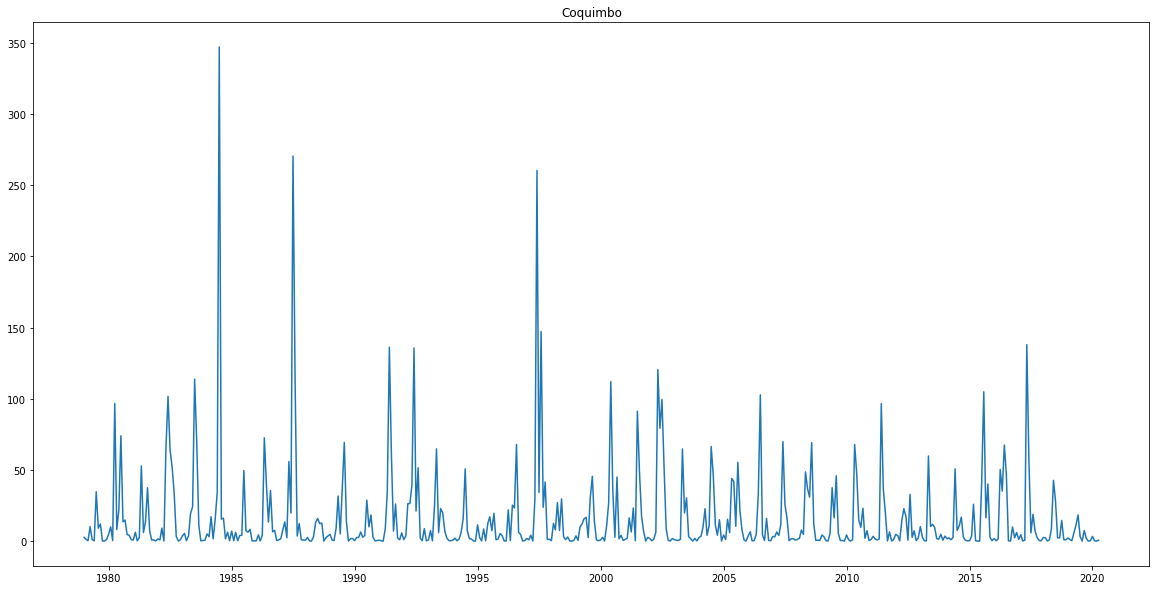

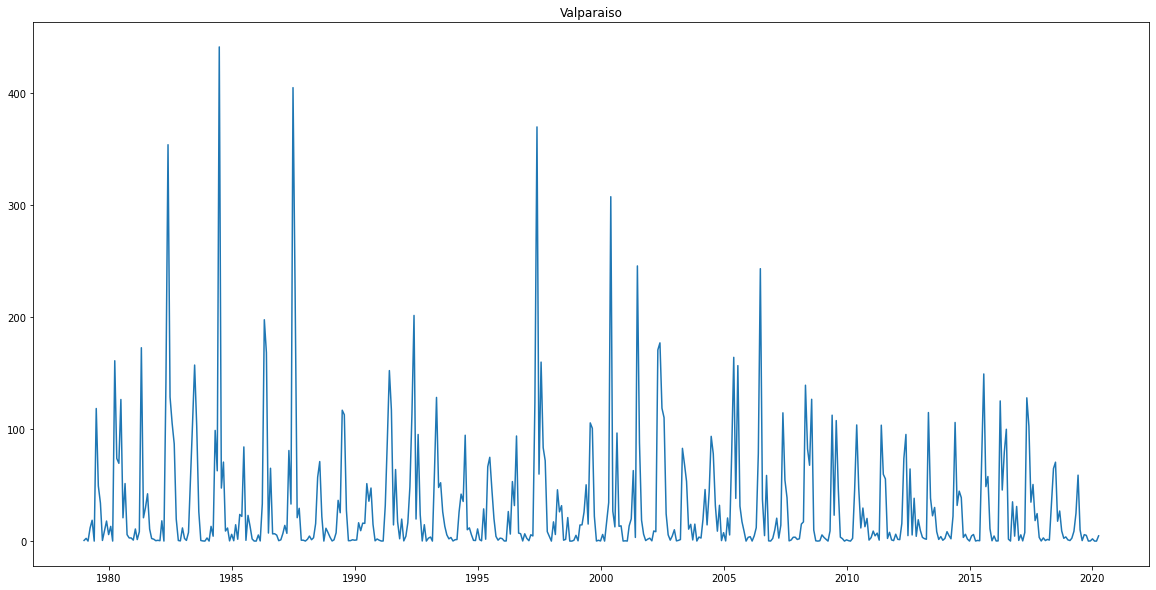

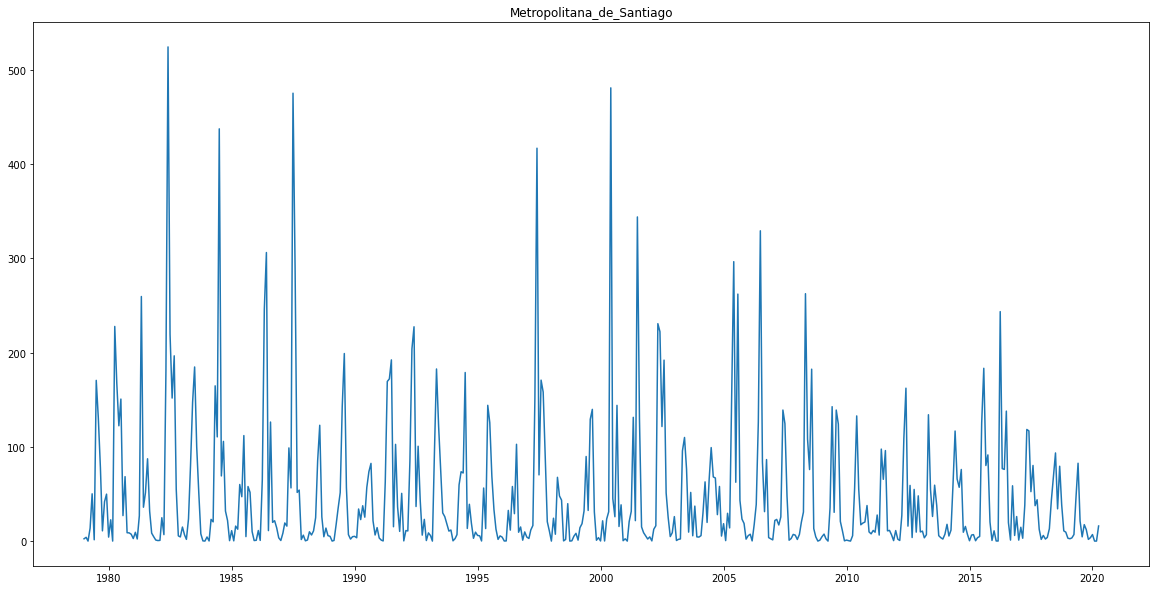

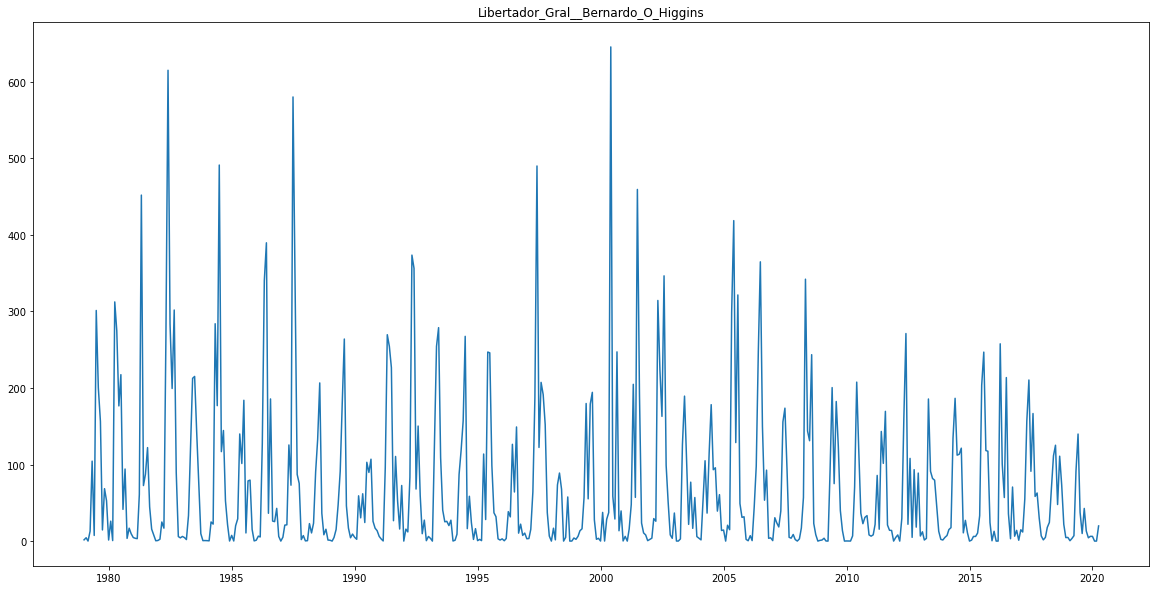

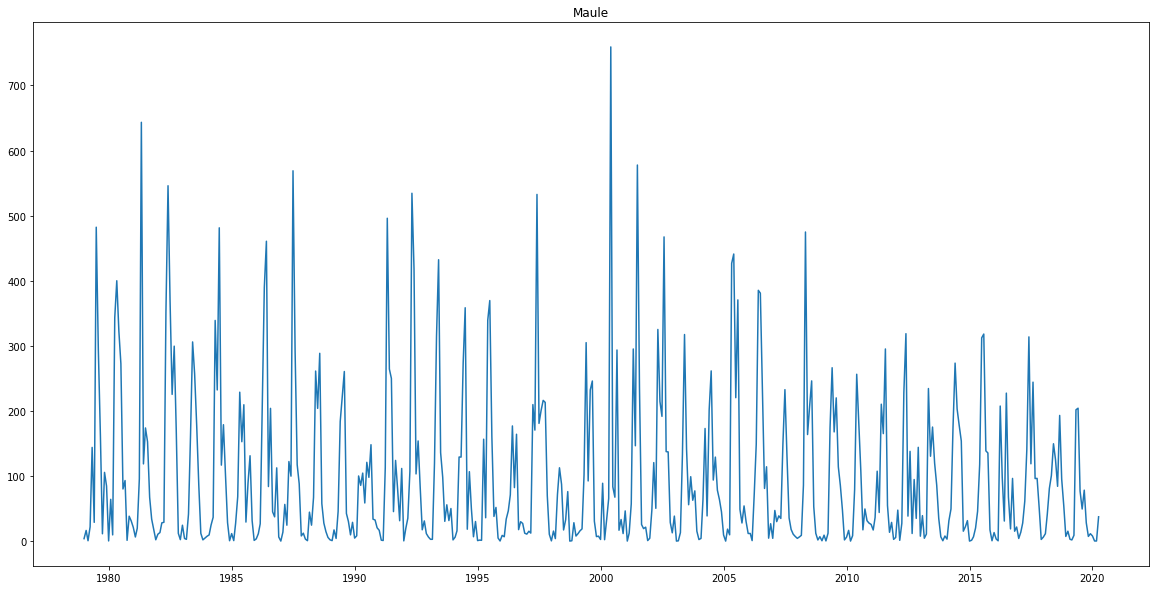

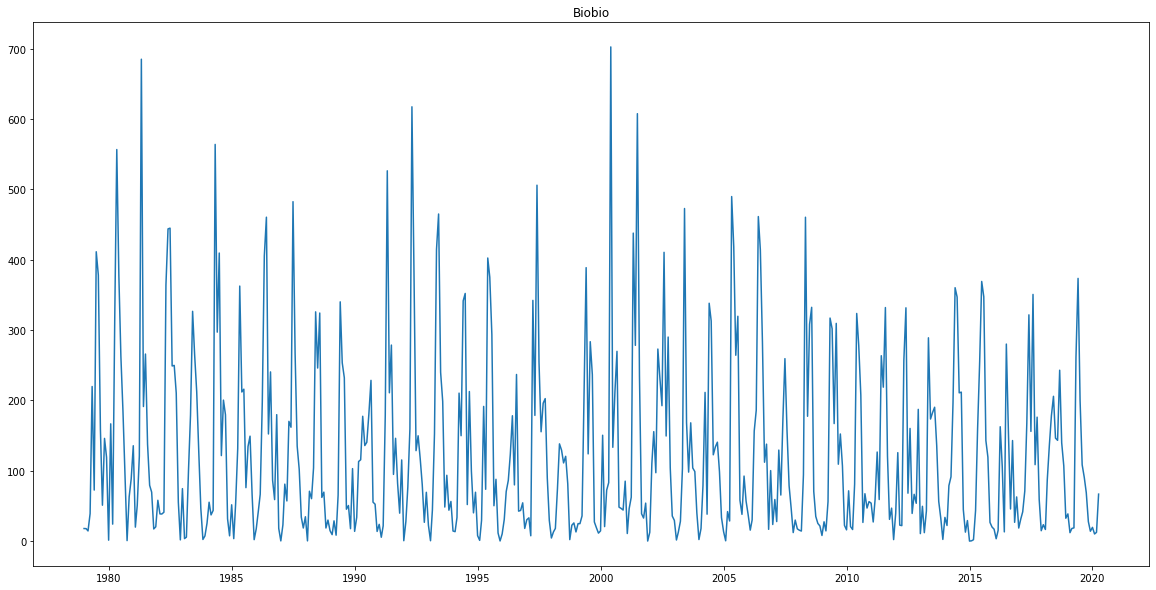

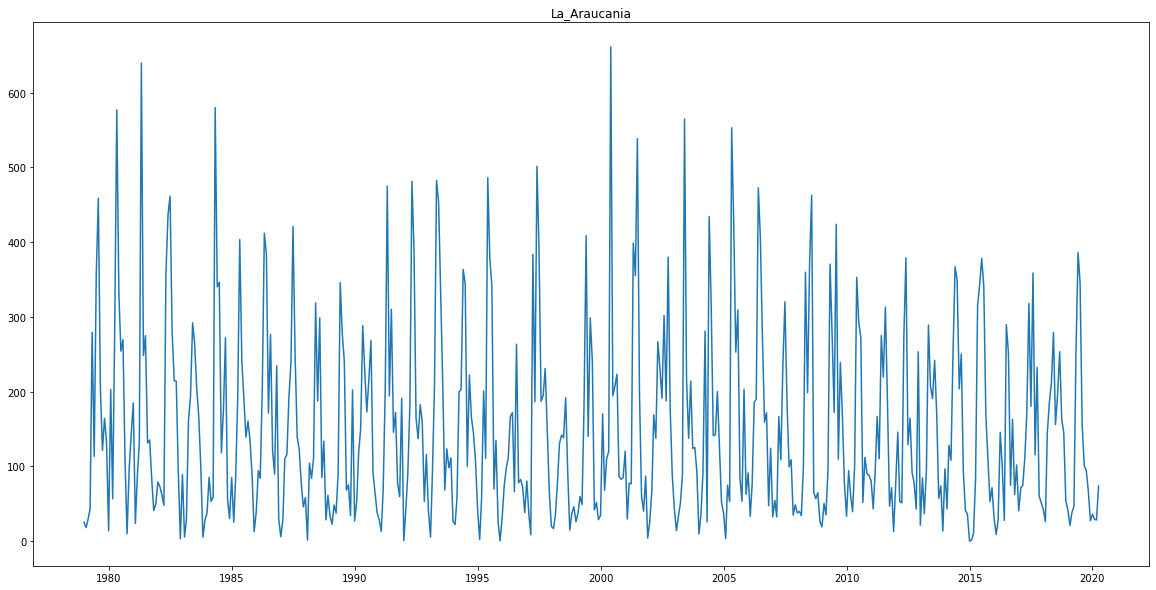

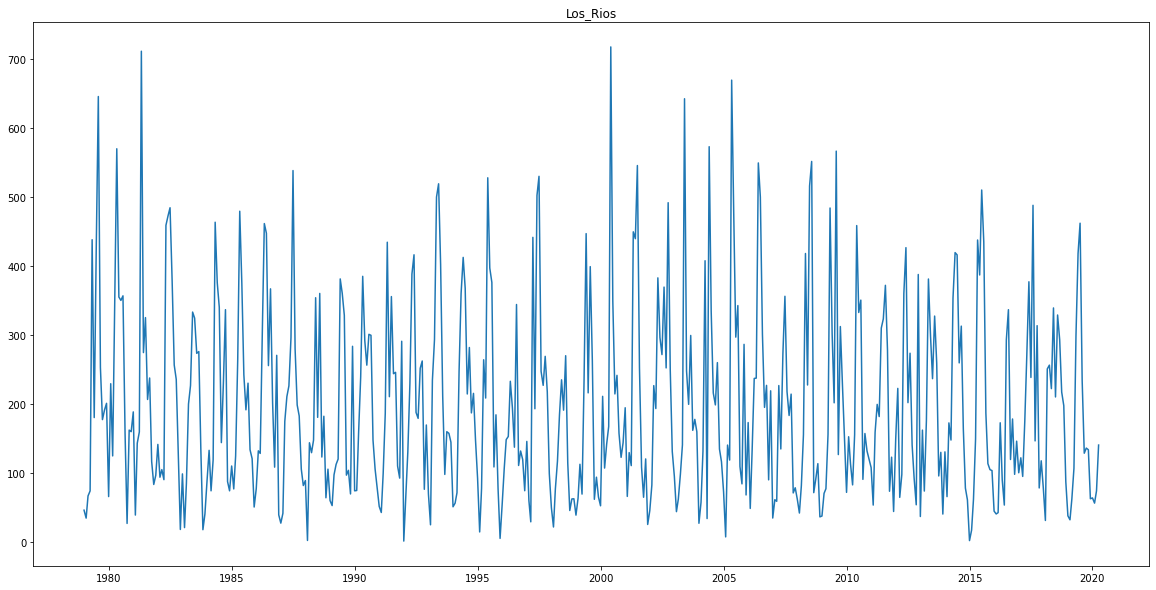

In [7]:
#plot
df_prec.set_index('date', drop=True, inplace=True)
for region in df_prec.columns:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df_prec.index, df_prec[region])
    plt.title(region)

Facilmente vemos que las variables se encuentran todas dentro de rangos razonables. No hay outliers, missing values, ni valores negativos, por lo que salvo el cambio de índice, no hacemos cambios en la base. Esta base estaría lista para ser usada en un modelo.

In [8]:
#central bank dataset
print('Base Banco Central')
print('Columnas: ', df_bc.columns)
print('Tipo de Variables: ', df_bc.dtypes)
df_bc.head()

Base Banco Central
Columnas:  Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de

Periodo Imacec_empalmado Imacec_produccion_de_bienes  \
0  2013-03-01 00:00:00 UTC      102.796.218                  10.546.824   
1  2013-04-01 00:00:00 UTC      101.664.842                 999.272.757   
2  2013-05-01 00:00:00 UTC      101.642.954                 993.959.922   
3  2013-06-01 00:00:00 UTC      998.310.201                 968.367.884   
4  2013-07-01 00:00:00 UTC      964.696.194                 961.051.418   

  Imacec_minero Imacec_industria Imacec_resto_de_bienes Imacec_comercio  \
0   978.554.365      102.297.537            114.994.919     110.729.395   
1   927.333.293      104.485.589            102.199.311     106.098.291   
2    96.133.164      105.445.361            968.789.055     100.462.117   
3   102.400.933      999.212.106             89.190.493     939.504.414   
4   980.029.022      100.882.112            901.785.886      92.776.599   

  Imacec_servicios Imacec_a_costo_de_factores Imacec_no_minero  ...  \
0      100.064.328                103.163.651      103.405.852  ...   
1      102.600.107                101.937.319      102.766.884  ...   
2      104.083.216                101.953.299      102.322.796  ...   
3      103.857.161                100.222.381      995.139.235  ...   
4      969.309.272                962.069.134      962.804.305  ...   

  Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
0                                        865.903.468      
1                                        867.806.065      
2                                        878.030.947      
3                                        913.180.348      
4                                        909.263.447      

  Indice_de_produccion_industrial Indice_de_produccion_industrial__mineria  \
0                     102.761.705                               98.915.705   
1                     968.087.179                              914.276.663   
2                     978.471.874                              966.913.278   
3                     966.647.135                              981.820.974   
4                     100.100.749                              990.198.382   

  Indice_de_produccion_industrial_electricidad__gas_y_agua  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

  Indice_de_produccion_industrial__manufacturera  \
0                                    108.387.837   
1                                    104.545.429   
2                                     99.468.801   
3                                     94.969.678   
4                                    102.128.977   

  Generacion_de_energia_electrica_CDEC_GWh  \
0                              580.480.672   
1                              544.815.032   
2                               56.891.916   
3                               56.594.867   
4                              586.329.899   

  Indice_de_ventas_comercio_real_IVCM  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

  Indice_de_ventas_comercio_real_no_durables_IVCM  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Indice_de_ventas_comercio_real_durables_IVCM Ventas_autos_nuevos  
0                                          NaN             28577.0  
1                                          NaN             32206.0  
2                                          NaN             31589.0  
3                                          NaN             28

In [9]:
#first, lets check periodo colums - we will try to transform it to datetime
df_bc['Periodo'] = pd.to_datetime(df_bc['Periodo']) #--> this error is on purpose

ParserError: month must be in 1..12: 2020-13-01 00:00:00 UTC

Vemos que existen errores en la columna de fechas, ya que no se puede transformar directamente a datetime (revisaremos este punto). Además, vemos que los datos de los índices macro aparecen como object; una primera observación es que tienen más de un punto, por lo que no son reconocidos con int o float (también corregiremos este efecto)

In [10]:
#we will check each date since there is a problem with the transformation
for i in range(df_bc.shape[0]):
    try:
        pd.to_datetime(df_bc.iloc[i, 0])
    except:
        print(i, df_bc.iloc[i,0])


89 2020-13-01 00:00:00 UTC


In [11]:
#lets check the problem row - months is 13 --> problem
df_bc.iloc[[89], :].head()

Periodo Imacec_empalmado Imacec_produccion_de_bienes  \
89  2020-13-01 00:00:00 UTC              NaN                         NaN   

   Imacec_minero Imacec_industria Imacec_resto_de_bienes Imacec_comercio  \
89           NaN              NaN                    NaN     803.222.345   

   Imacec_servicios Imacec_a_costo_de_factores Imacec_no_minero  ...  \
89              NaN                        NaN              NaN  ...   

   Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
89                                                NaN      

   Indice_de_produccion_industrial Indice_de_produccion_industrial__mineria  \
89                             NaN                                      NaN   

   Indice_de_produccion_industrial_electricidad__gas_y_agua  \
89                                                NaN         

   Indice_de_produccion_industrial__manufacturera  \
89                                            NaN   

   Generacion_de_energia_electrica_CDEC_GWh  \
89                                      NaN   

   Indice_de_ventas_comercio_real_IVCM  \
89                                 NaN   

   Indice_de_ventas_comercio_real_no_durables_IVCM  \
89                                             NaN   

   Indice_de_ventas_comercio_real_durables_IVCM Ventas_autos_nuevos  
89                                  893.234.345                 NaN  

[1 rows x 85 columns]

In [12]:
#drop the problem row and transform to date
df_bc.drop(89, inplace=True)
df_bc['Periodo'] = pd.to_datetime(df_bc['Periodo'])

#sort_values and set as index
df_bc.sort_values(by=['Periodo'], ascending=True, inplace=True)
df_bc.set_index('Periodo', drop=True, inplace=True)

df_bc.head()

Imacec_empalmado Imacec_produccion_de_bienes  \
Periodo                                                                  
1970-01-01 00:00:00+00:00              NaN                         NaN   
1970-02-01 00:00:00+00:00              NaN                         NaN   
1970-03-01 00:00:00+00:00              NaN                         NaN   
1970-04-01 00:00:00+00:00              NaN                         NaN   
1970-05-01 00:00:00+00:00              NaN                         NaN   

                          Imacec_minero Imacec_industria  \
Periodo                                                    
1970-01-01 00:00:00+00:00           NaN              NaN   
1970-02-01 00:00:00+00:00           NaN              NaN   
1970-03-01 00:00:00+00:00           NaN              NaN   
1970-04-01 00:00:00+00:00           NaN              NaN   
1970-05-01 00:00:00+00:00           NaN              NaN   

                          Imacec_resto_de_bienes Imacec_comercio  \
Periodo                                                            
1970-01-01 00:00:00+00:00                    NaN             NaN   
1970-02-01 00:00:00+00:00                    NaN             NaN   
1970-03-01 00:00:00+00:00                    NaN             NaN   
1970-04-01 00:00:00+00:00                    NaN             NaN   
1970-05-01 00:00:00+00:00                    NaN             NaN   

                          Imacec_servicios Imacec_a_costo_de_factores  \
Periodo                                                                 
1970-01-01 00:00:00+00:00              NaN                        NaN   
1970-02-01 00:00:00+00:00              NaN                        NaN   
1970-03-01 00:00:00+00:00              NaN                        NaN   
1970-04-01 00:00:00+00:00              NaN                        NaN   
1970-05-01 00:00:00+00:00              NaN                        NaN   

                          Imacec_no_minero PIB_Agropecuario_silvicola  ...  \
Periodo                                                                ...   
1970-01-01 00:00:00+00:00              NaN                        NaN  ...   
1970-02-01 00:00:00+00:00              NaN                        NaN  ...   
1970-03-01 00:00:00+00:00              NaN                        NaN  ...   
1970-04-01 00:00:00+00:00              NaN                        NaN  ...   
1970-05-01 00:00:00+00:00              NaN                        NaN  ...   

                          Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
Periodo                                                                           
1970-01-01 00:00:00+00:00                                                NaN      
1970-02-01 00:00:00+00:00                                                NaN      
1970-03-01 00:00:00+00:00                                                NaN      
1970-04-01 00:00:00+00:00                                                NaN      
1970-05-01 00:00:00+00:00                                                NaN      

                          Indice_de_produccion_industrial  \
Periodo                                                     
1970-01-01 00:00:00+00:00                             NaN   
1970-02-01 00:00:00+00:00                             NaN   
1970-03-01 00:00:00+00:00                             NaN   
1970-04-01 00:00:00+00:00                             NaN   
1970-05-01 00:00:00+00:00                             NaN   

                          Indice_de_produccion_industrial__mineria  \
Periodo                                                              
1970-01-01 00:00:00+00:00                                      NaN   
1970-02-01 00:00:00+00:00                                      NaN   
1970-03-01 00:00:00+00:00                                      NaN   
1970-04-01 00:00:00+00:00                                      NaN   
1970-05-01 00:00:00+00:00                                      NaN   

                          Indice_de_produccion_in

Vimos que el problema era un mes que tenía el número 13, por lo que decidimos borrarlos y ordenar los datos de acuerdo a la fecha. Del .head() se alcanza a apreciar que las series de tiempo comienzas en momentos diferentes
<br><br>
Otro punto importante, es que revisando el .csv de manera manual (con excel), se ven algunas columnas que tienen 'a's dentro de los valores, por lo que procedemos a eliminarlas

In [13]:
#we have some 'a's in the dataset - eliminate them
df_bc.replace(to_replace='a', value='', inplace=True)

In [14]:
#check datatype for each column - only print those who are not float
aux_col = [] #to save columns that are not float
for column in df_bc.columns:
    if df_bc[column].dtypes != 'float64':
        aux_col.append(column)
        print(column + ': ', df_bc[column].dtypes)

#save to manually check dataset - theres a lot of problems with the data (for example, lots of missing values
df_bc[aux_col].to_csv('prueba.csv')

Imacec_empalmado:  object
Imacec_produccion_de_bienes:  object
Imacec_minero:  object
Imacec_industria:  object
Imacec_resto_de_bienes:  object
Imacec_comercio:  object
Imacec_servicios:  object
Imacec_a_costo_de_factores:  object
Imacec_no_minero:  object
PIB_Agropecuario_silvicola:  object
PIB_Pesca:  object
PIB_Mineria:  object
PIB_Mineria_del_cobre:  object
PIB_Otras_actividades_mineras:  object
PIB_Industria_Manufacturera:  object
PIB_Alimentos:  object
PIB_Bebidas_y_tabaco:  object
PIB_Textil:  object
PIB_Maderas_y_muebles:  object
PIB_Celulosa:  object
PIB_Refinacion_de_petroleo:  object
PIB_Quimica:  object
PIB_Minerales_no_metalicos_y_metalica_basica:  object
PIB_Productos_metalicos:  object
PIB_Electricidad:  object
PIB_Construccion:  object
PIB_Comercio:  object
PIB_Restaurantes_y_hoteles:  object
PIB_Transporte:  object
PIB_Comunicaciones:  object
PIB_Servicios_financieros:  object
PIB_Servicios_empresariales:  object
PIB_Servicios_de_vivienda:  object
PIB_Servicios_persona

In [15]:
#quick check for missing values
print('Para datos banco central:')
print(df_bc.isnull().sum())
print('\n Total trips:', df_bc.shape[0], '\n')

Para datos banco central:
Imacec_empalmado                                   313
Imacec_produccion_de_bienes                        313
Imacec_minero                                      313
Imacec_industria                                   312
Imacec_resto_de_bienes                             313
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           349
Indice_de_ventas_comercio_real_IVCM                529
Indice_de_ventas_comercio_real_no_durables_IVCM    529
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                468
Length: 84, dtype: int64

 Total trips: 613 



Confirmamos que la segunda base presenta muchos problemas de integridad de datos. Por ejemplo, muchos missing values, numeros ingresados con mas de un punto (tipo object), datos mal inputados ('a's en columnas númericas), entre otros. Por lo mismo, antes de realizar cualquier análisis de rango de datos y gráficos, conviene revisar a mano (aprovechando que la base solo tiene 613 entradas) para identificar problemas y potenciales variables a eliminar. <br> <br>

Con lo anterior podremos eliminar variables dudosas (no tienen explicacion razonable de cambios de valor) y podremos ver maneras de automatizar la limpieza. <br><br>

**Observaciones**
1. Datos de Imacec y Pib estan en millones con puntos - bastaría con reemplazar y tratar los valores fuera de rango
2. Variables de precio sobrantes presentan valores pequeños al inicio (<1.000 o similar) y luego pasan a millones - borraremos los valores pequeños del inicio
3. Tipo de cambio posee valores entre observables normales y millones - no se ve un regla clara para corregir por lo que decidimos eliminarlo
4. Variables de ocupación presentan mismo fenómeno que para imacec y pib - mismo tipo de correccion
5. No_sabe__No_responde_Miles_de_personas tiene muy pocos datos, por lo que la eliminaremos
6. Para las variables de tipo indice también un fenómeno parecido, pero se observa que hay veces que pasa el valor de 9xx millones a 100 millones - parecer ser que además de eliminar puntos, falta un cero para los valores que comienzas con 1 (por 100 millones), por lo que además multiplicaremos por 10 para corregir
7. Finalmente, para Generacion_de_energia_electrica_CDEC_GWh, vemos que en el último tramo los valores están un factor de 100k abajo y todos están en el rango de los 6k y 60k - además de eliminar puntos, multiplicaremos todos números <10k por 100k y los >10k y <100k por 10k para corregir

Estos corresponden a arreglos iniciales, y automatizables (en cierta medida), se podrían encontrar otras variables a eliminar pero necesitaríamos una referencia de su explicación junto con el rango de valores para corroborar.

En cuánto al rango de valores para PIB e Imacec hacen sentido que estén en torno a los cientos de millones, pero el valor que más importa en este sentido es la variación porcentual (lo tendremos en cuenta más adelante para el modelo).

In [16]:
#lets fix the columns with problems
for column in aux_col:
    df_bc.replace('', np.nan, inplace=True) #so we can convert the numbers to floats
    if 'precio' in column.lower():
        aux = df_bc[[column]].replace('\.', '', regex=True).astype('float64')
        aux[aux<=1000] = np.nan
        df_bc[column] = aux
    elif column == 'Tipo_de_cambio_del_dolar_observado_diario' or column == 'No_sabe__No_responde_Miles_de_personas':
        df_bc.drop(column, axis=1, inplace=True)
    elif 'indice' in column.lower():
        aux = df_bc[[column]].replace('\.', '', regex=True).astype('float64')
        aux[aux<=150000000] *= 10 
        df_bc[column] = aux
    elif column == 'Generacion_de_energia_electrica_CDEC_GWh':
        aux = df_bc[[column]].replace('\.', '', regex=True).astype('float64')
        aux[aux<=10000] *= 100000
        aux[(aux>10000) & (aux<=100000)] *= 10000
        df_bc[column] = aux
    else:
        aux = df_bc[[column]].replace('\.', '', regex=True).astype('float64')
        df_bc[column] = aux
        
#save to check the dataset manually
df_bc.to_csv('prueba_2.csv')

<ipython-input-17-246703824735>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


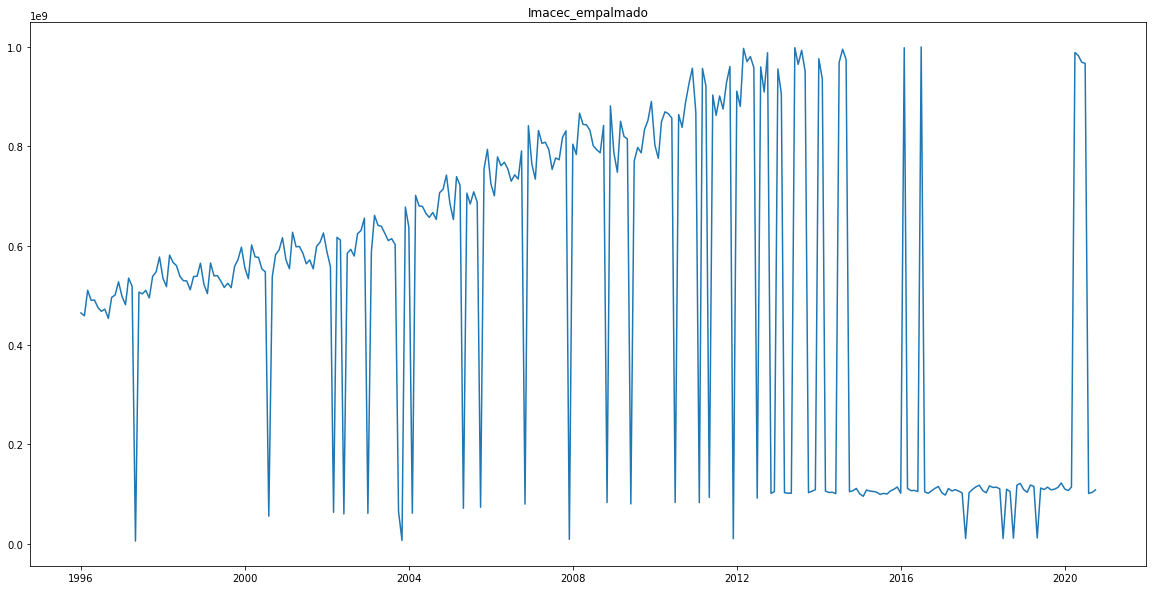

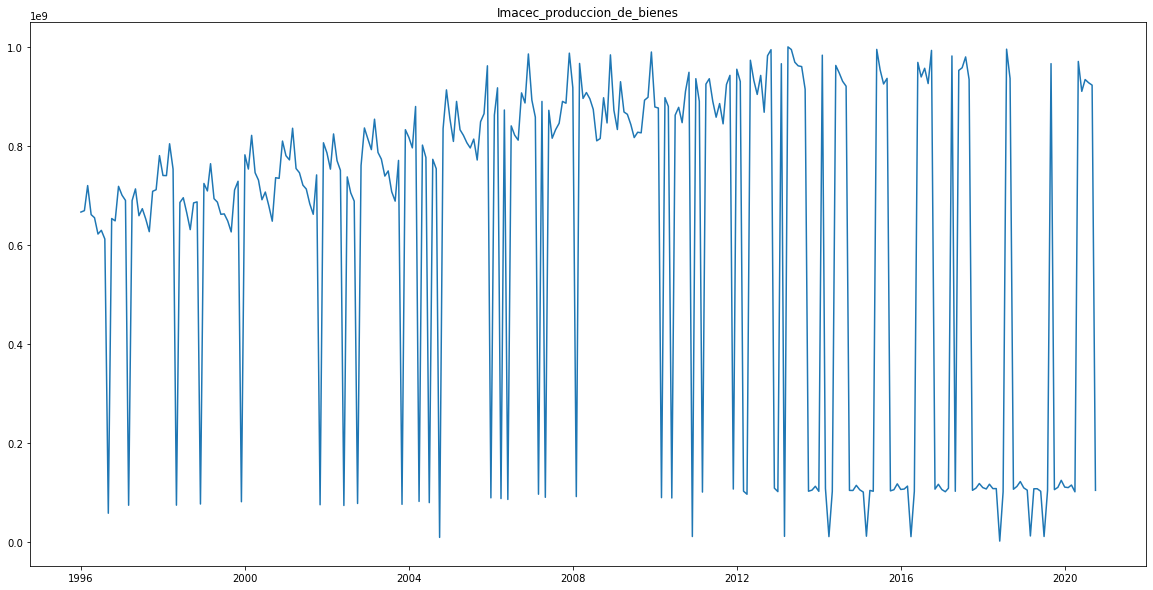

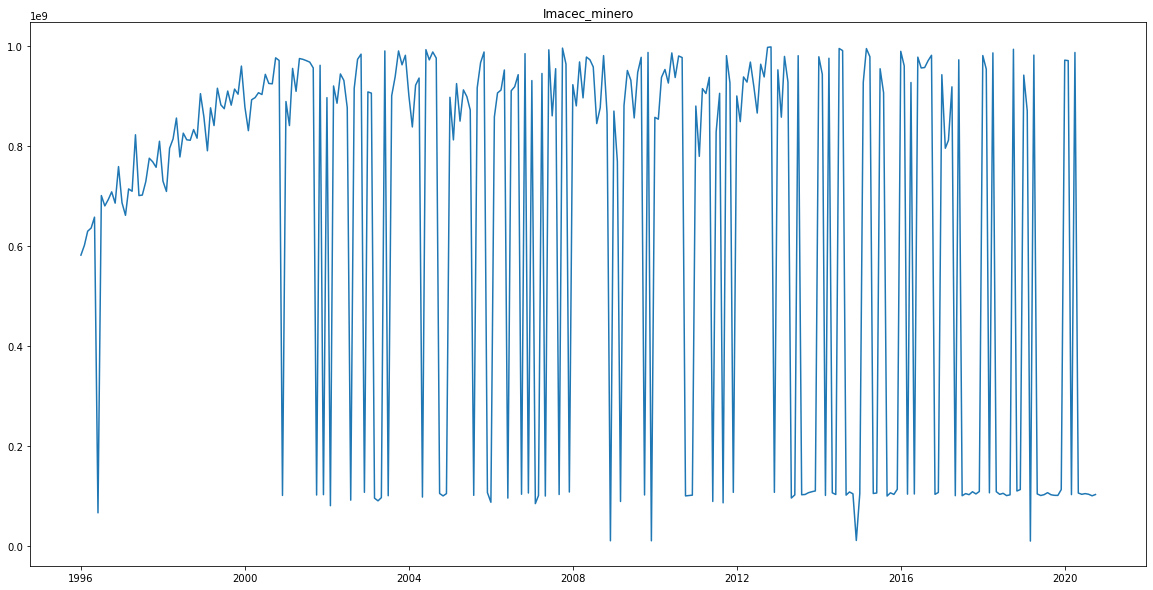

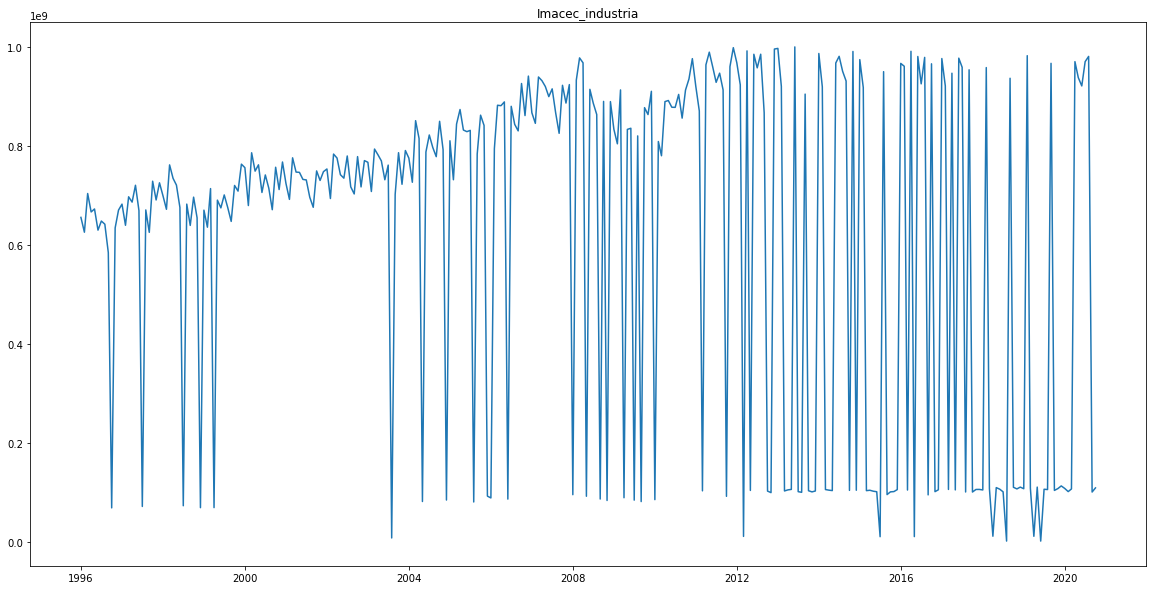

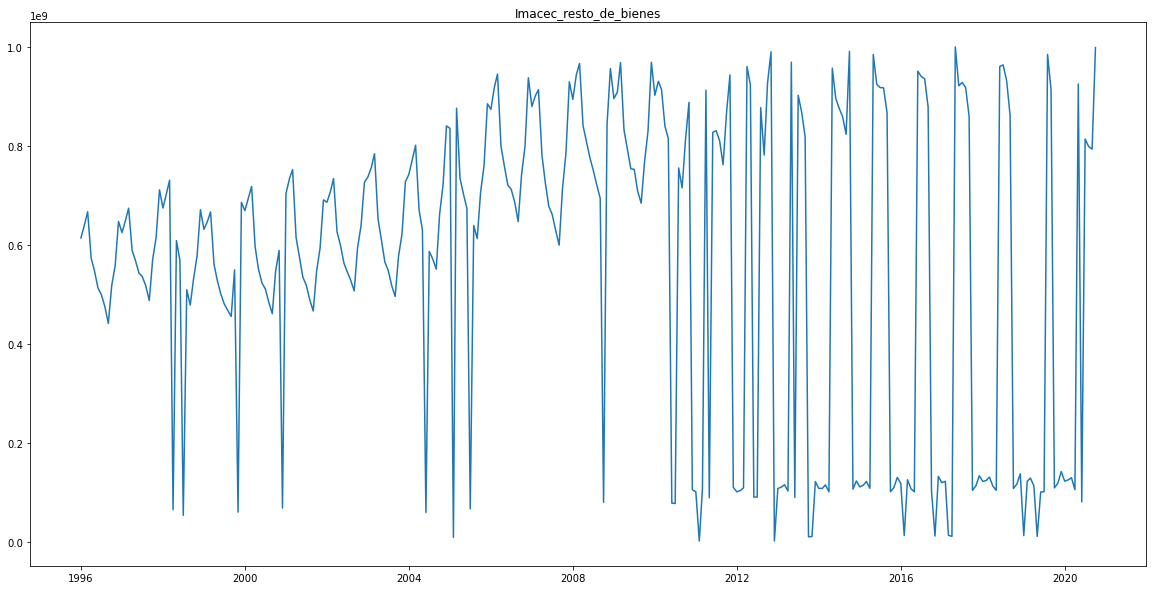

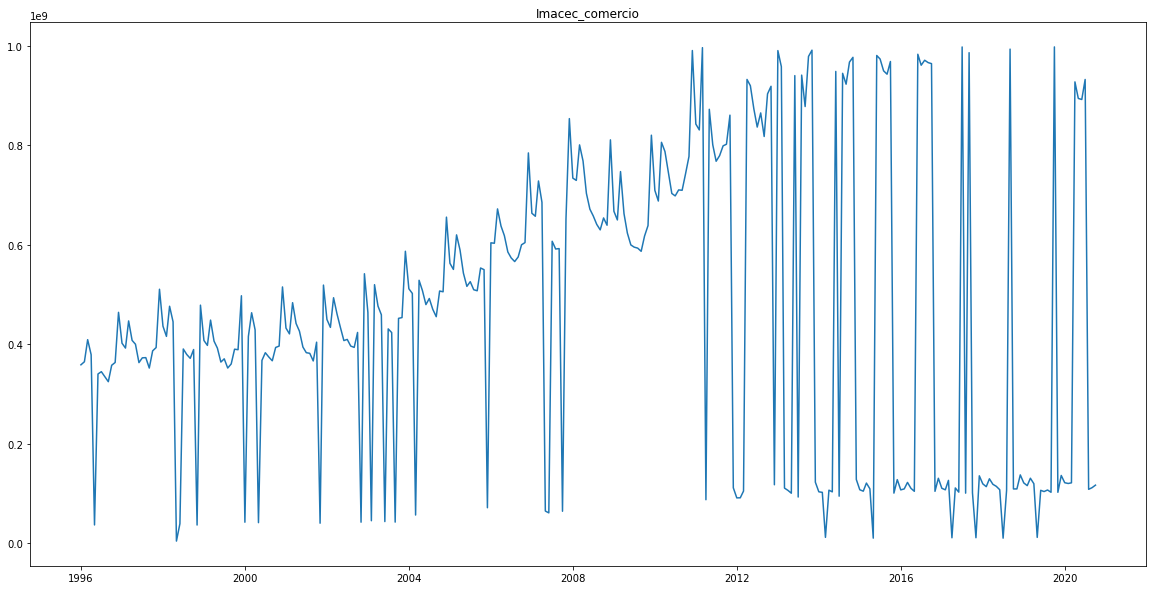

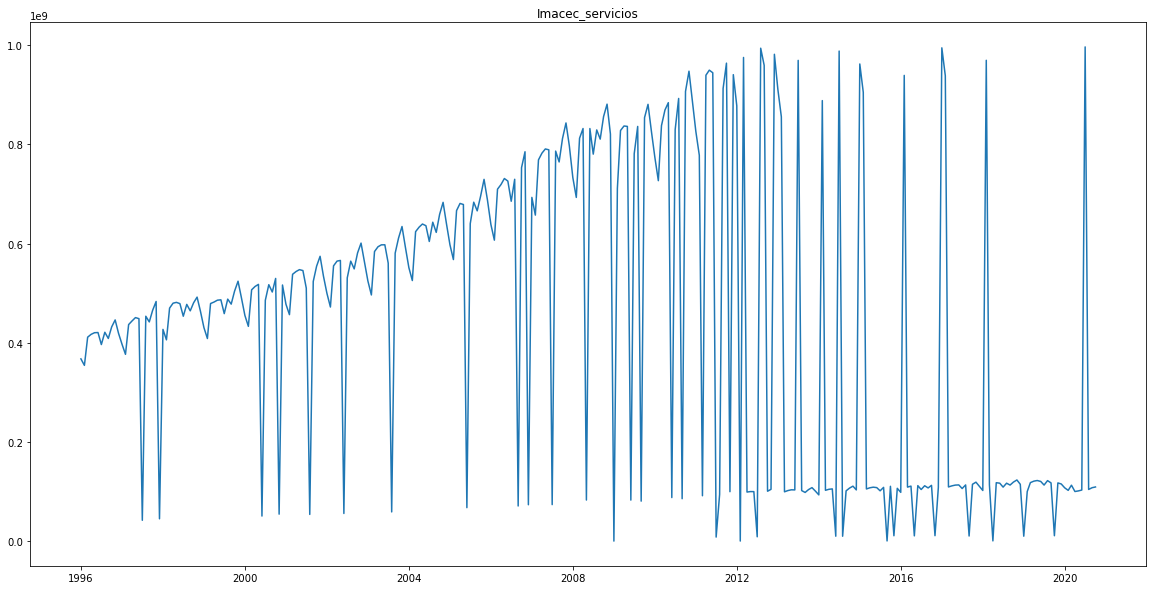

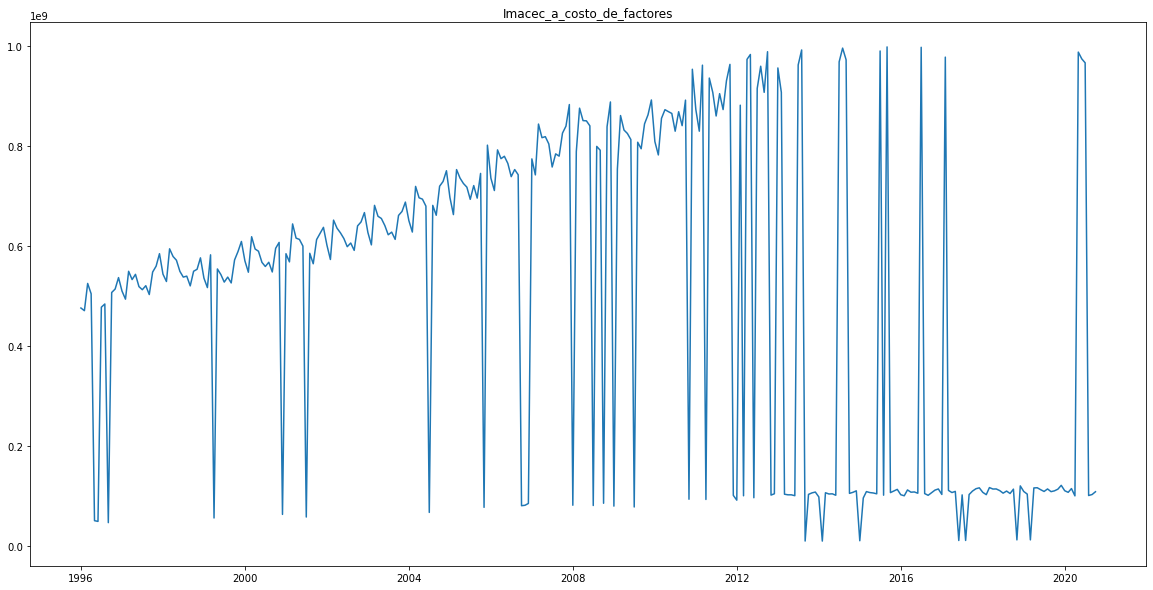

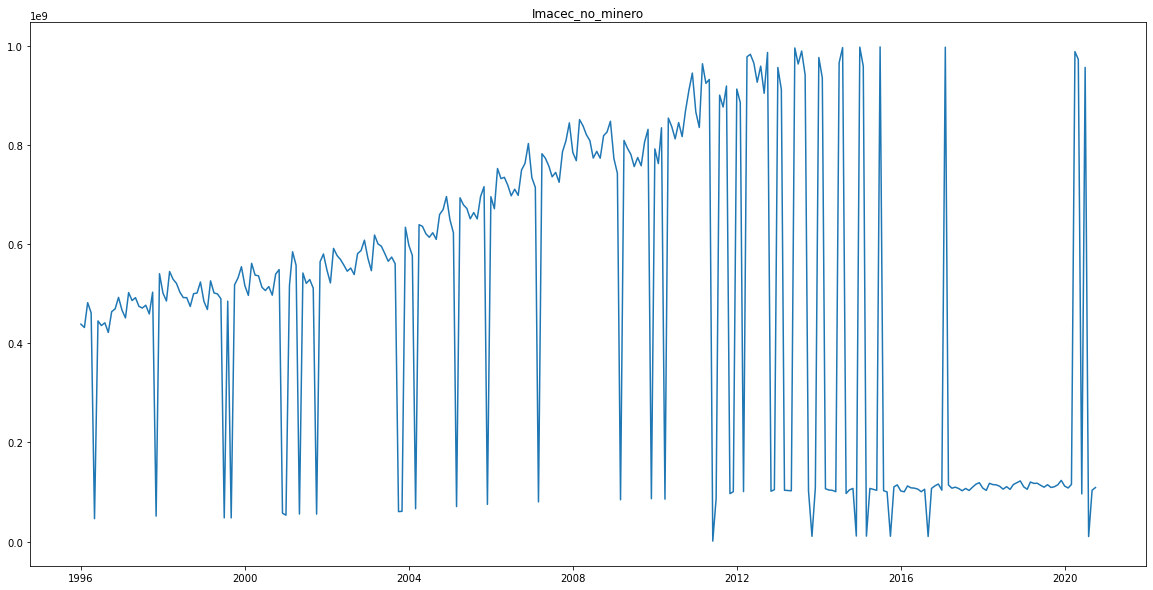

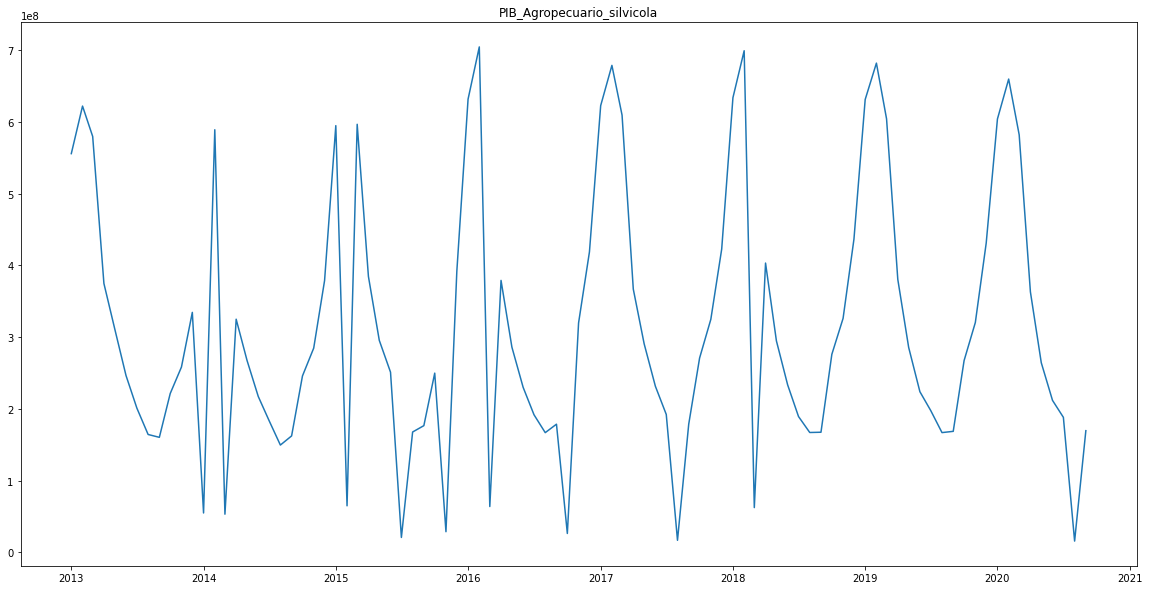

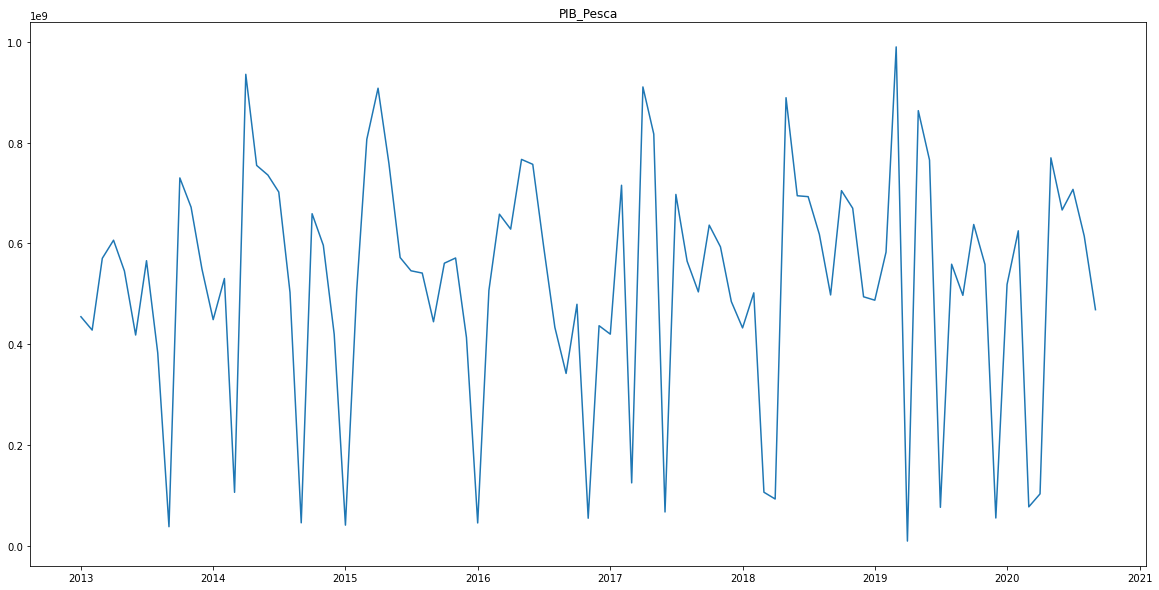

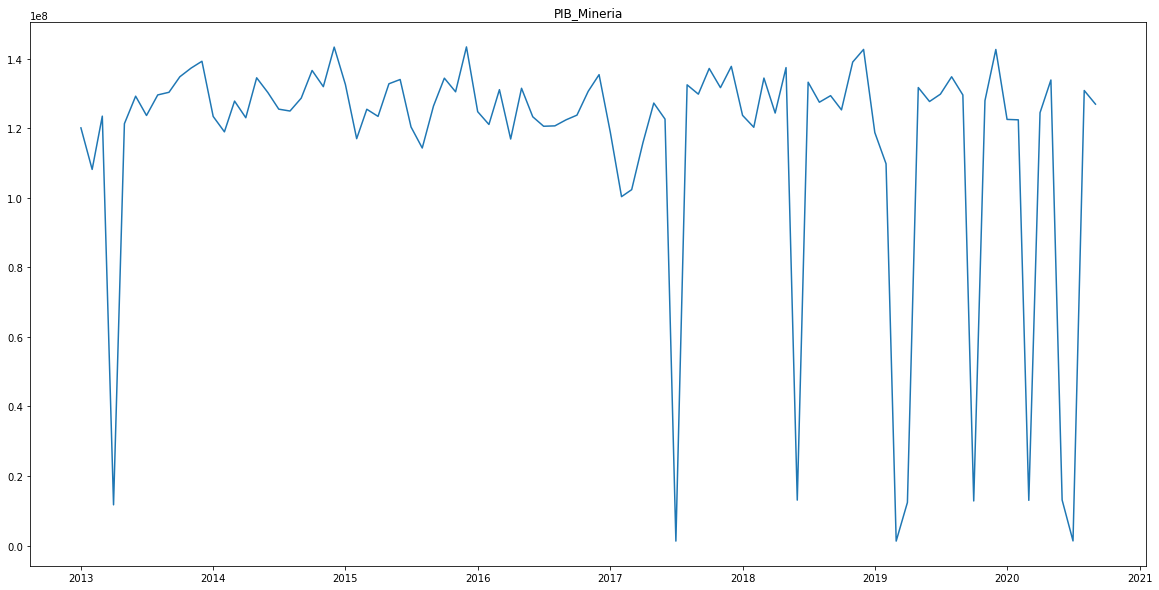

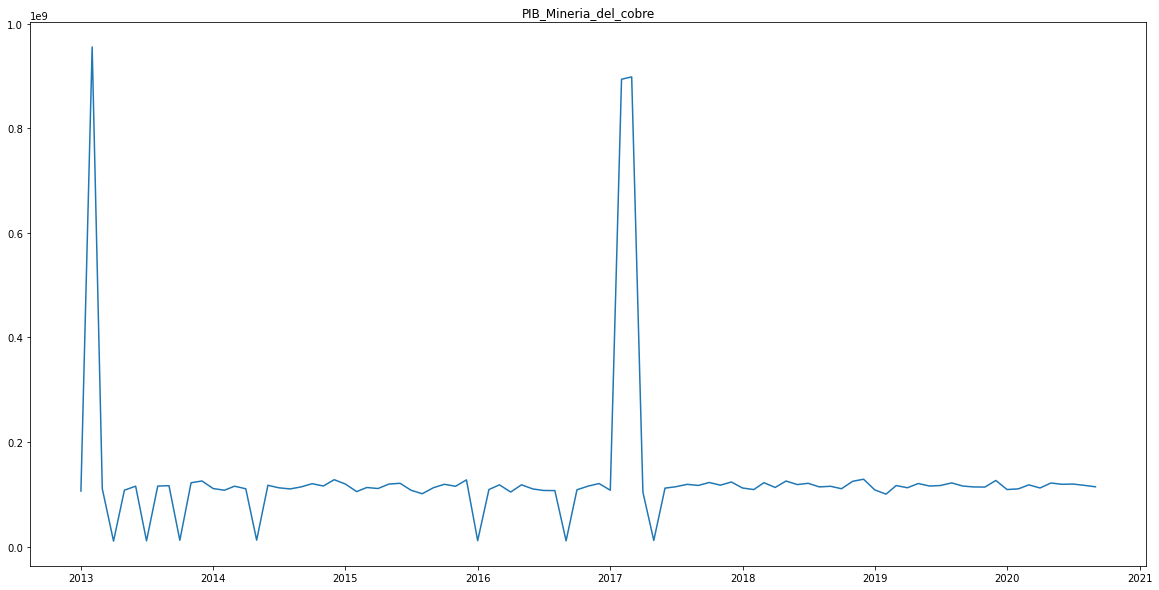

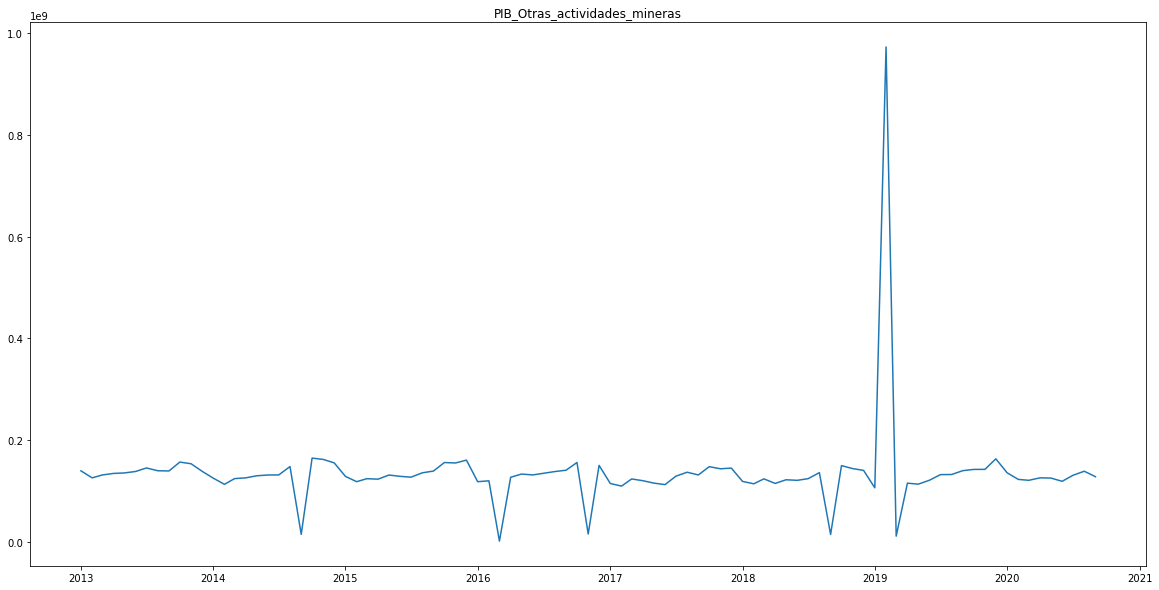

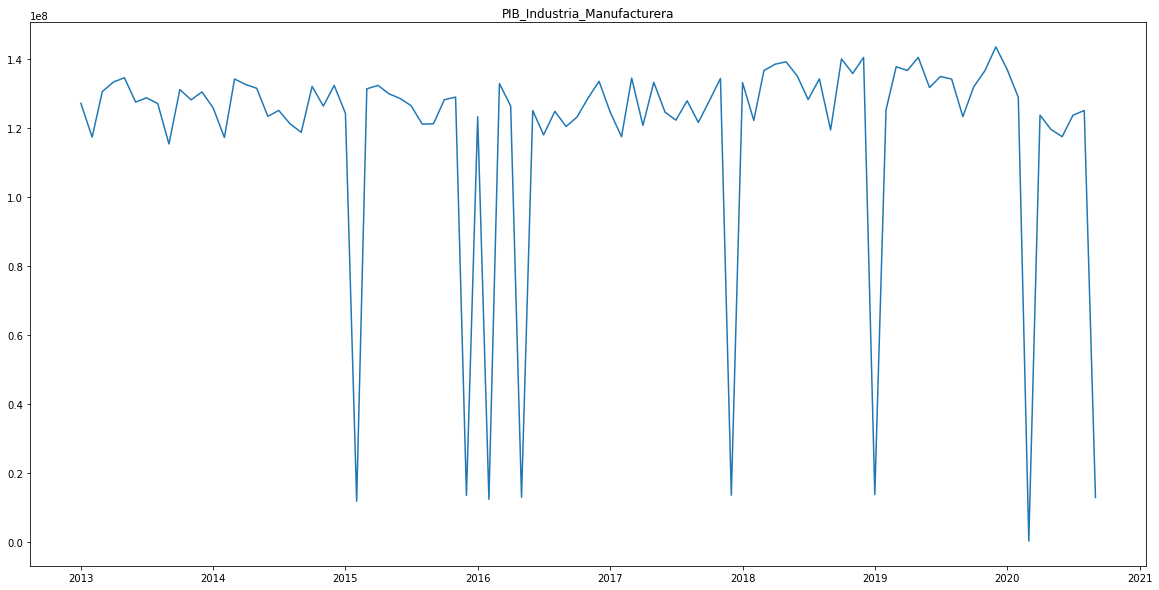

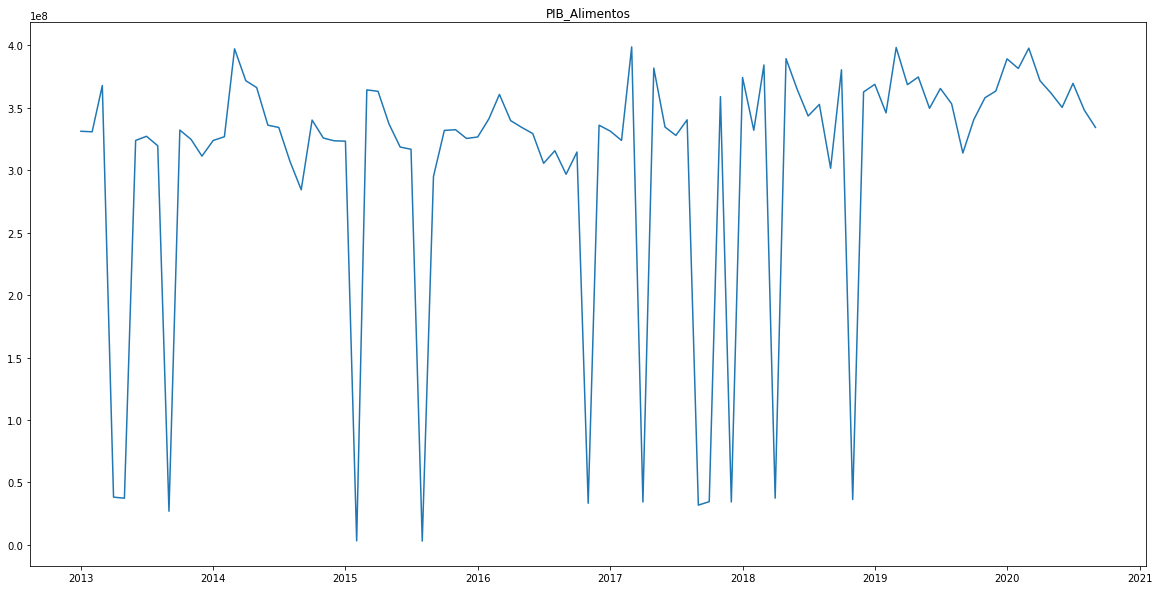

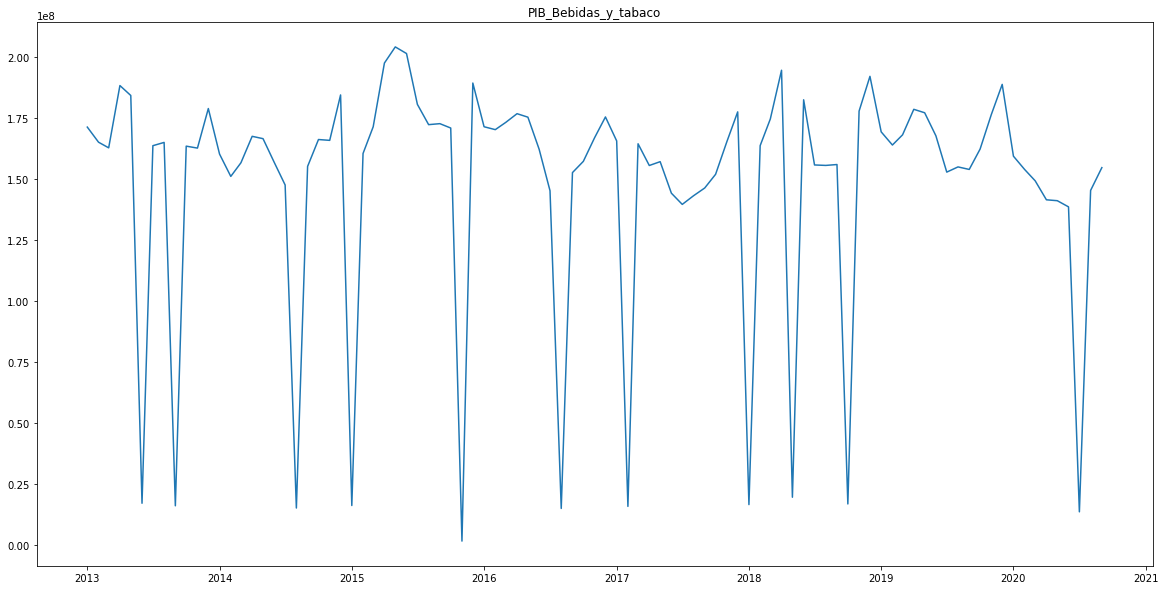

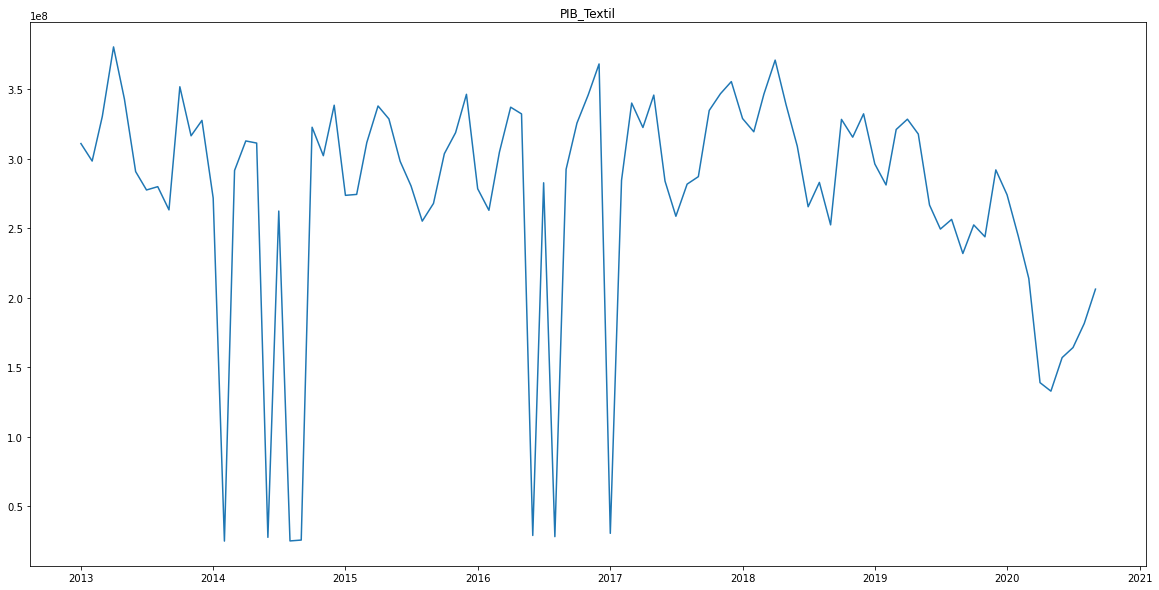

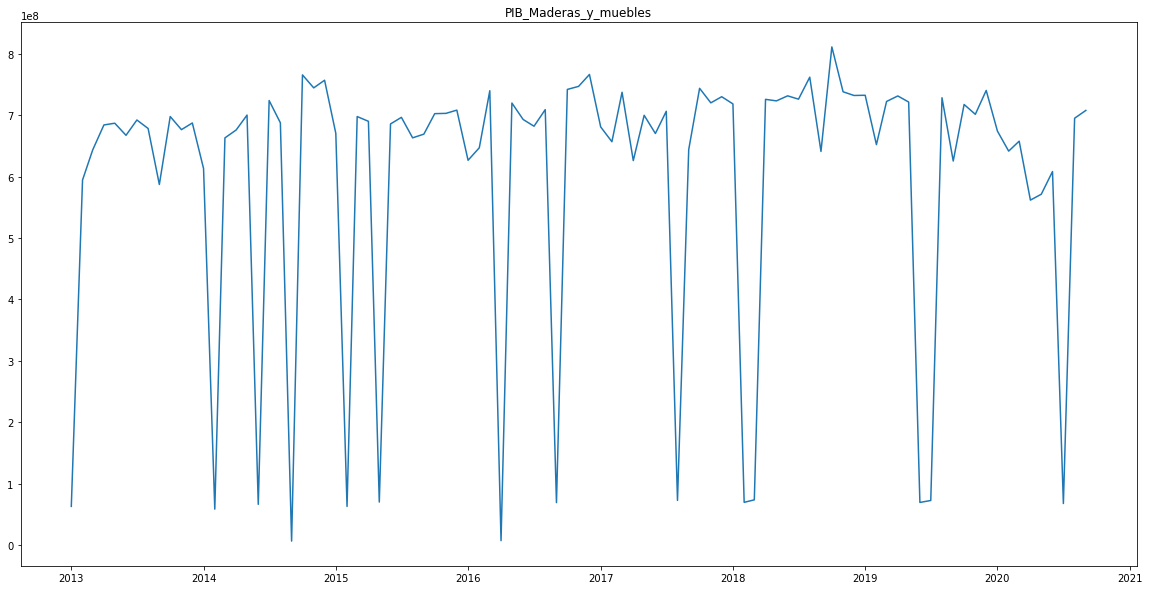

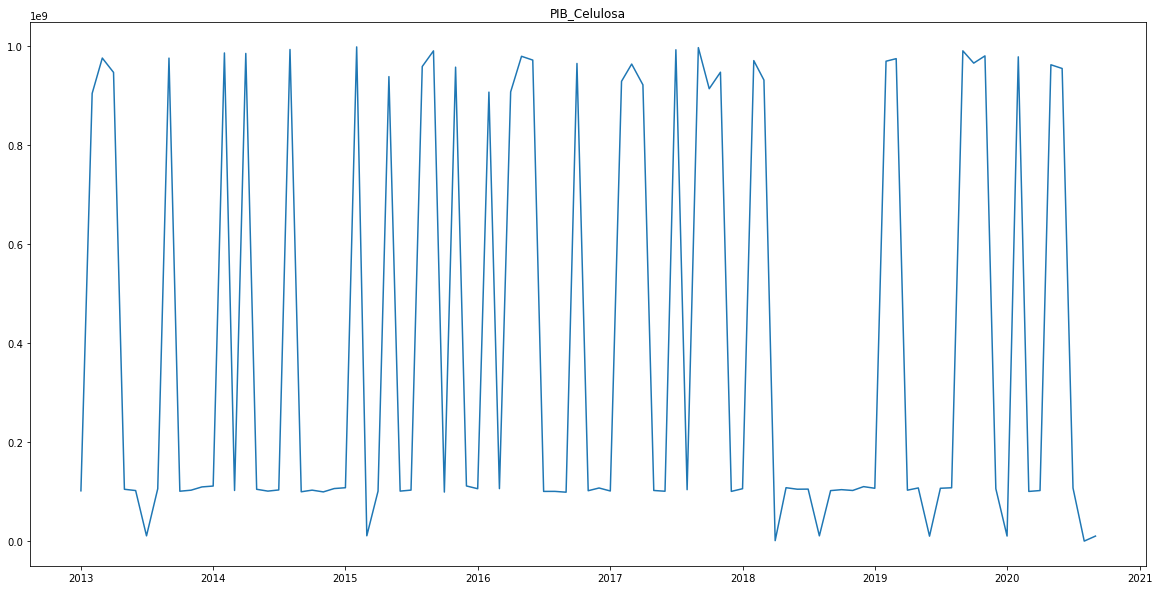

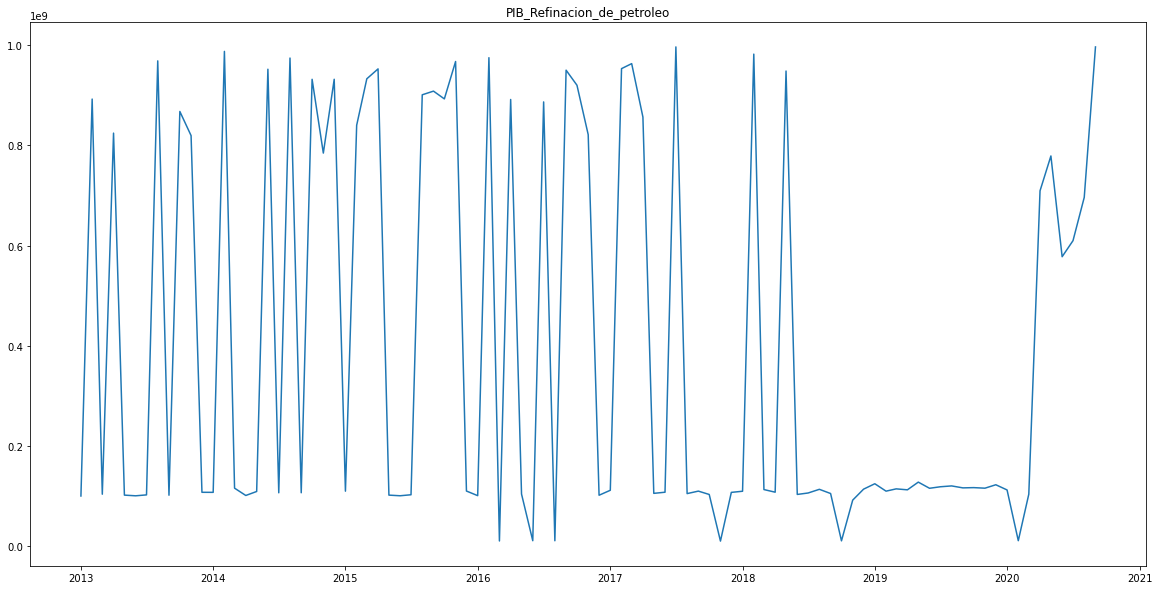

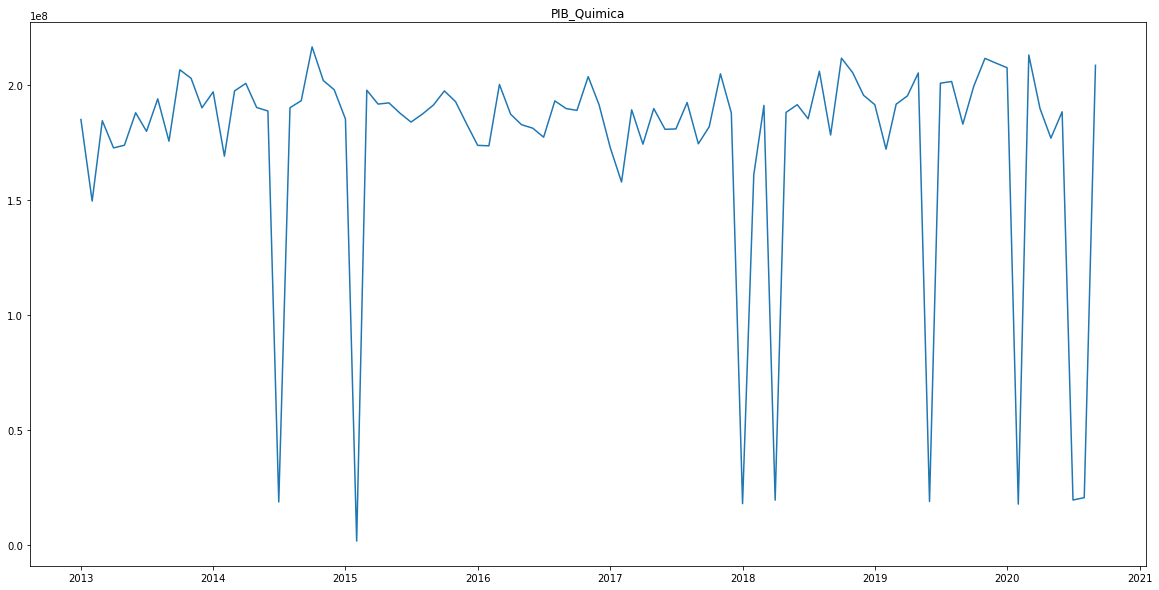

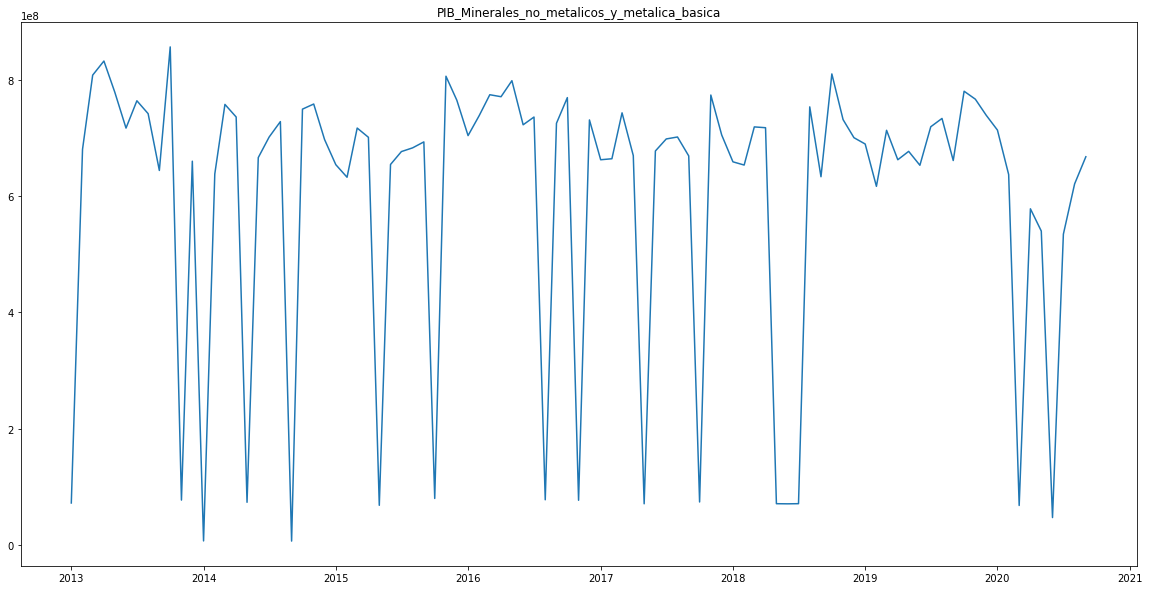

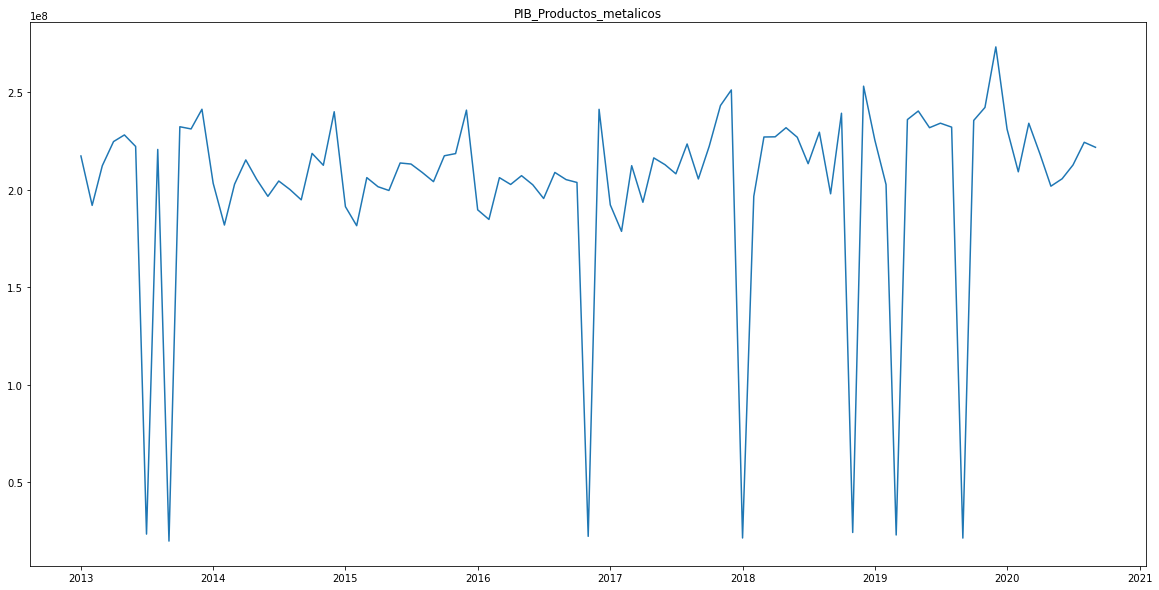

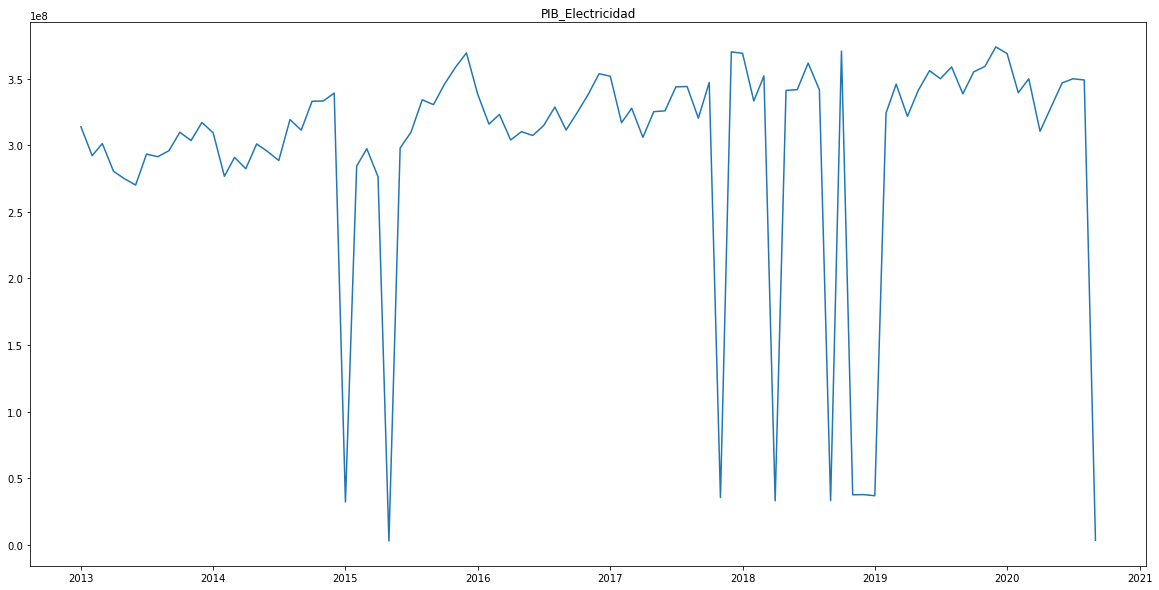

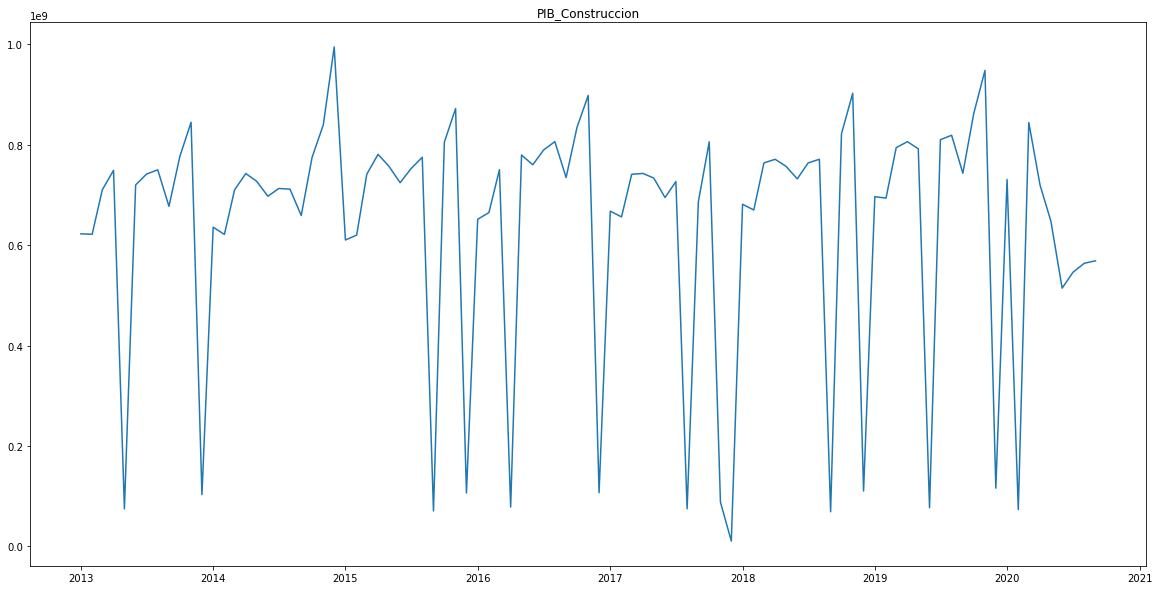

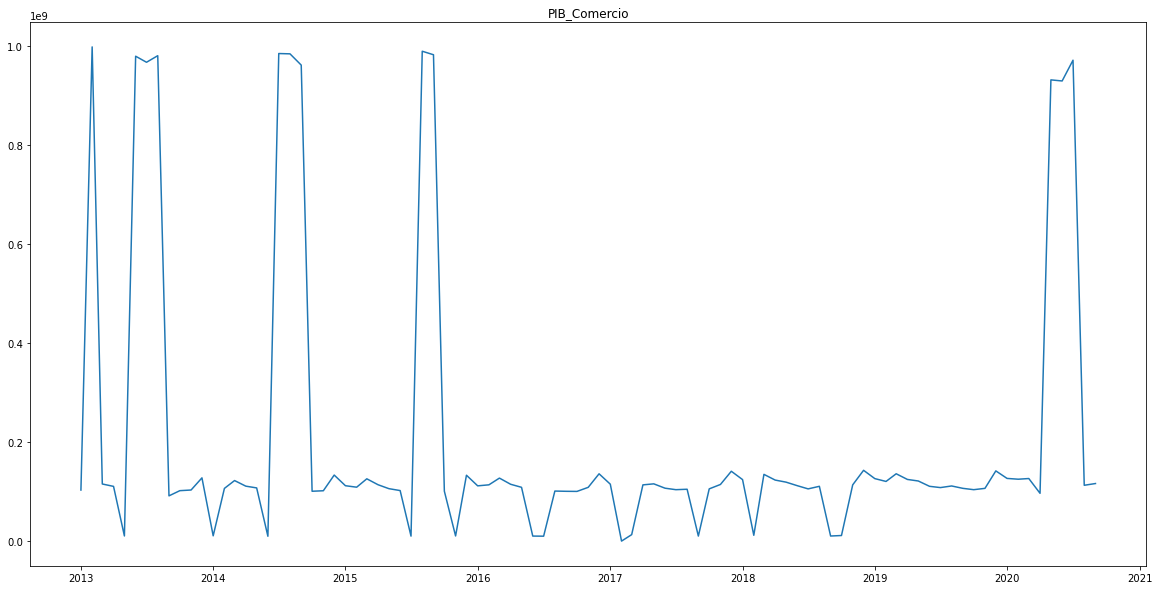

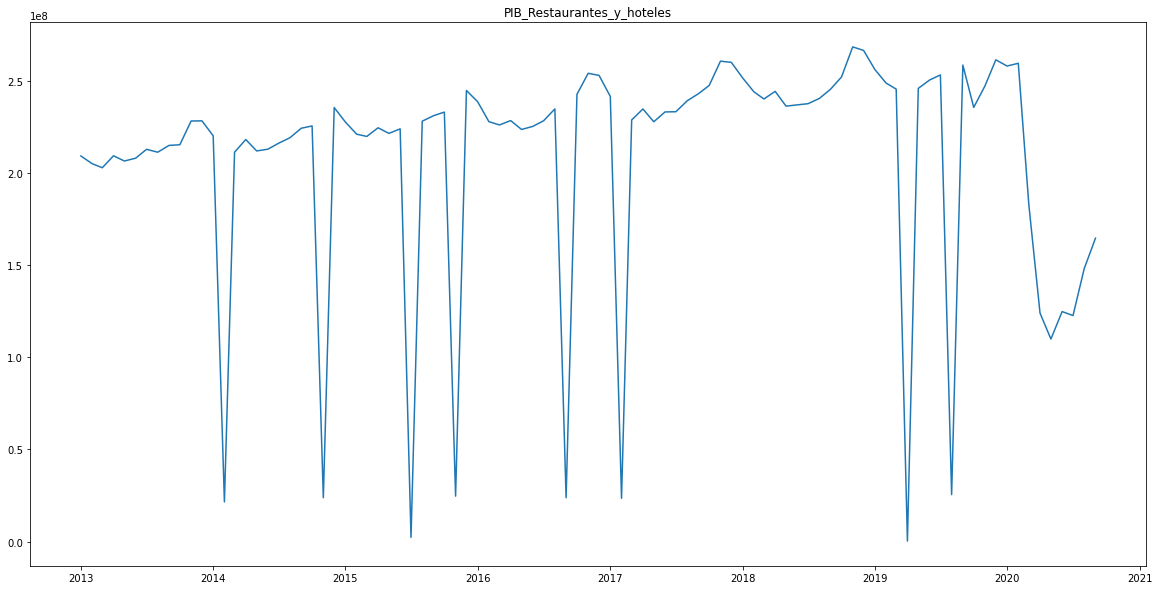

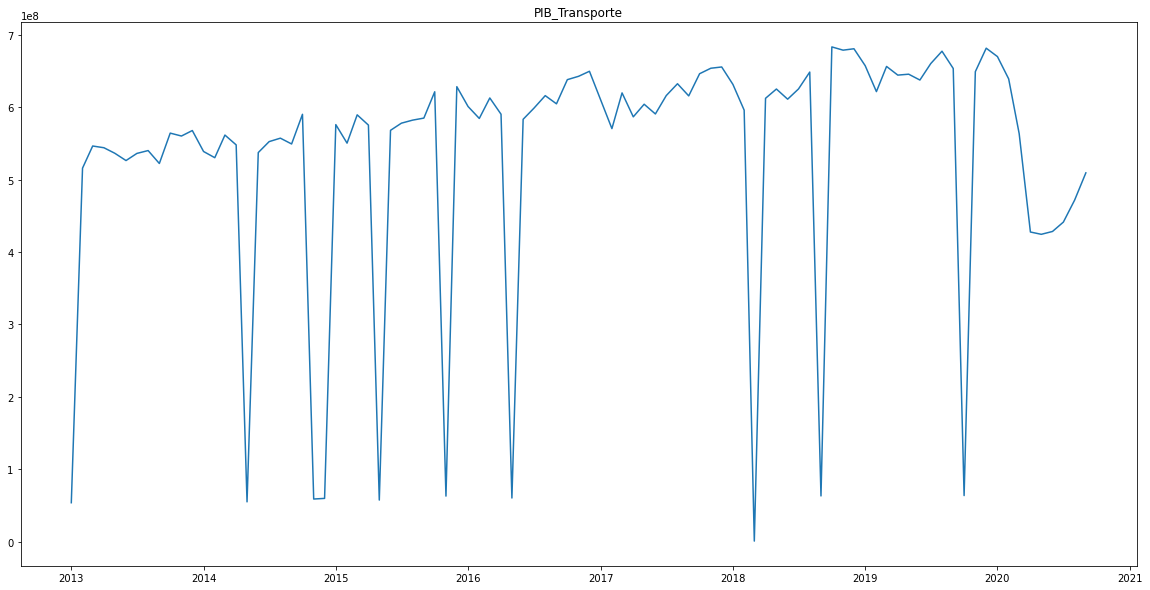

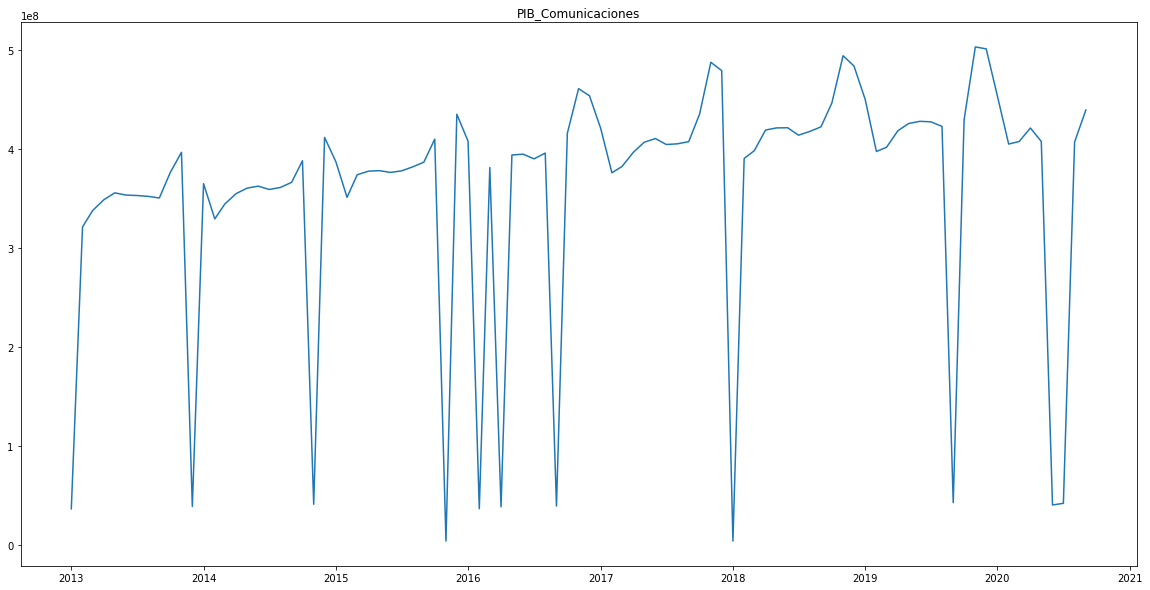

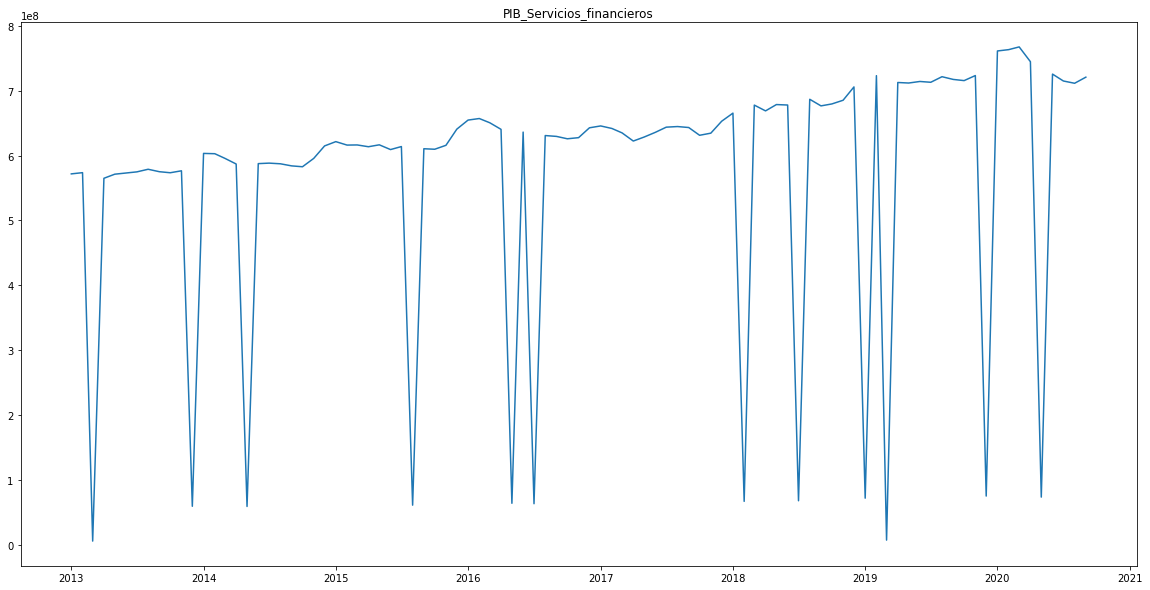

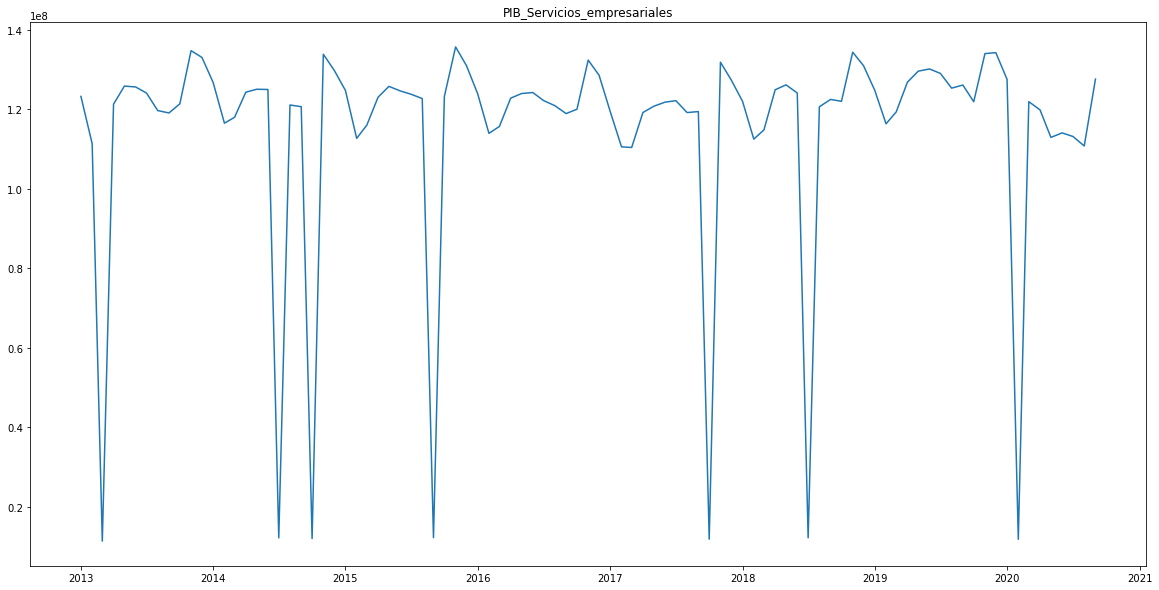

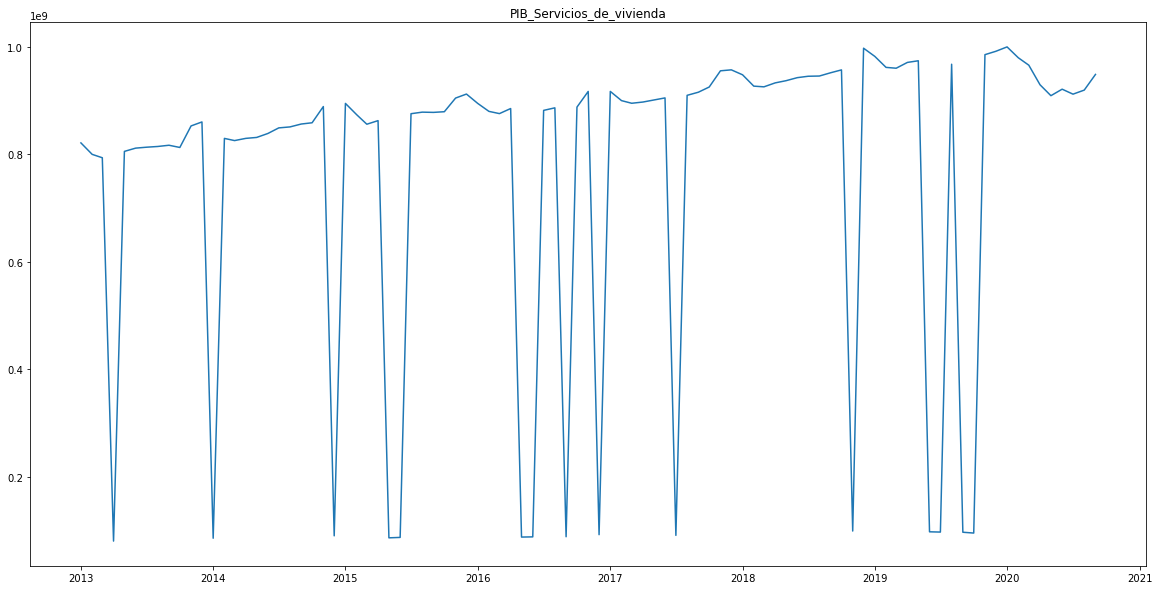

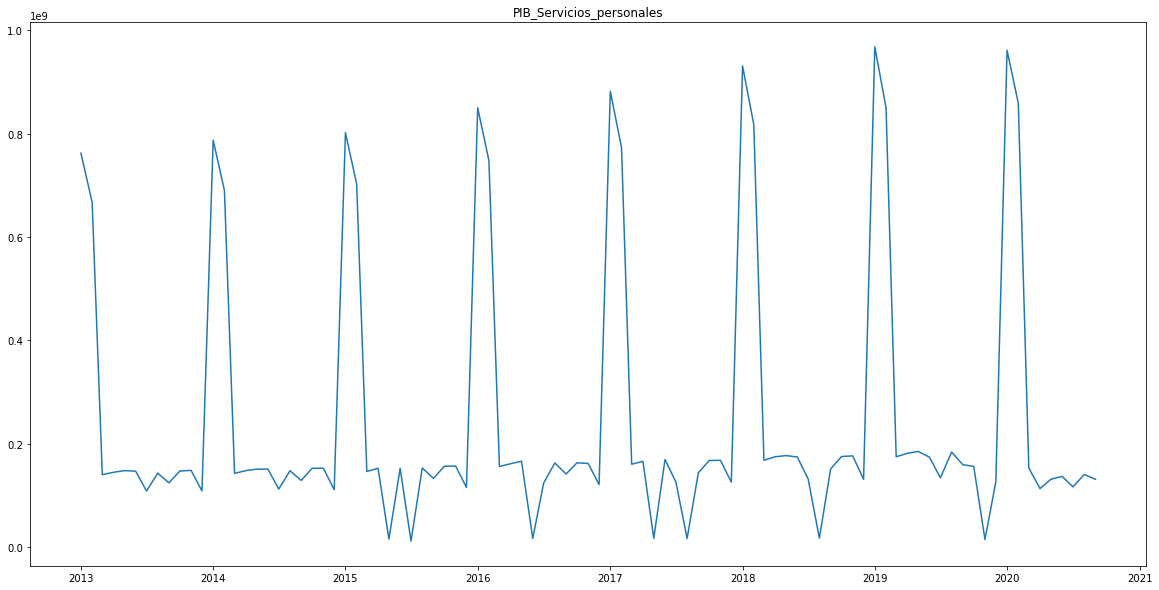

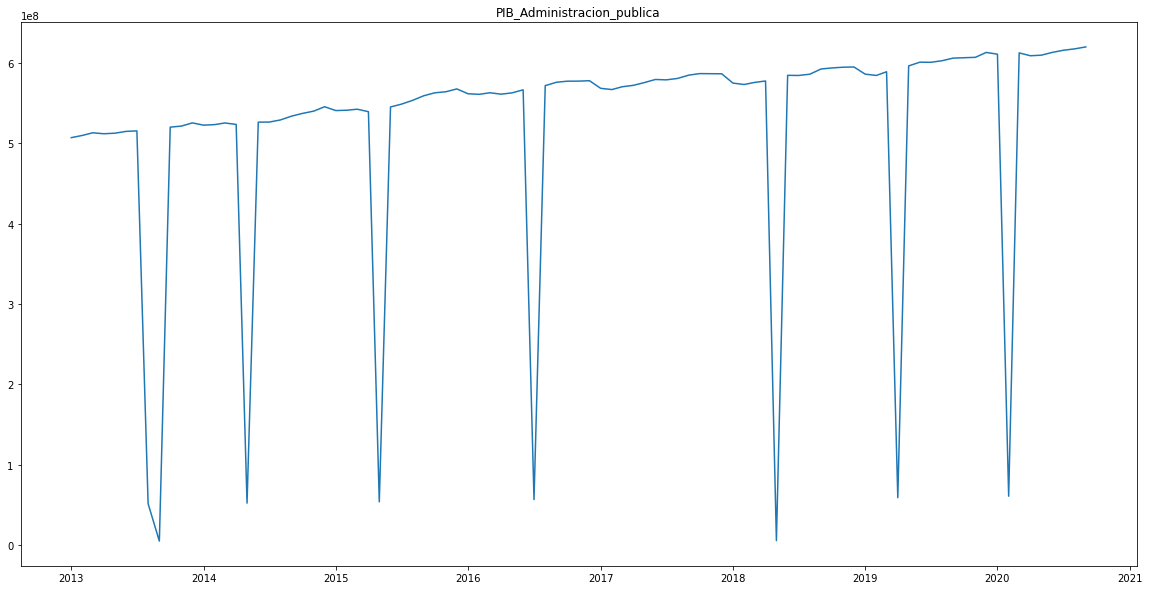

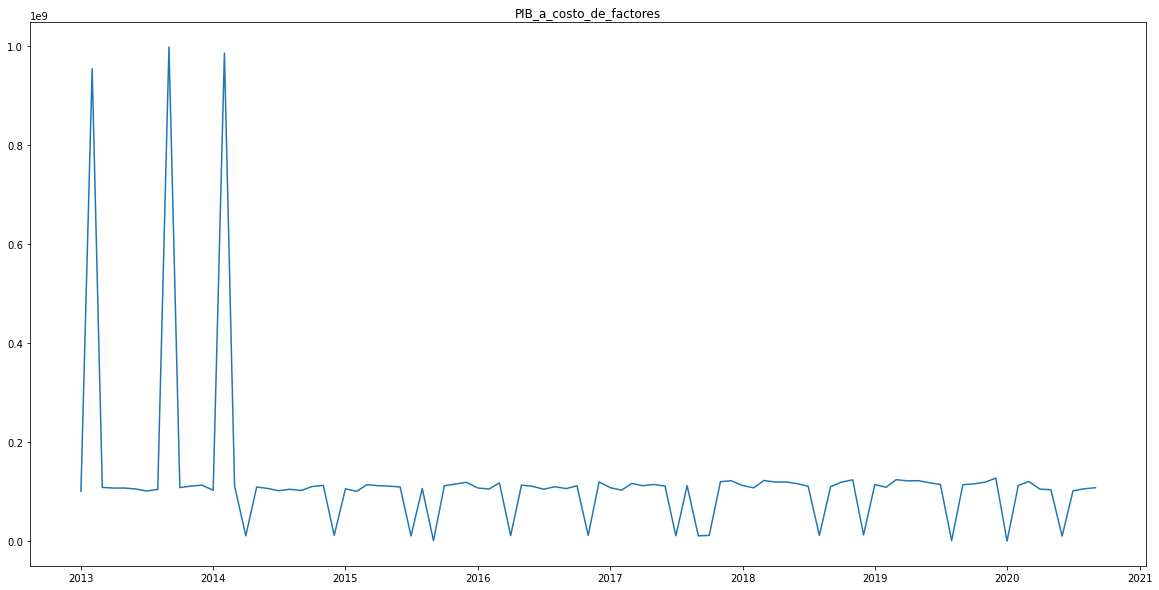

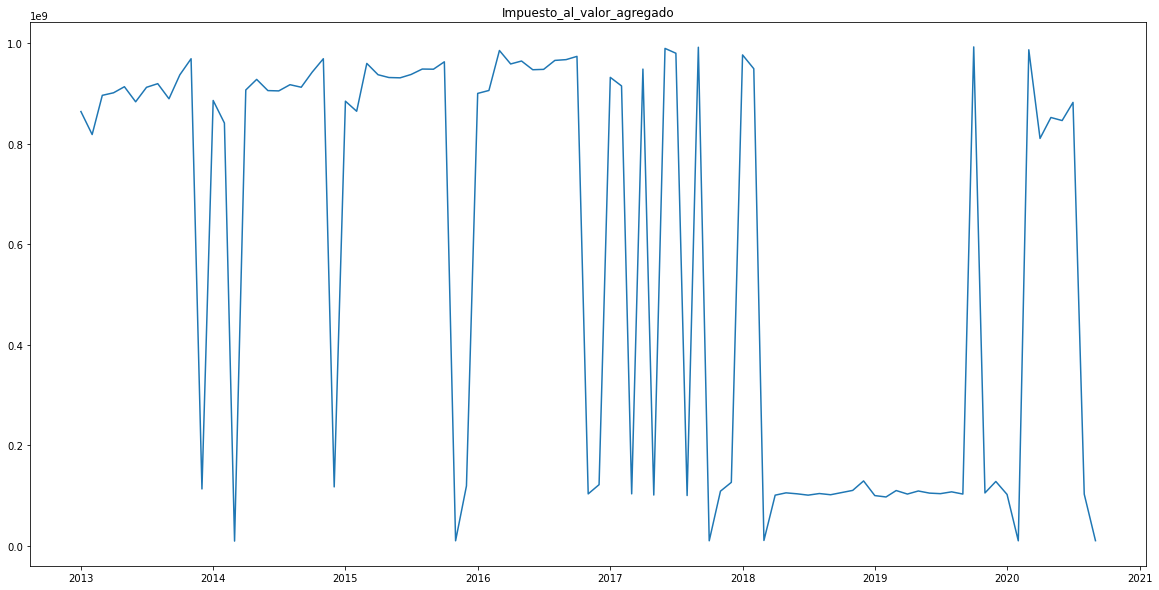

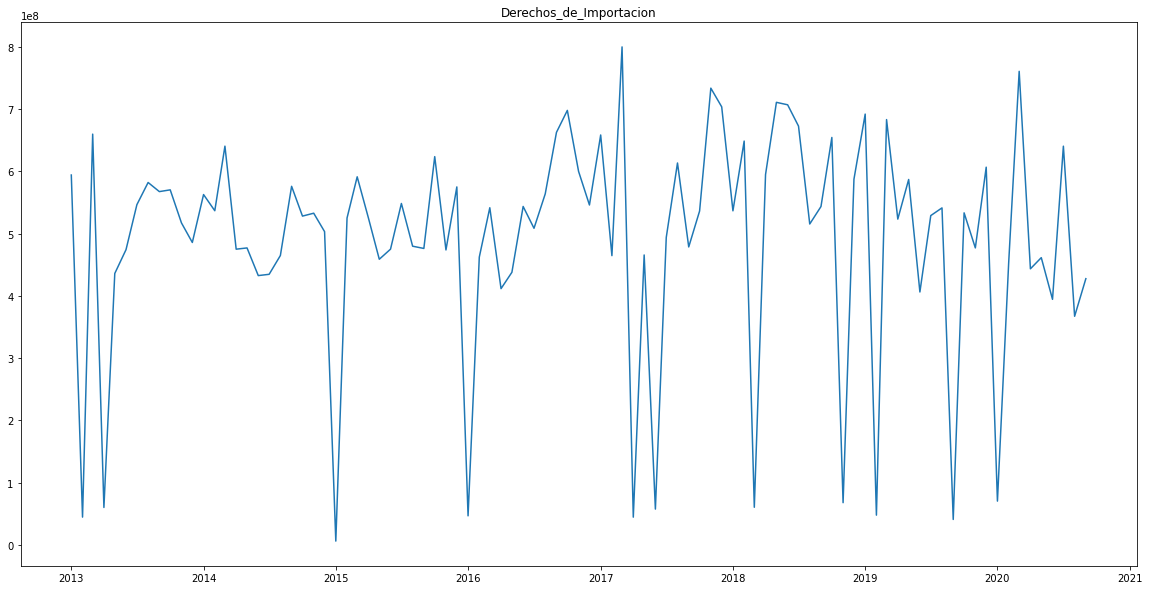

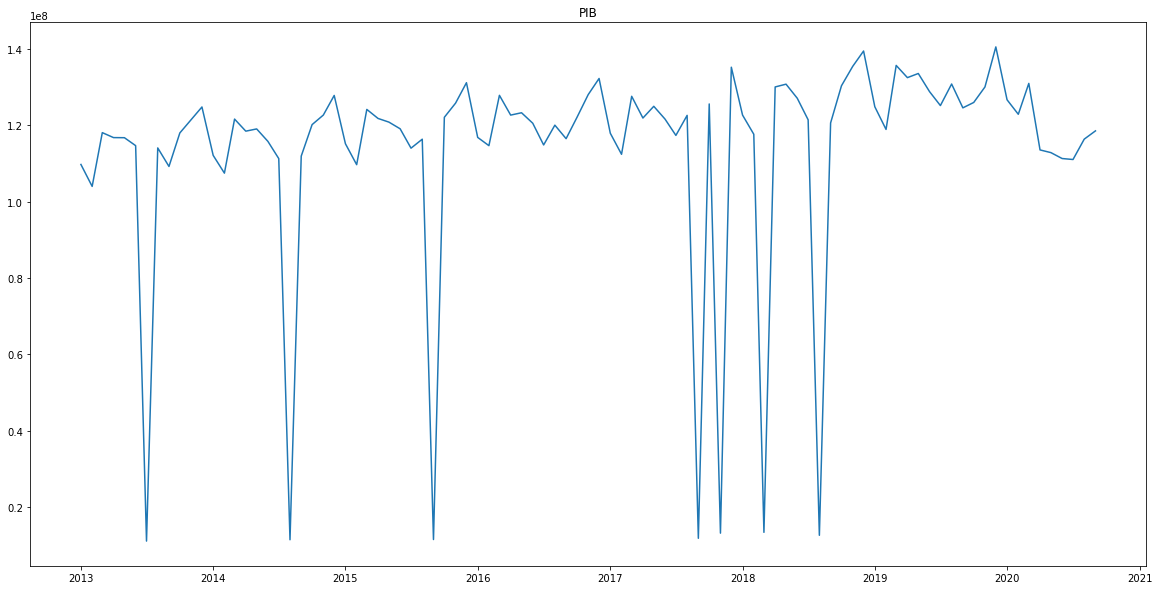

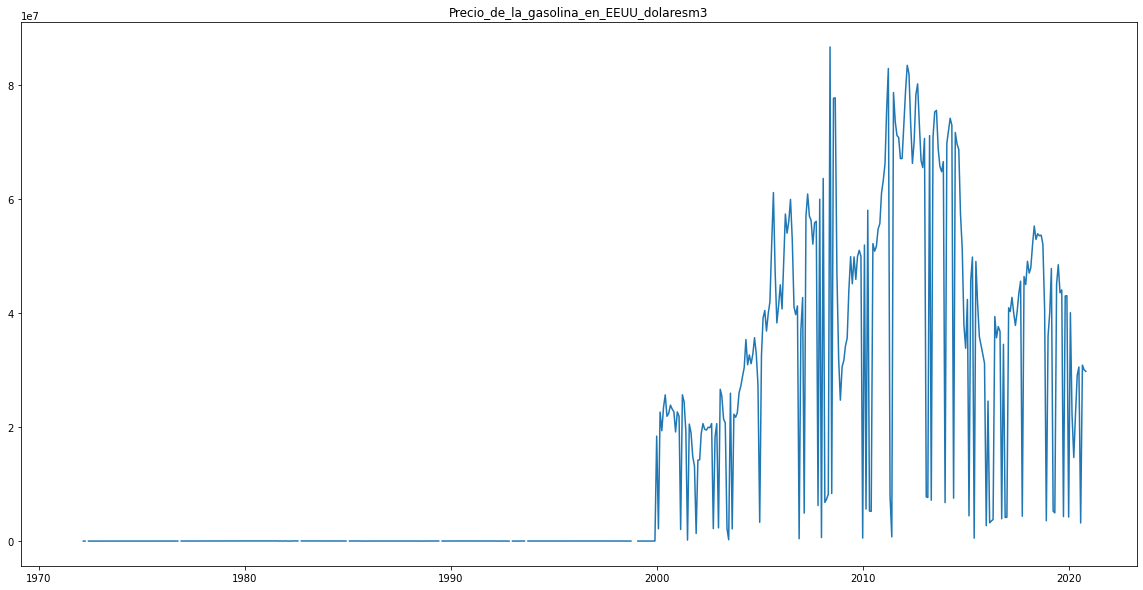

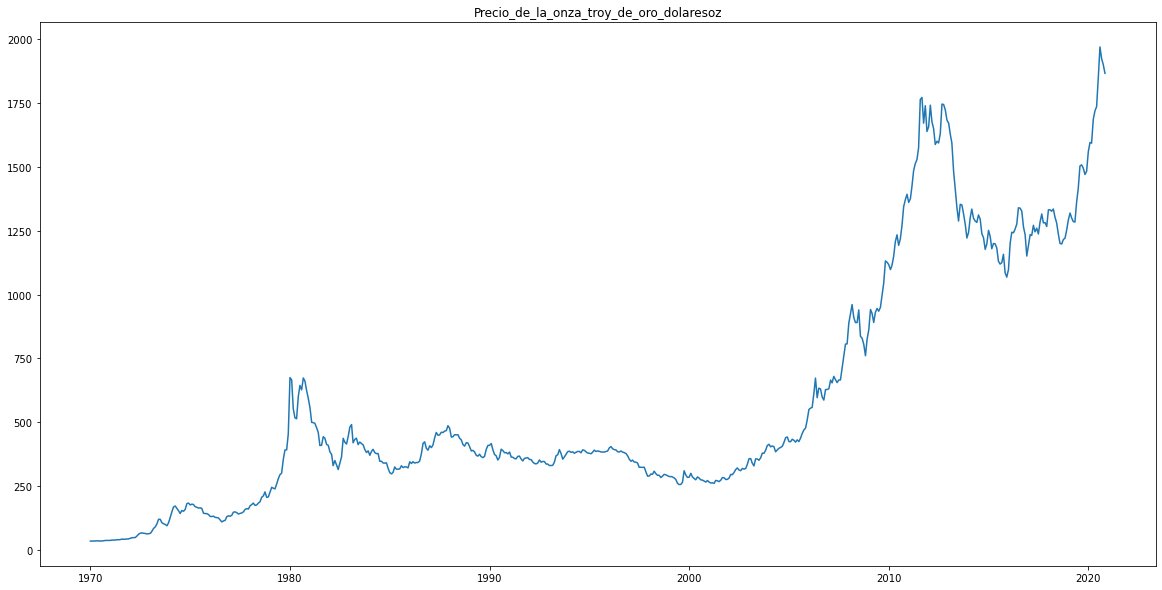

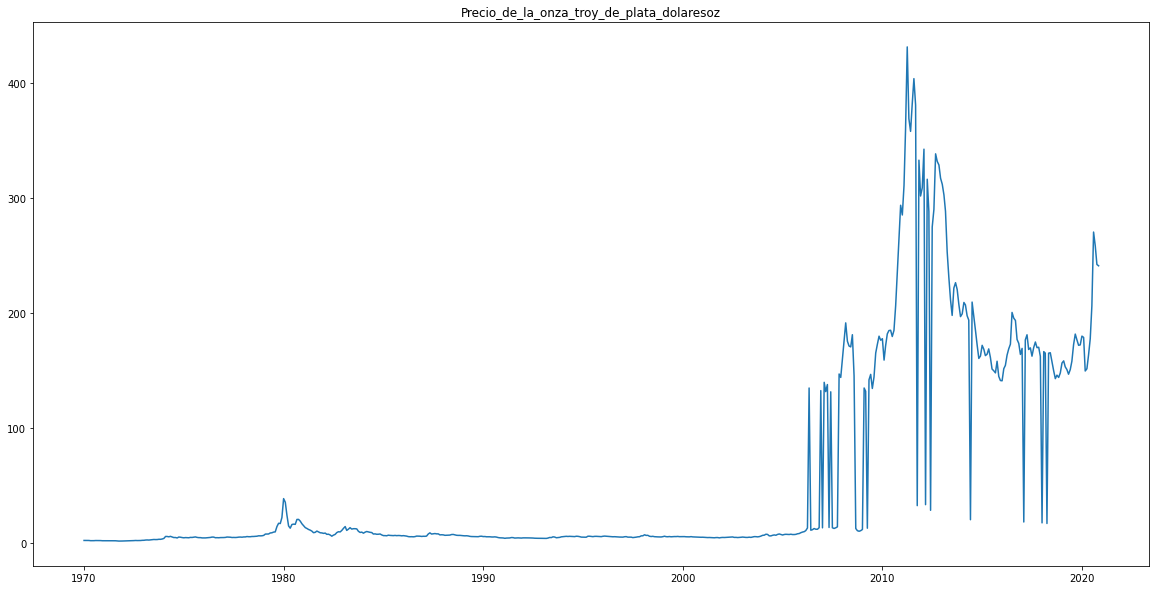

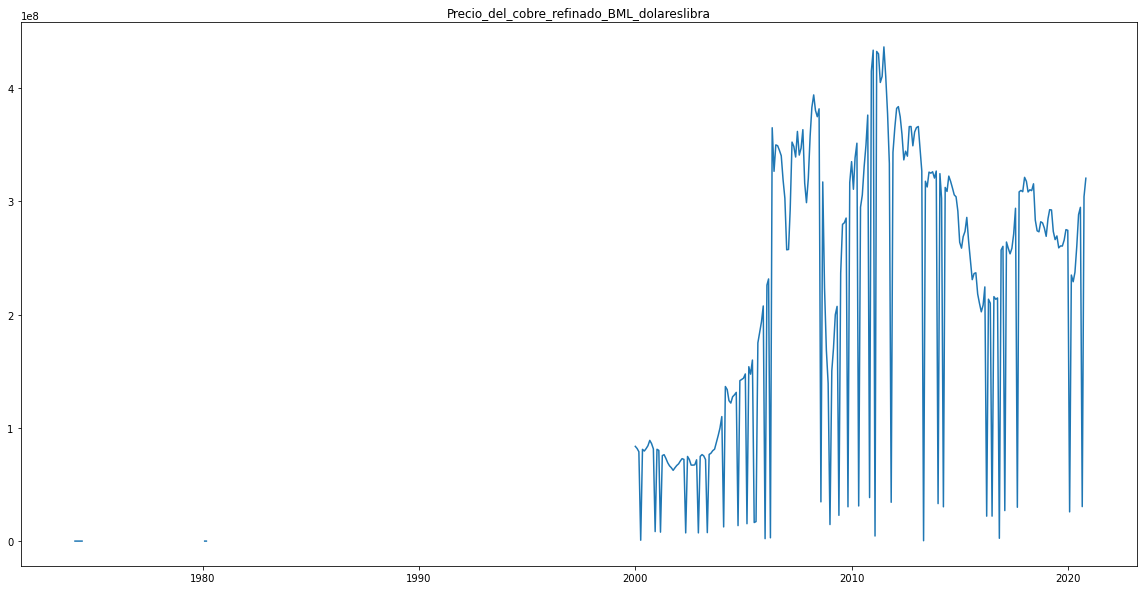

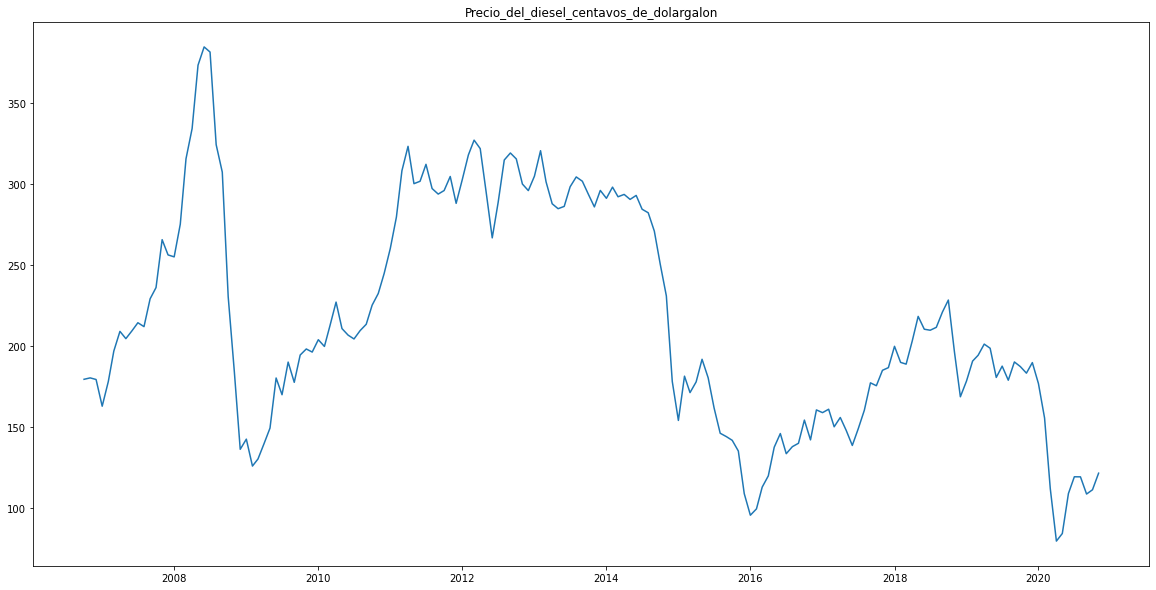

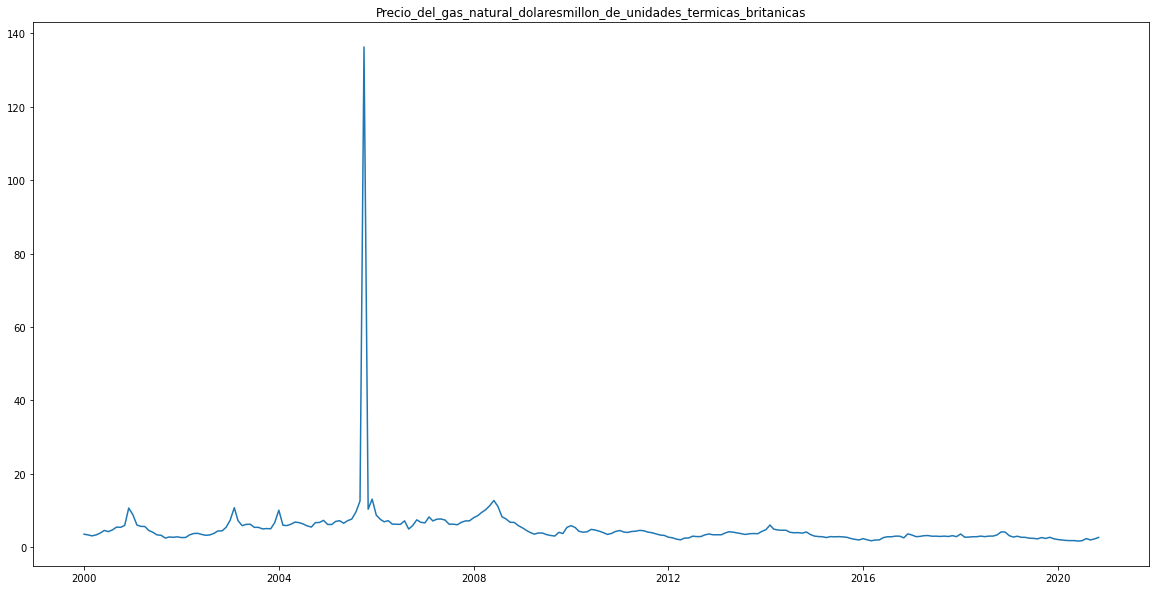

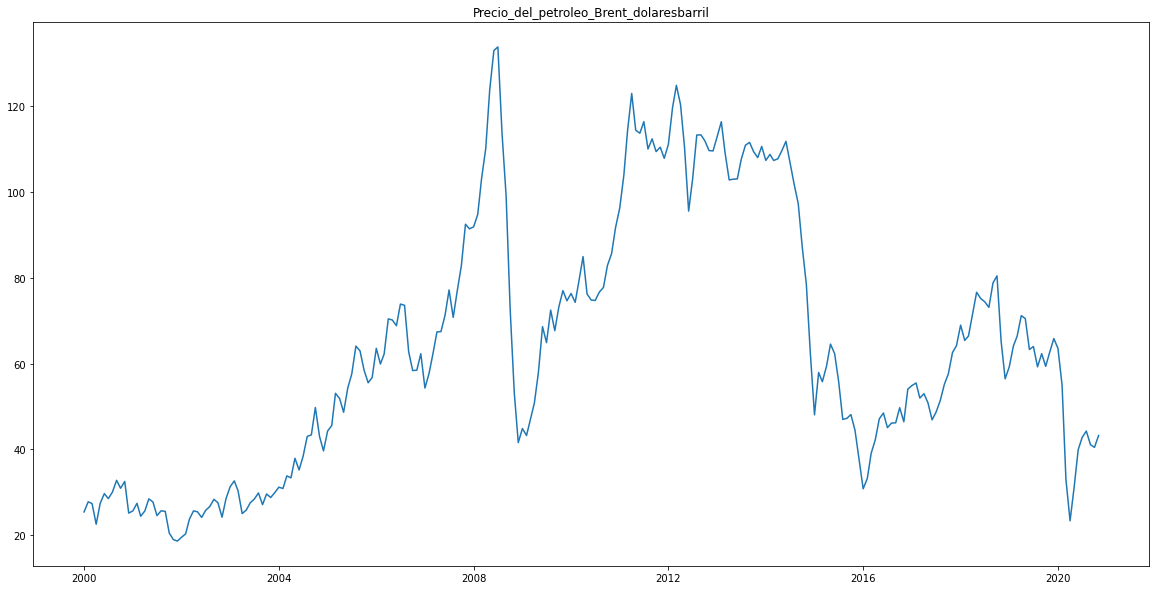

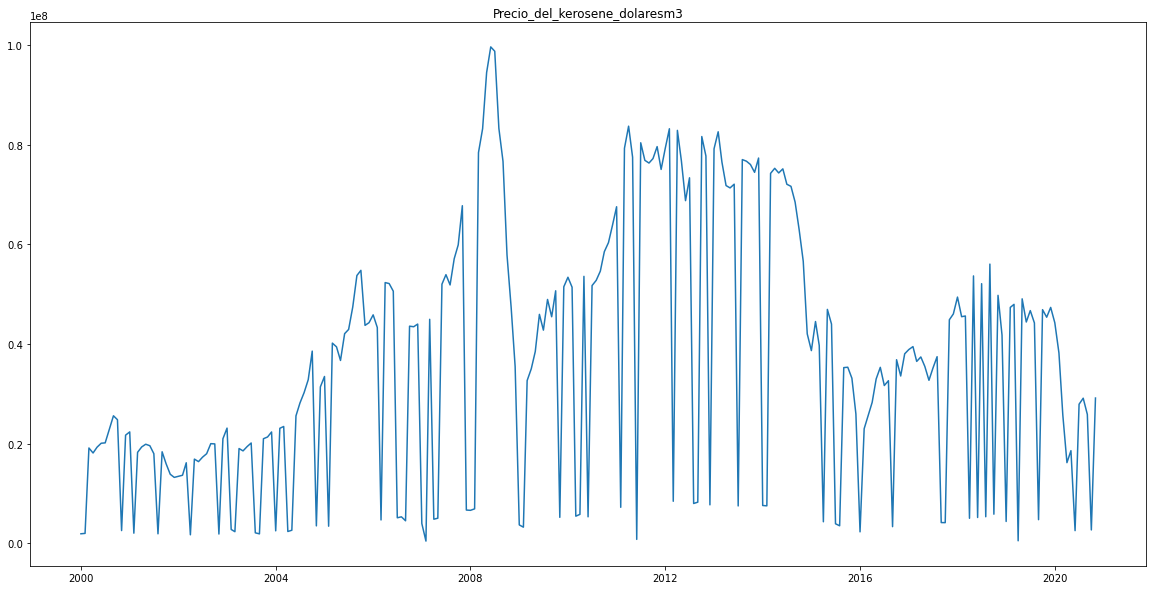

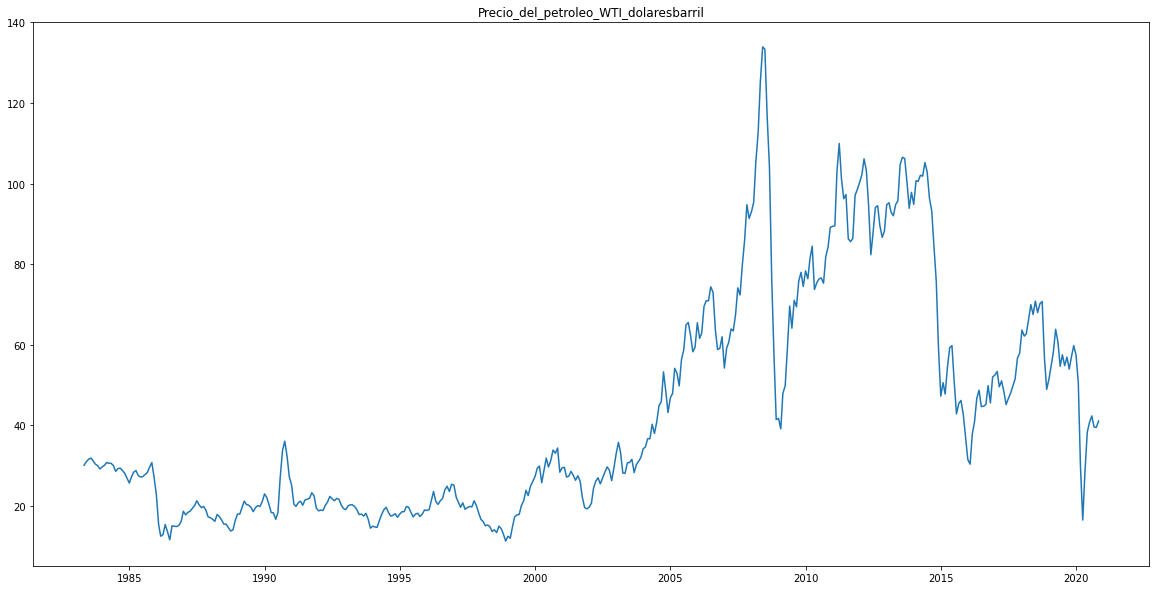

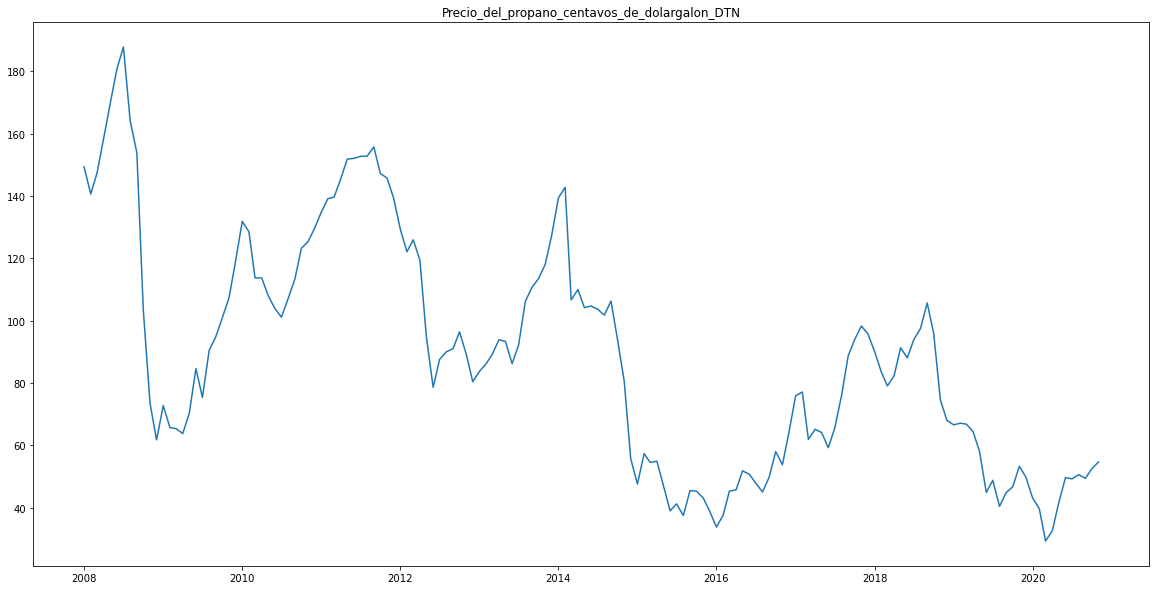

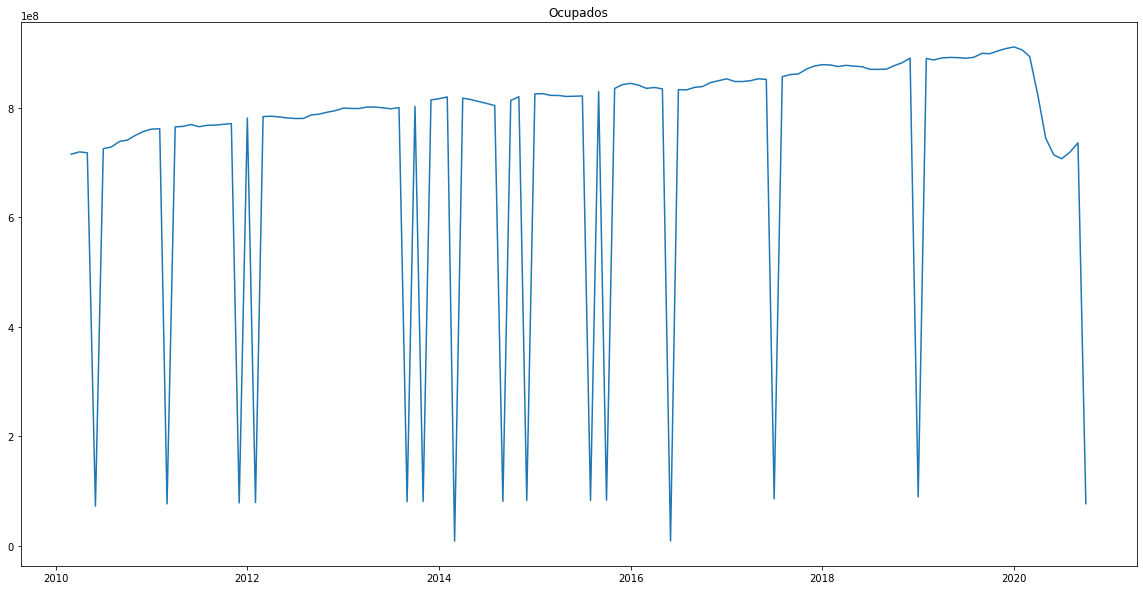

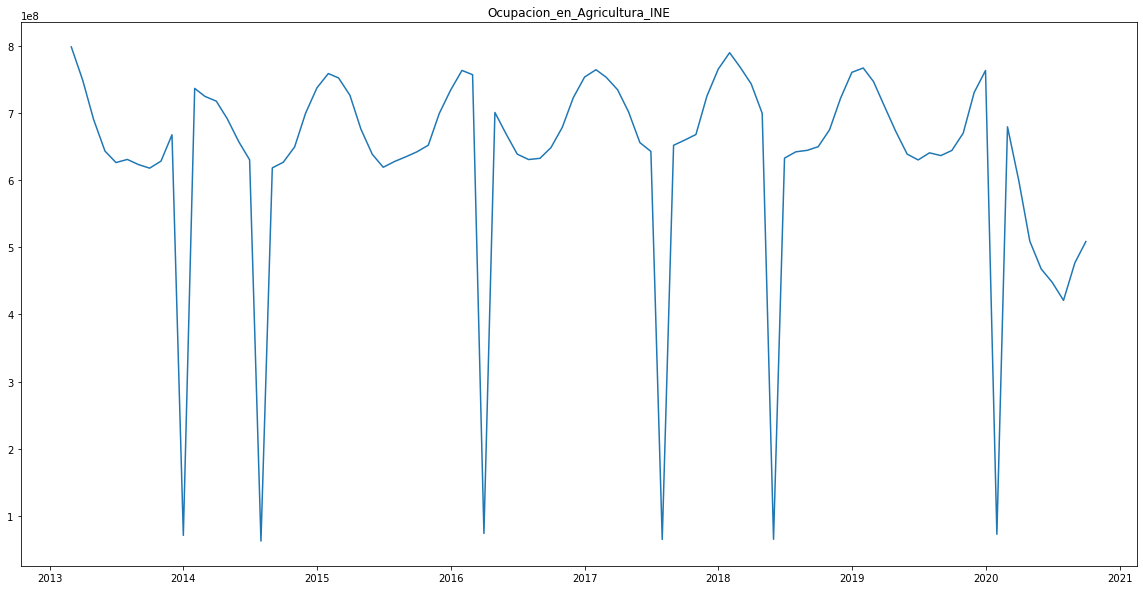

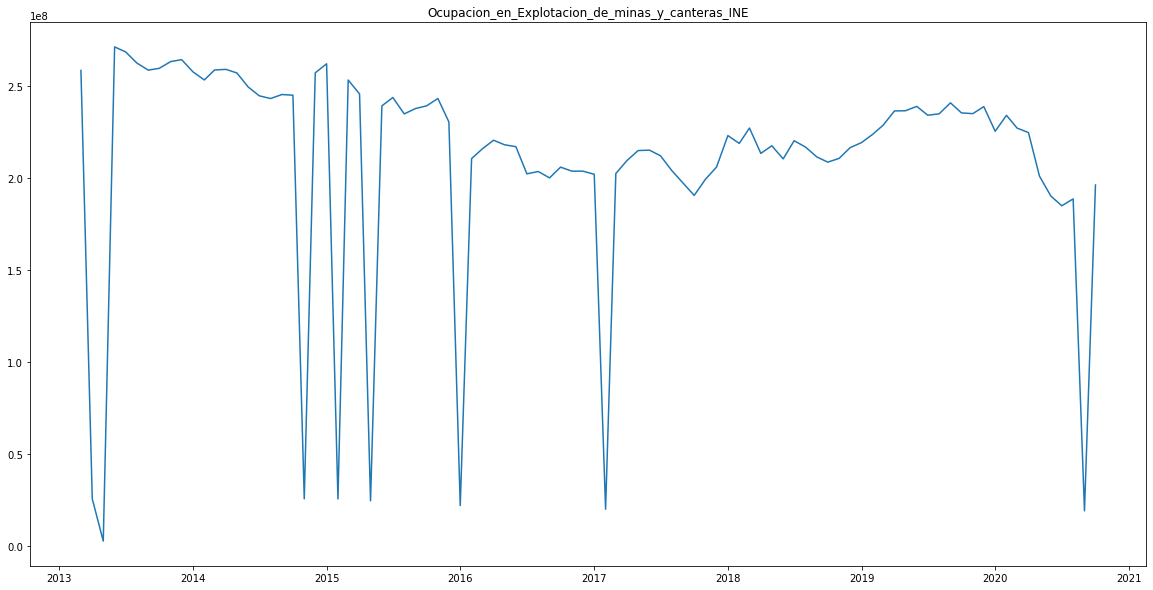

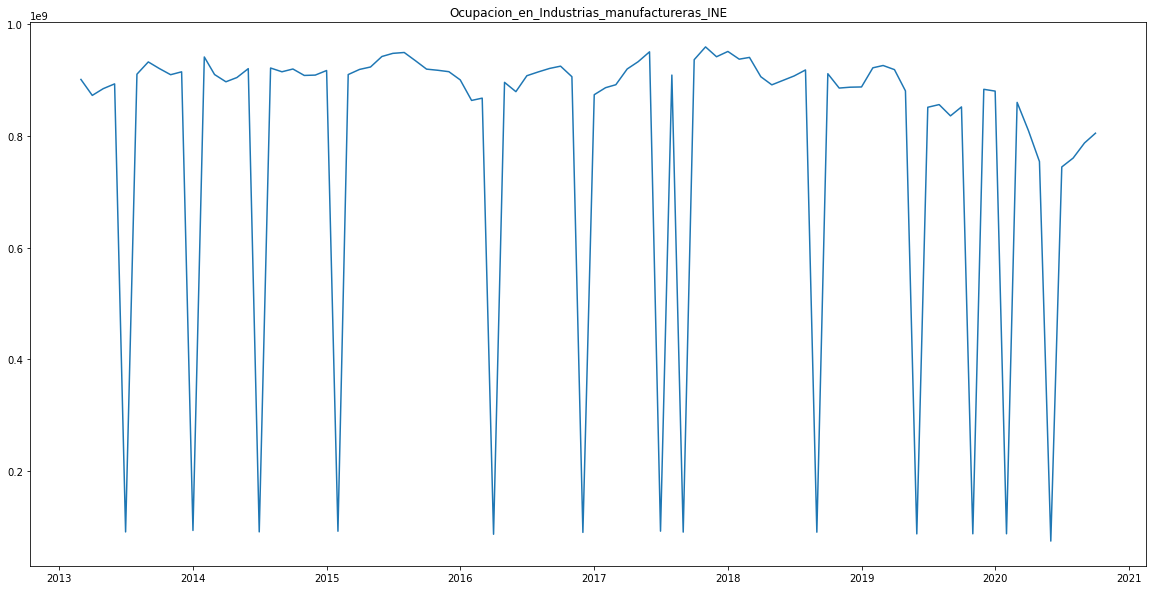

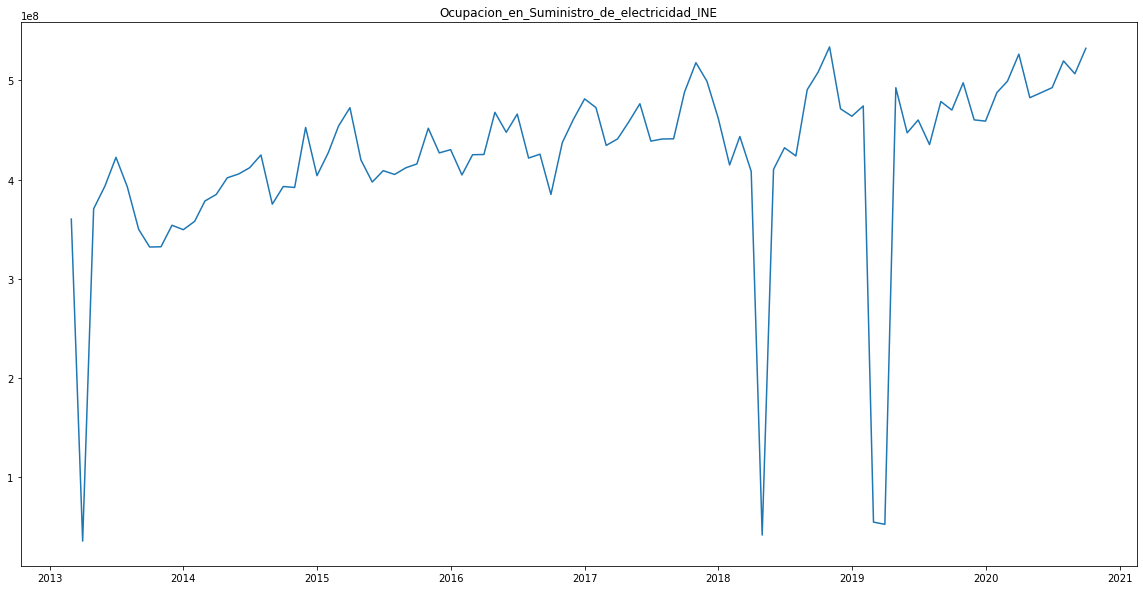

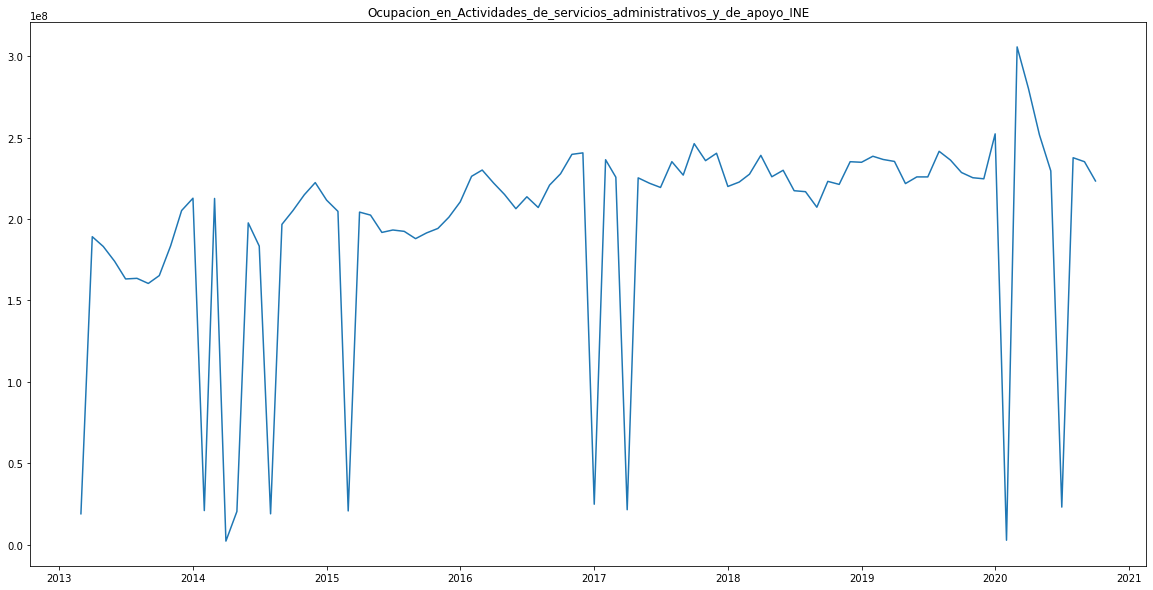

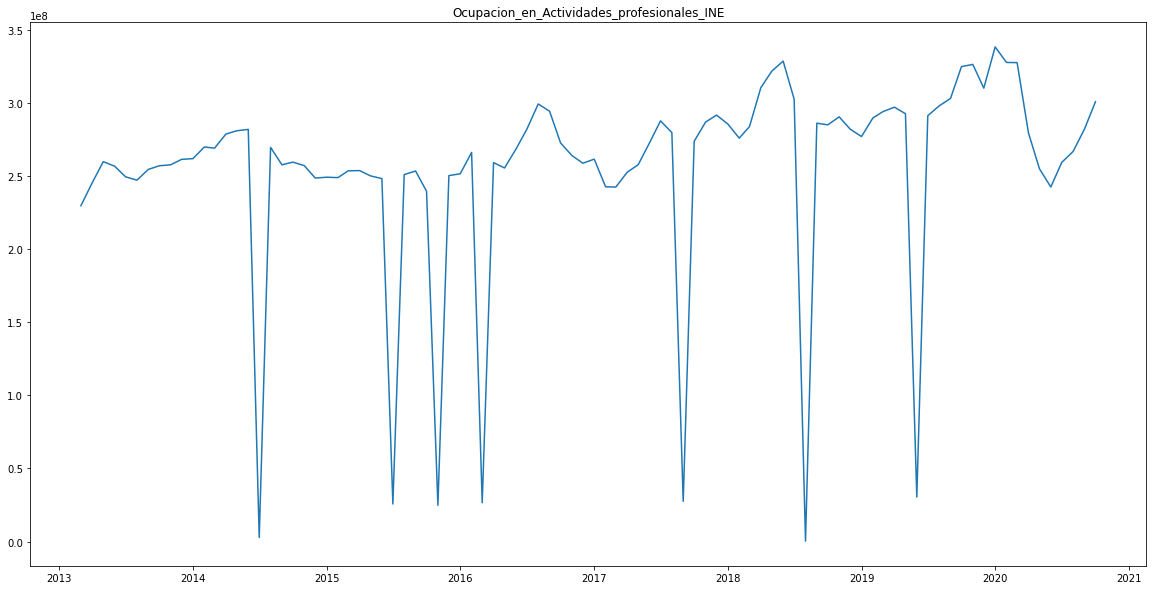

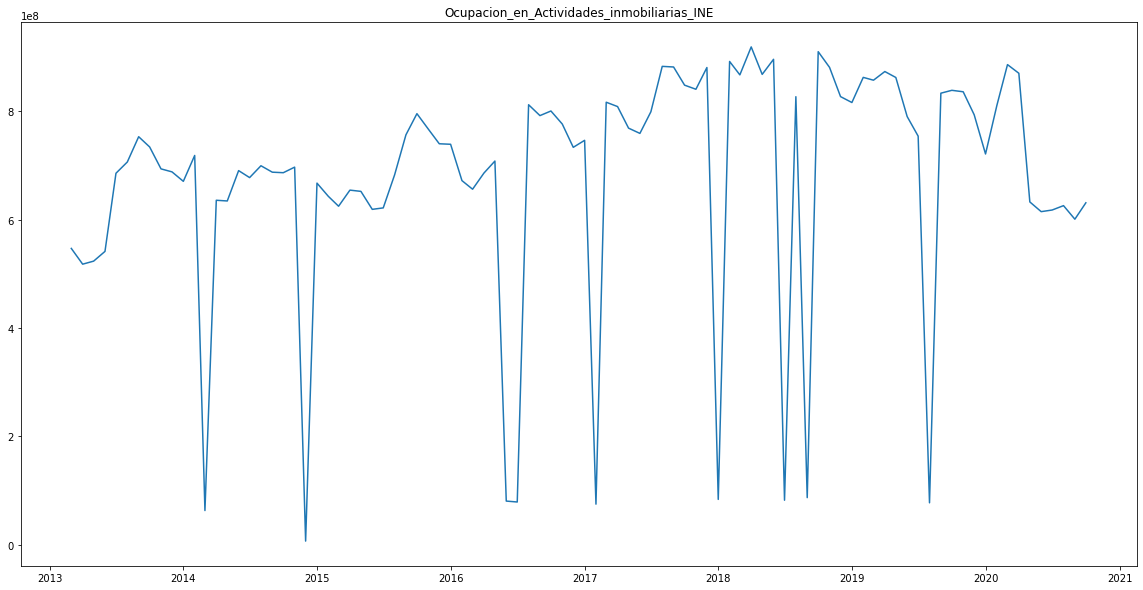

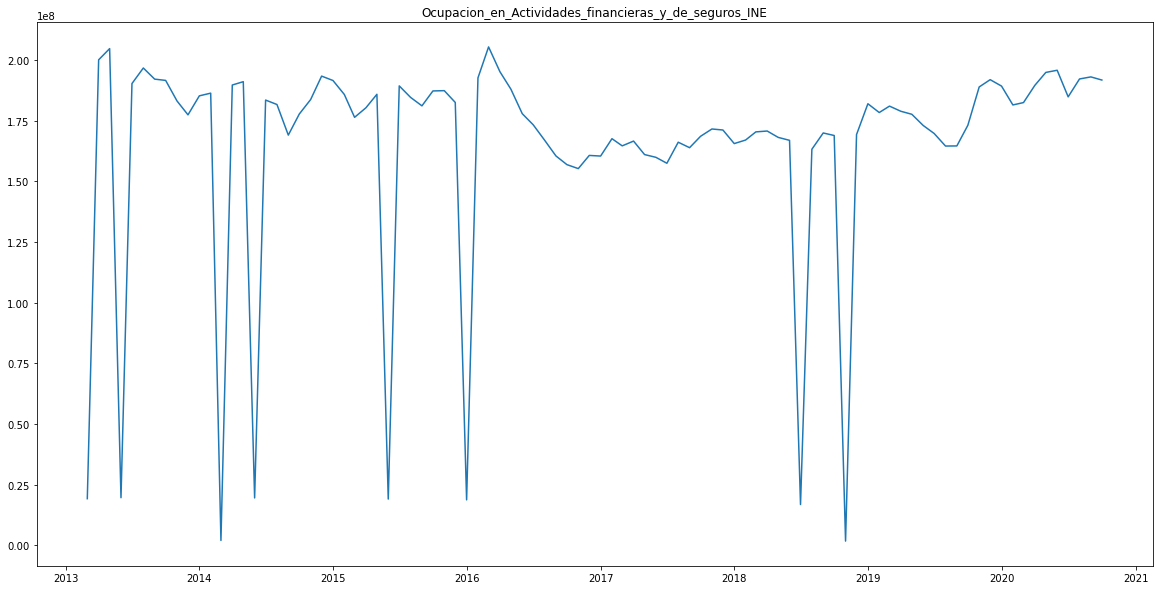

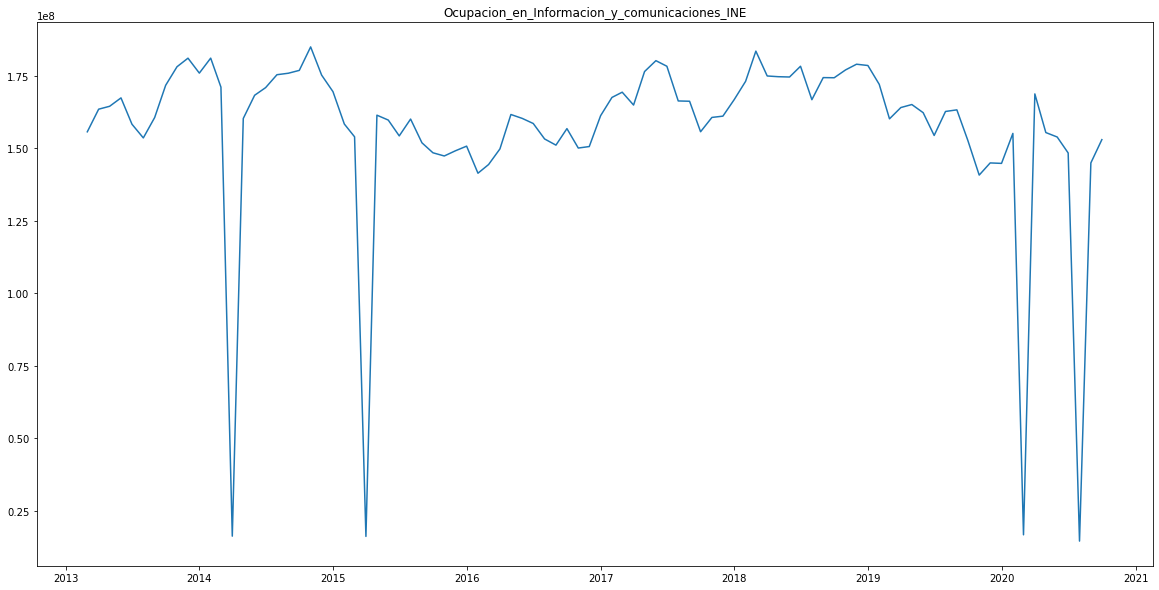

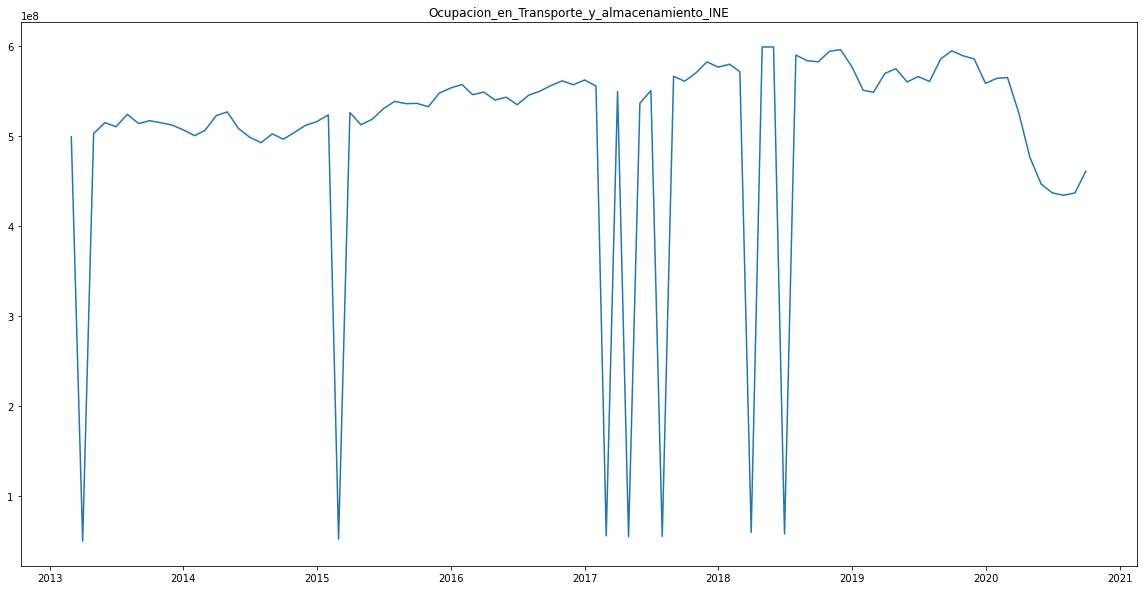

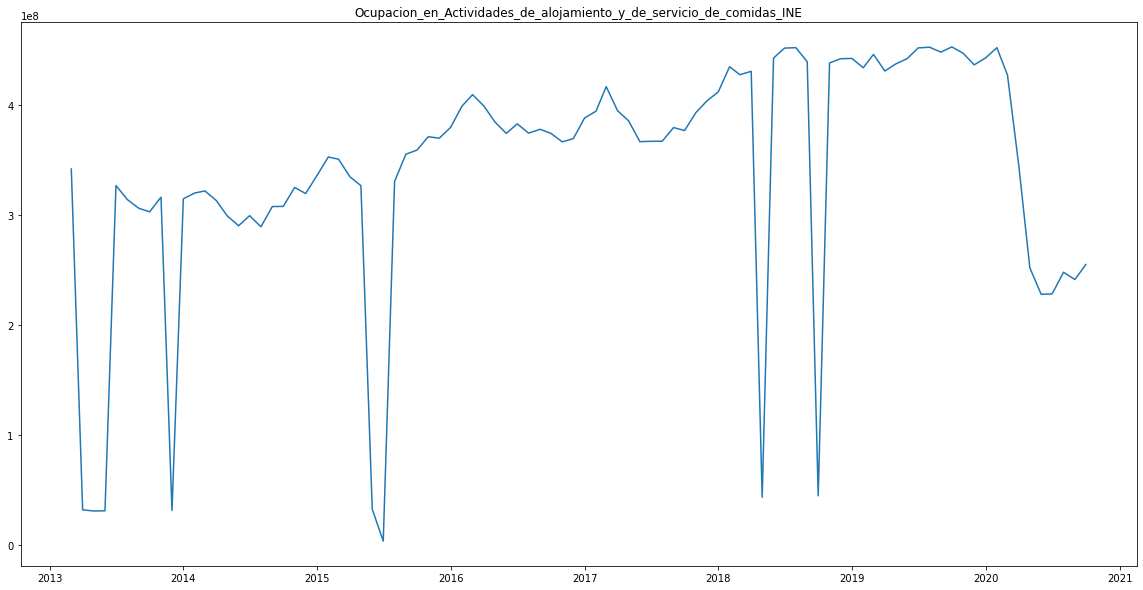

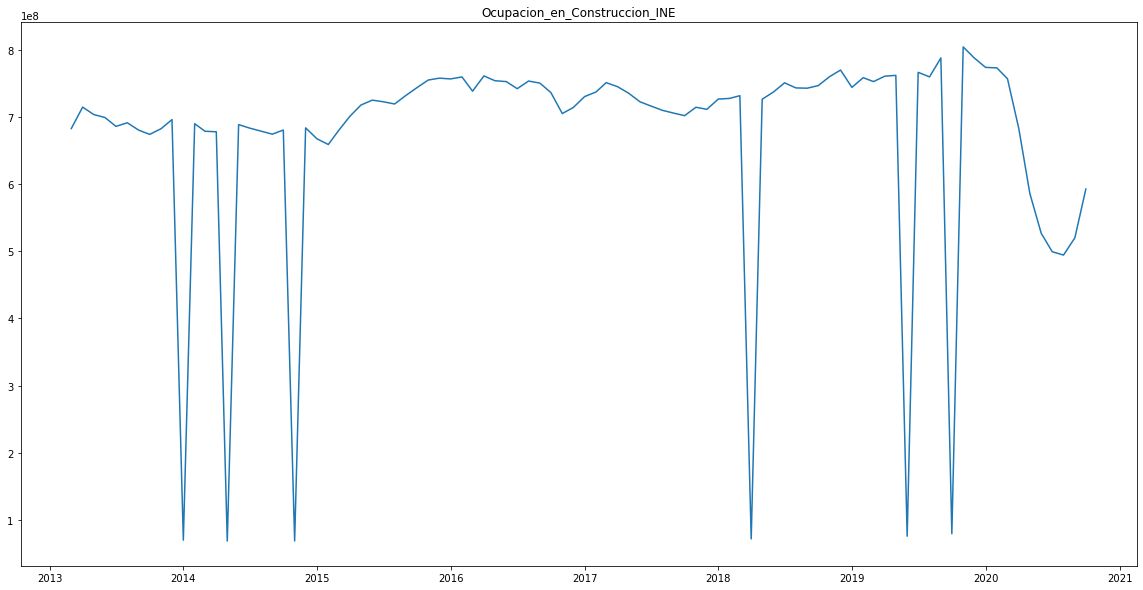

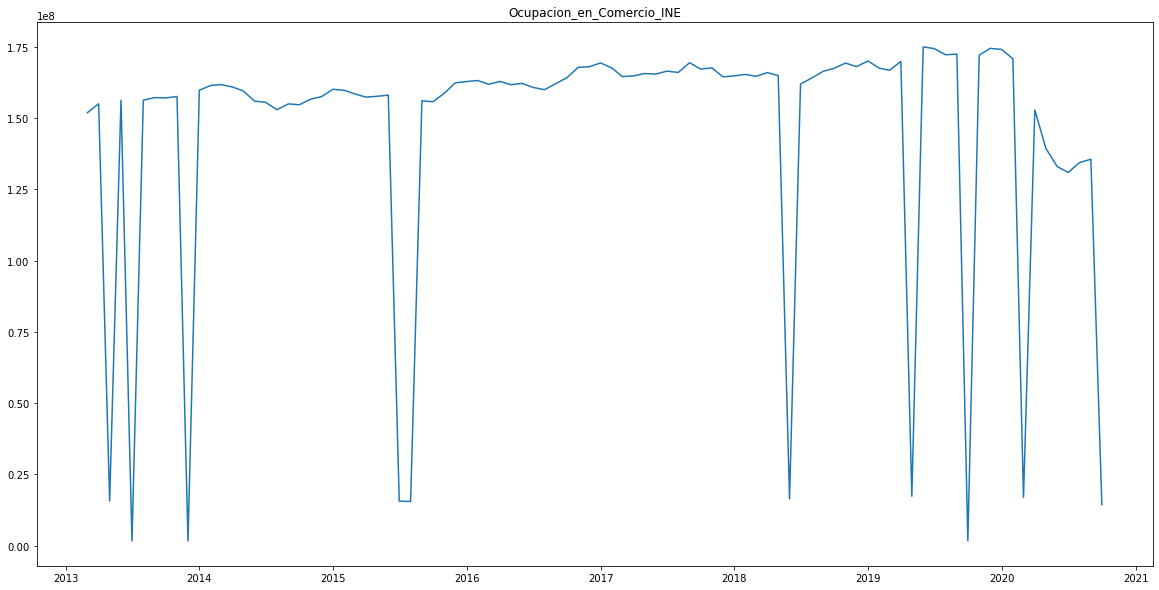

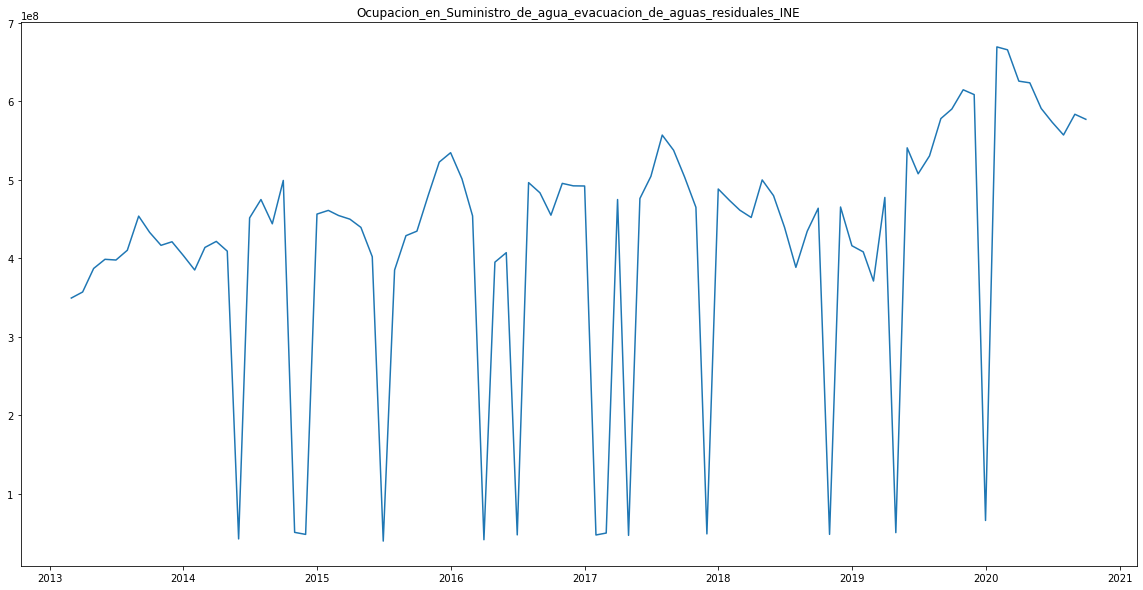

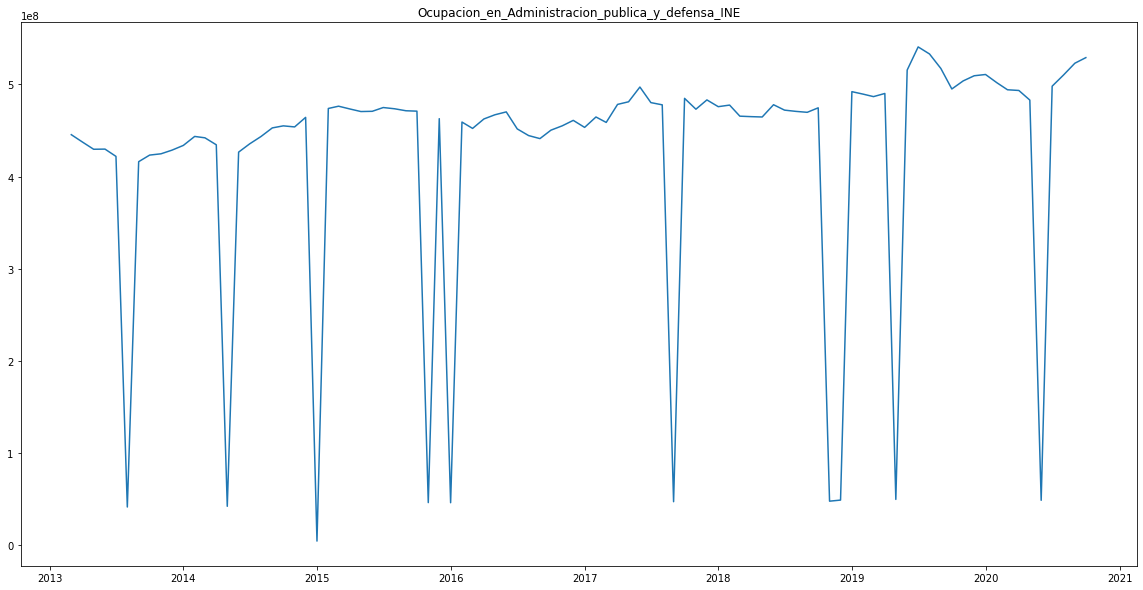

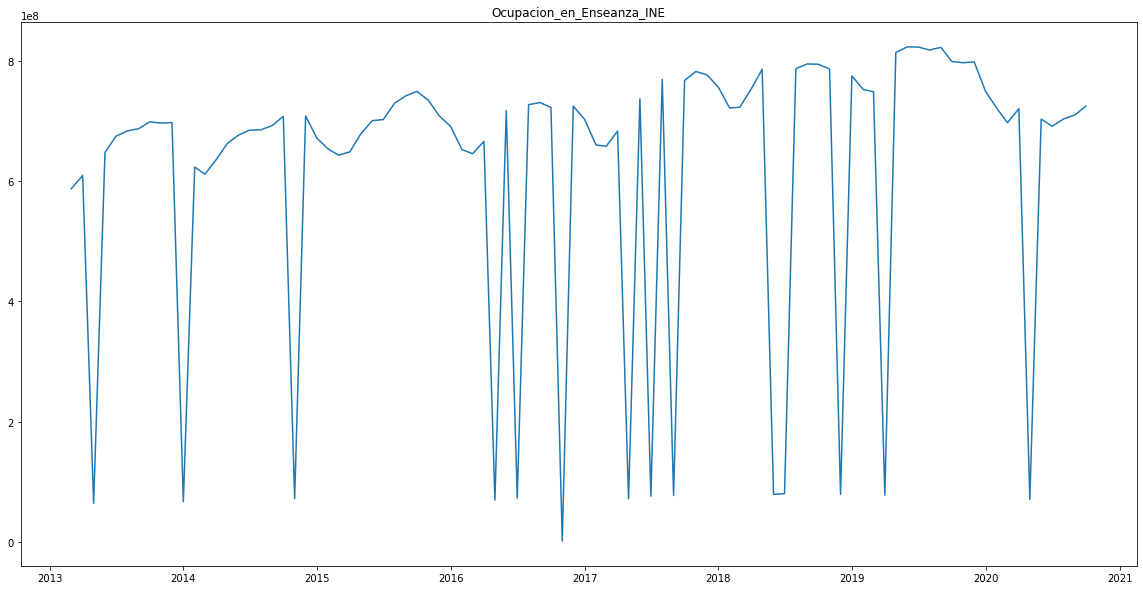

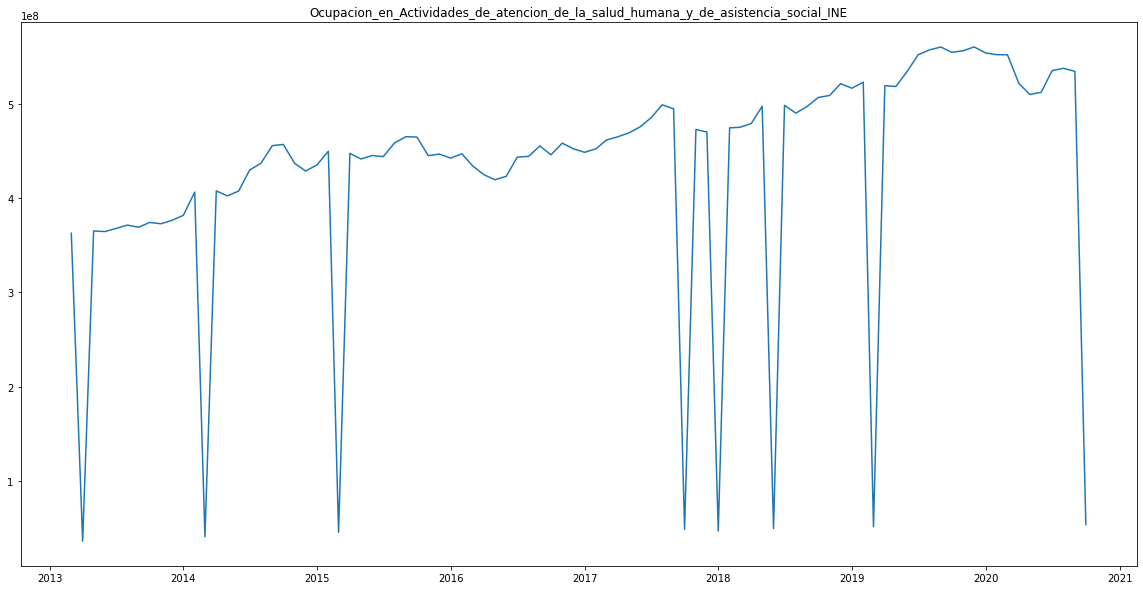

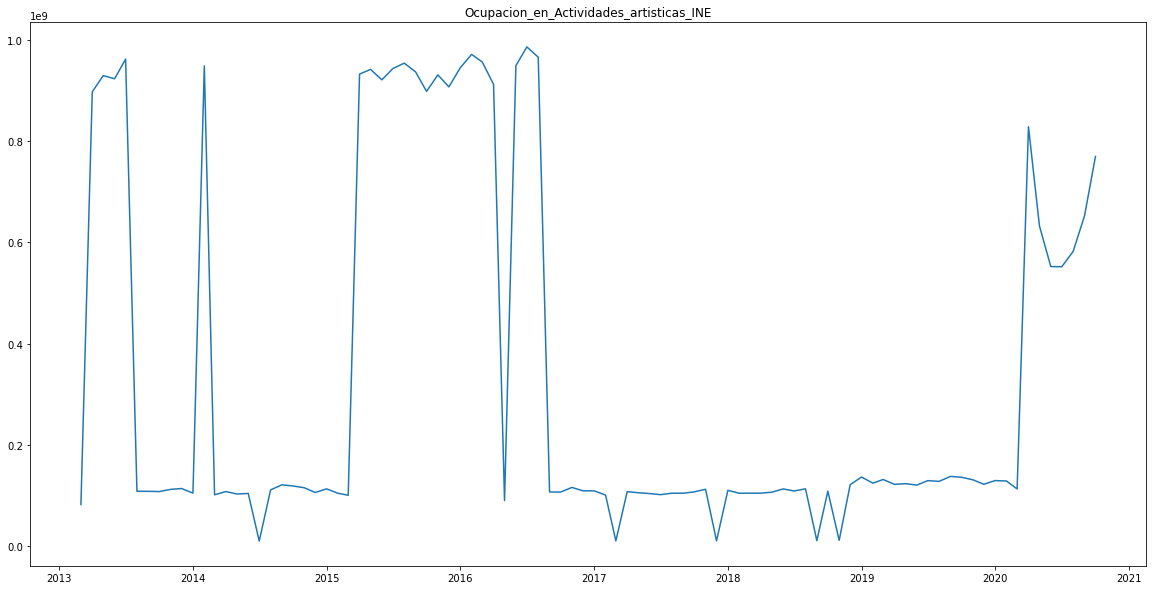

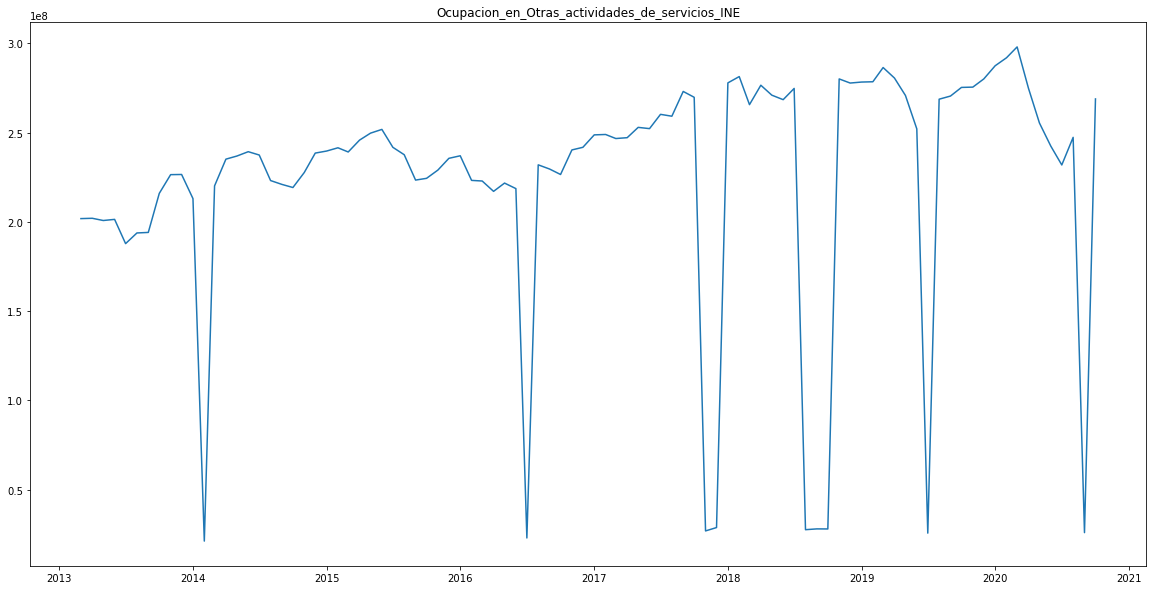

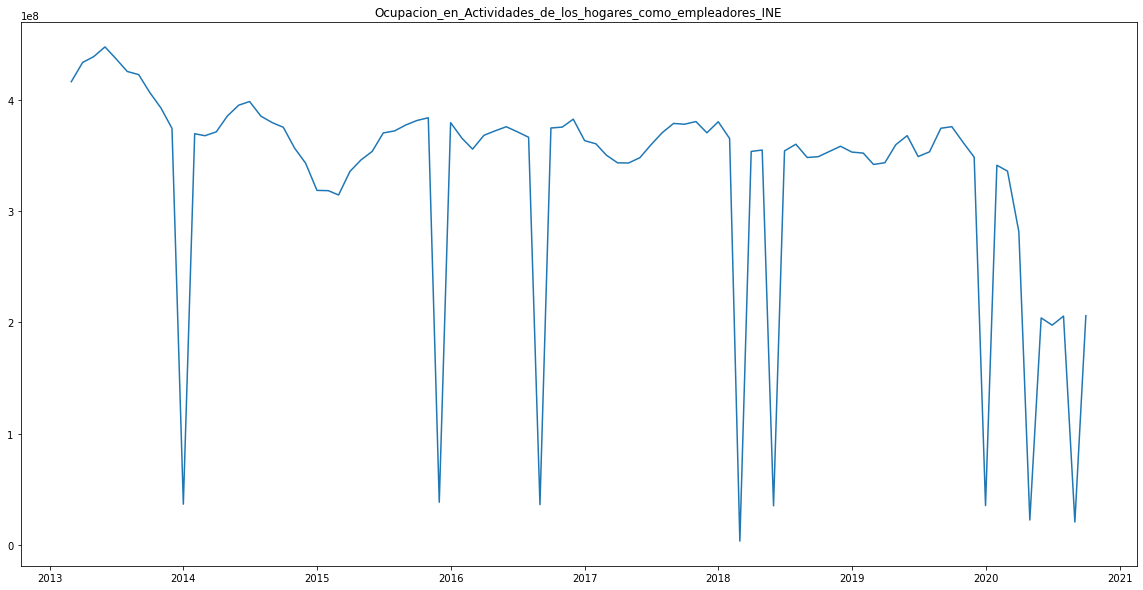

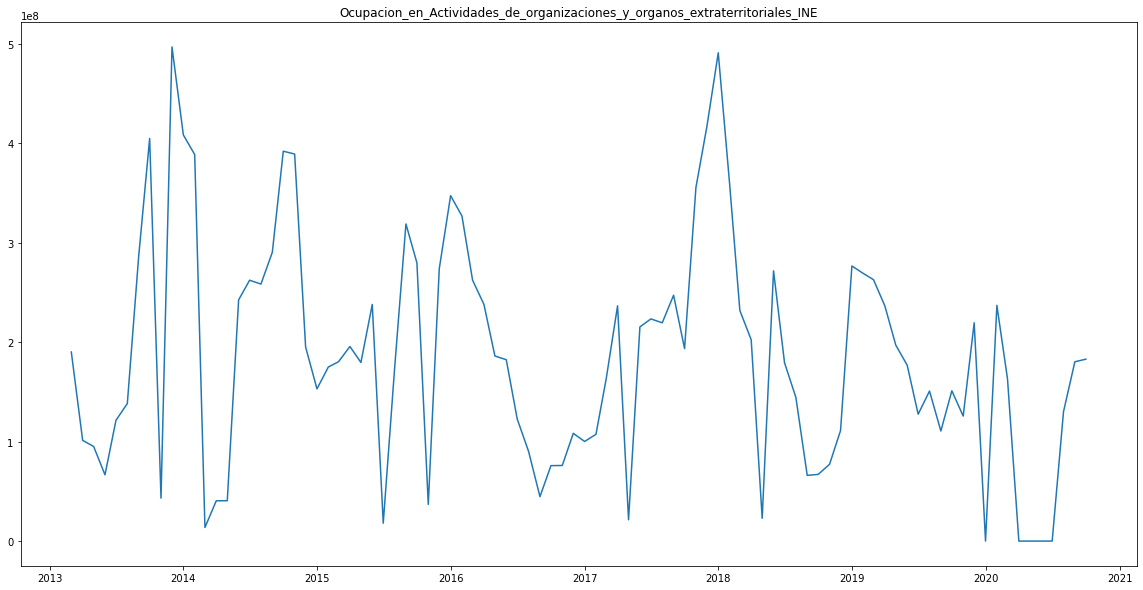

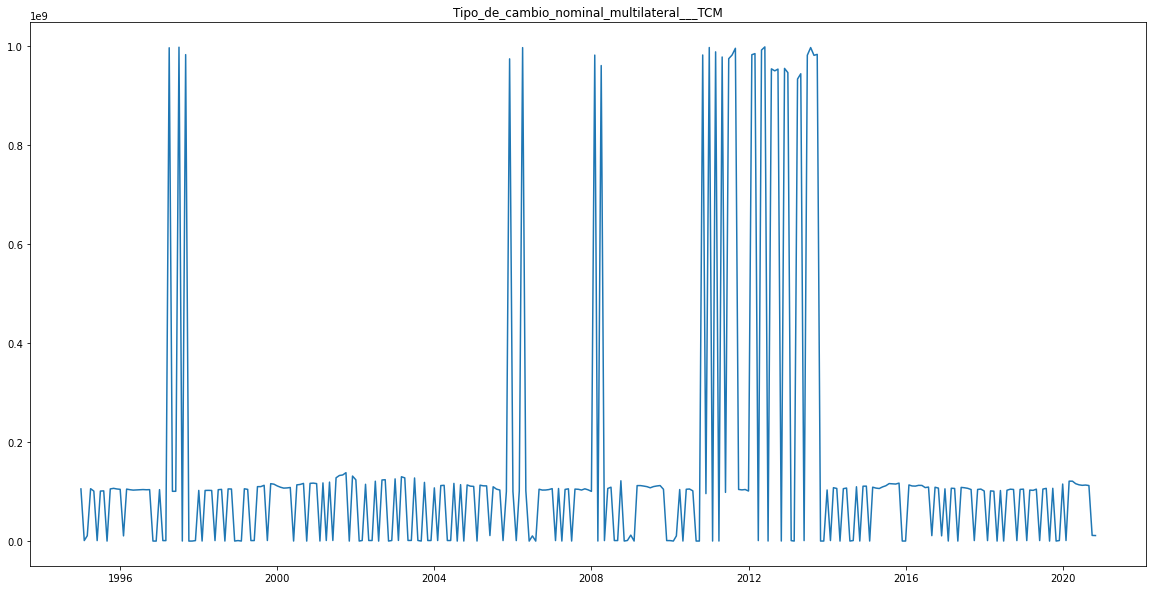

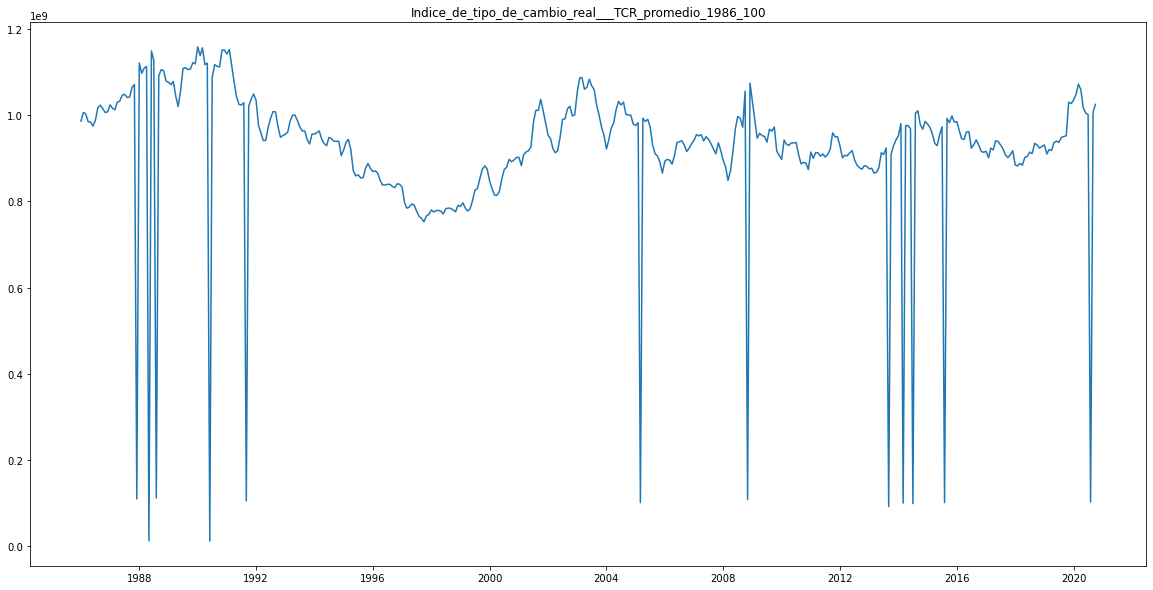

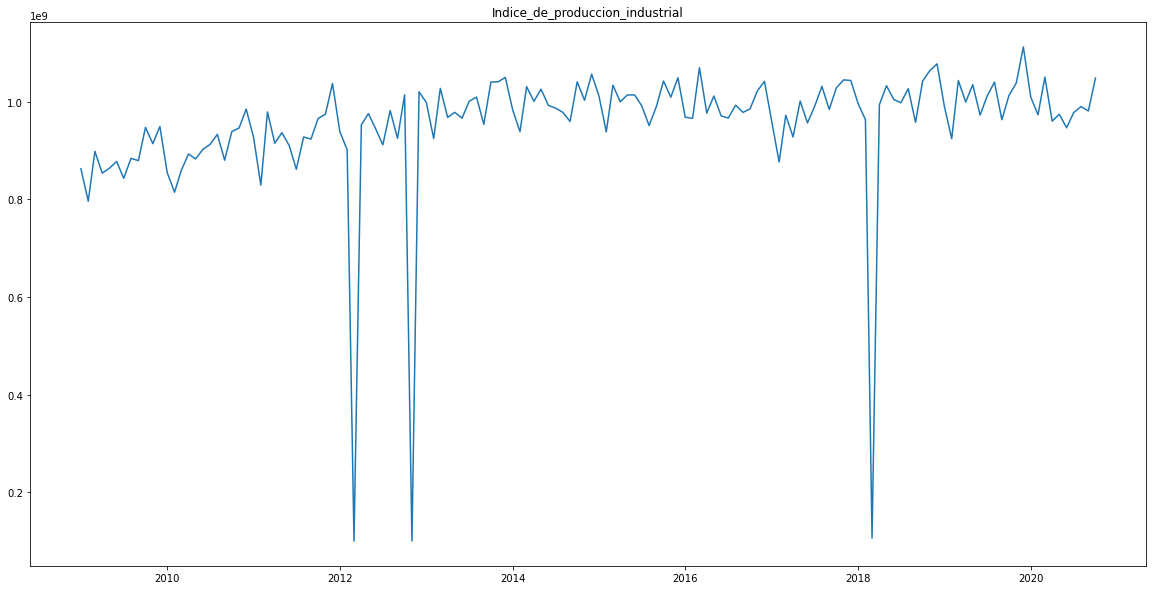

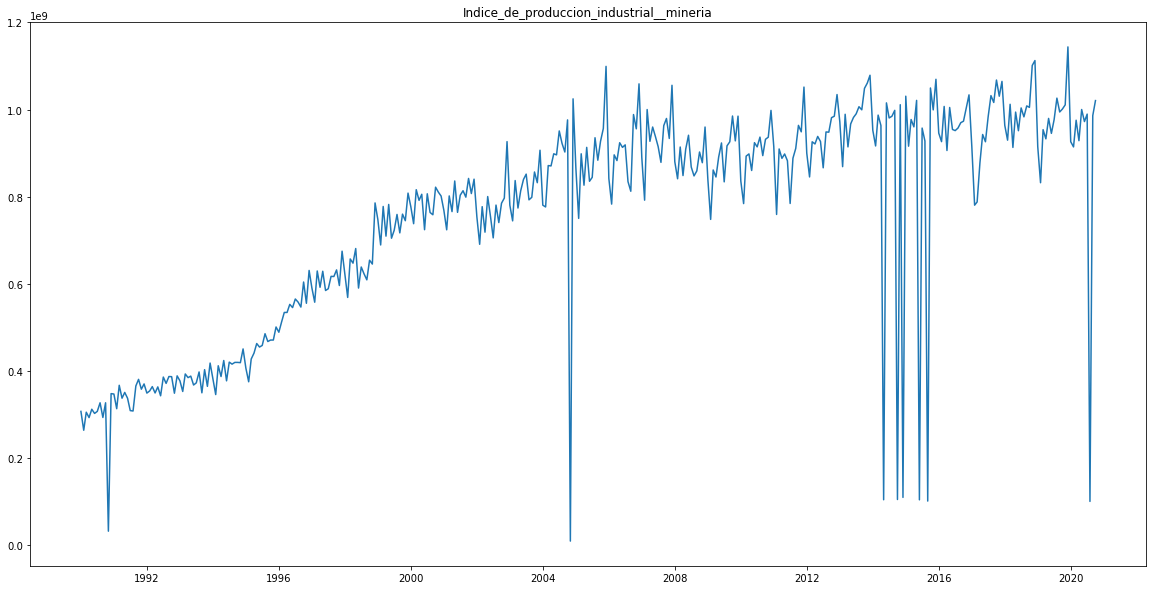

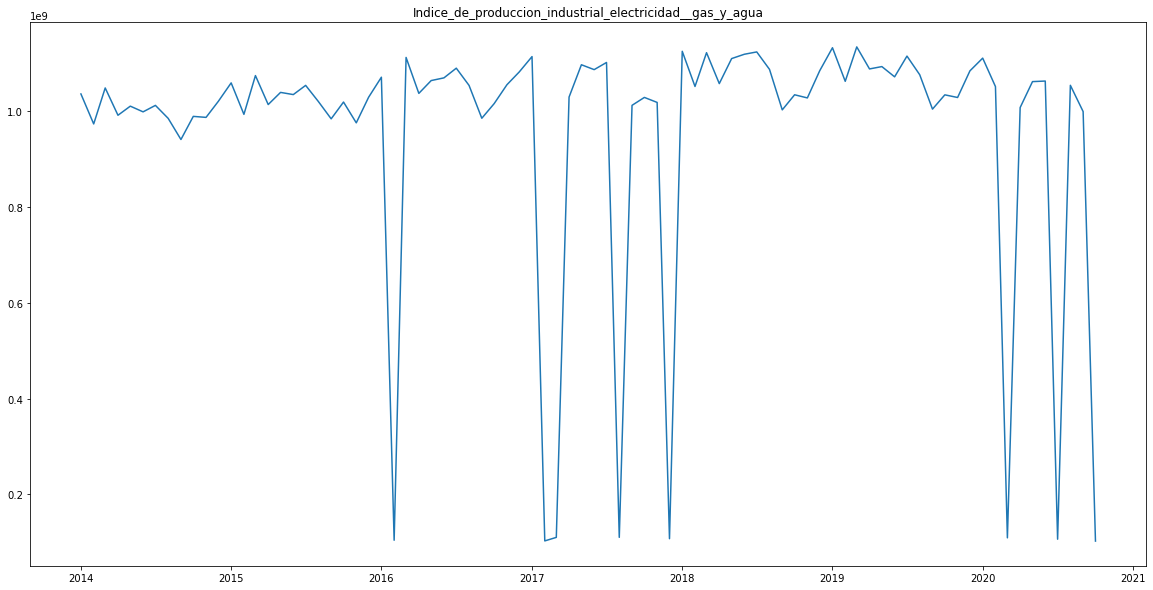

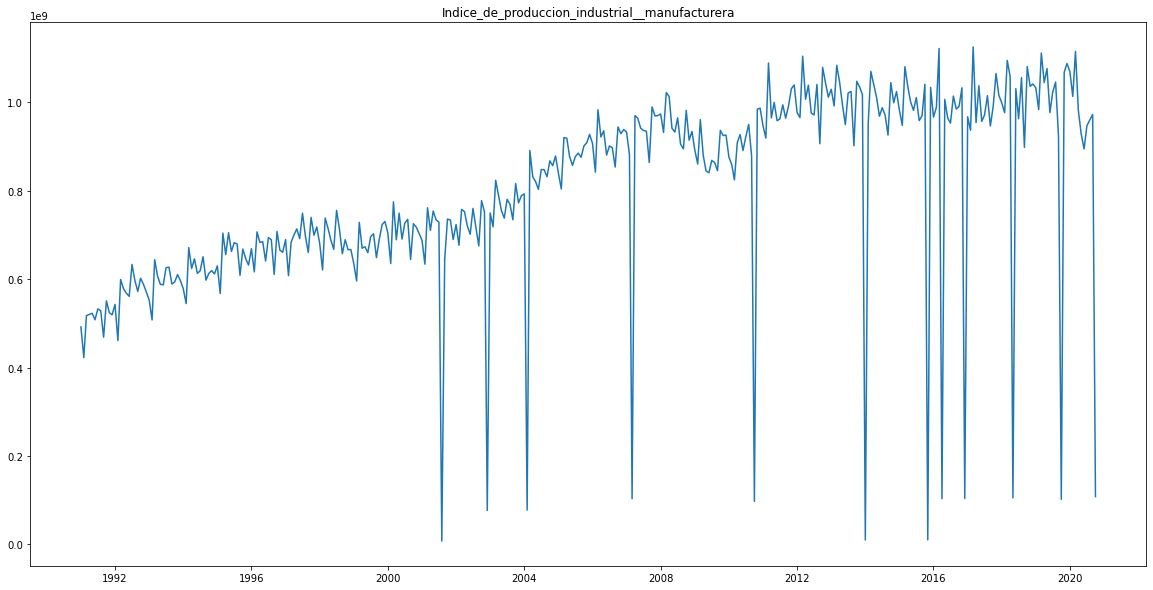

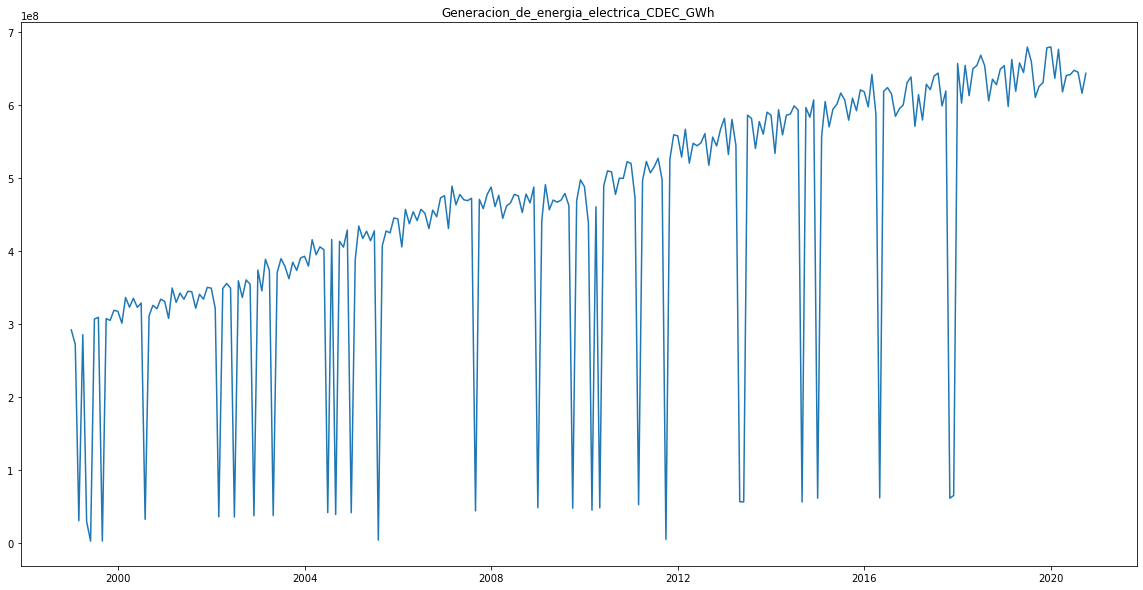

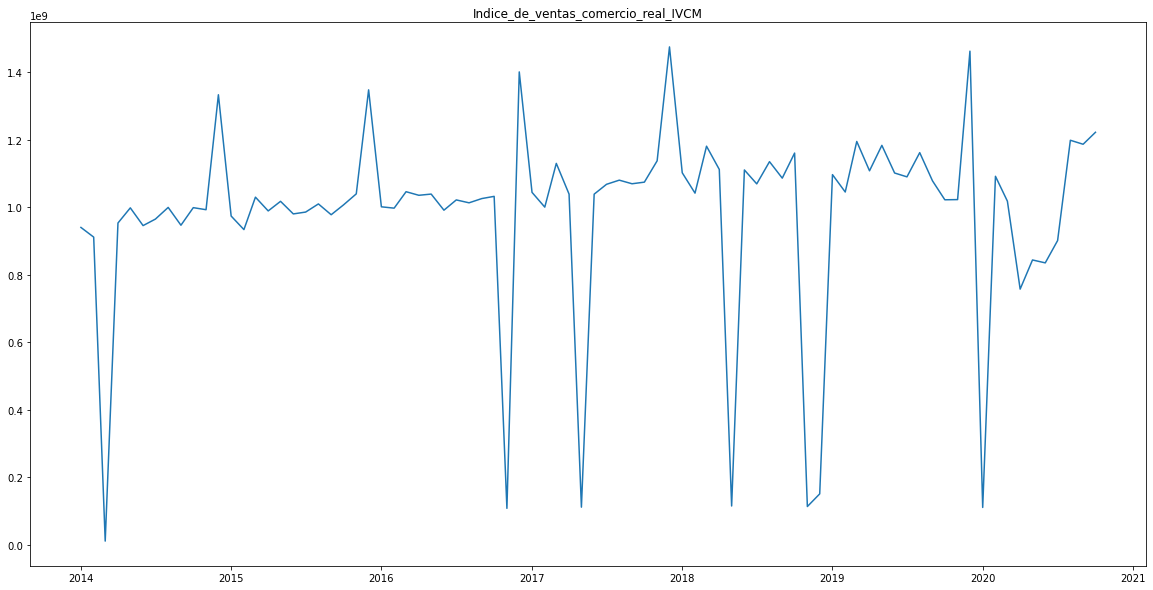

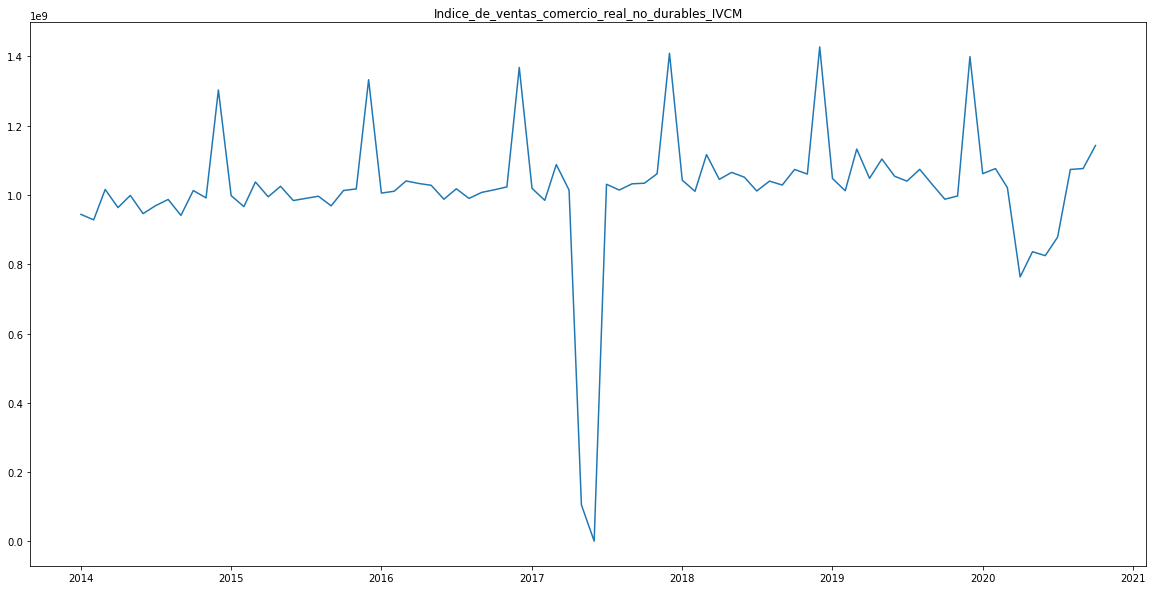

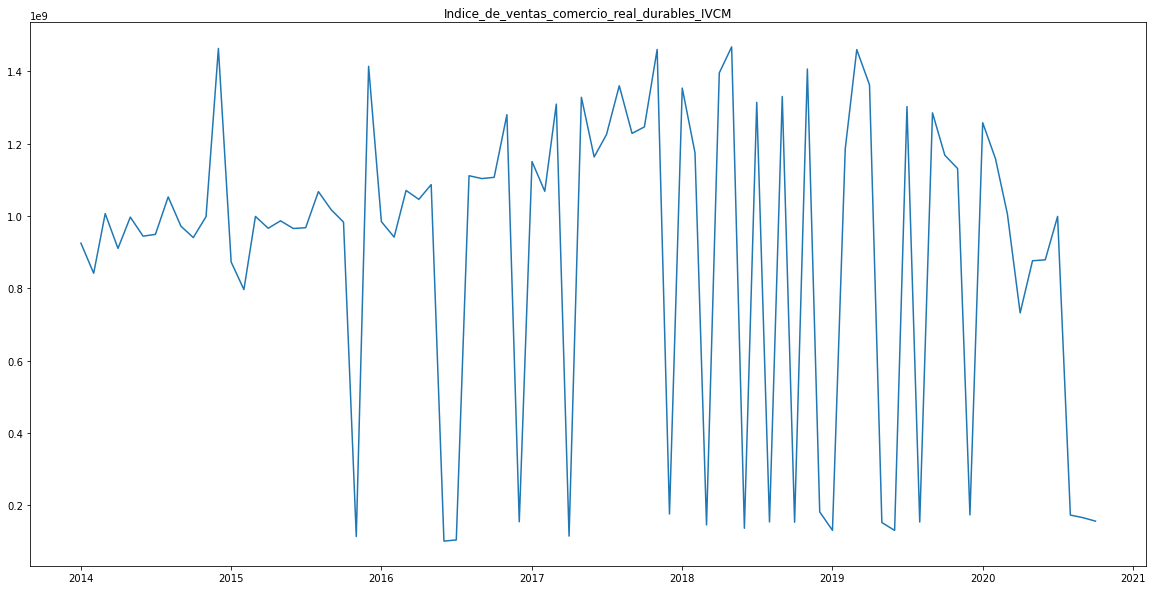

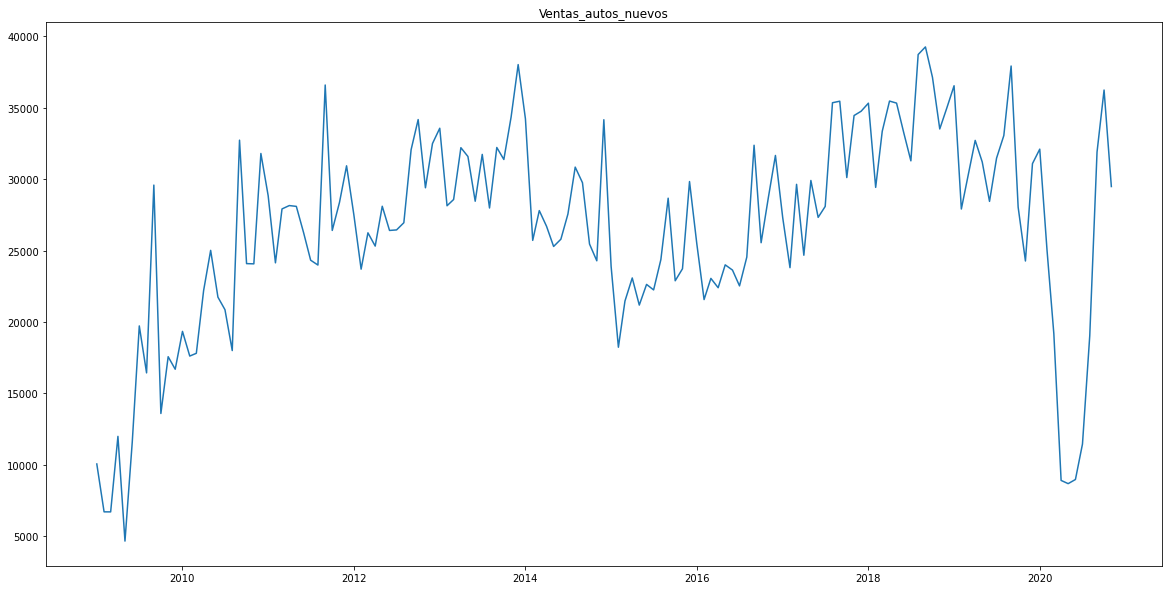

In [17]:
#lets plot all the variables to visually check for outliers
for column in df_bc.columns:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df_bc.index, df_bc[column])
    plt.title(column)
    
    #PIB_Alimentos, PIB_Bebidas_y_tabaco, PIB_Textil, PIB_Quimica > 0,5*10^8
    #PIB_Maderas_y_muebles, PIB_Minerales_no_metalicos_y_metalica_basica, PIB_Productos_metalicos, PIB_Electricidad, PIB_Restaurantes_y_hoteles, PIB_Transporte, PIB_Comunicaciones, PIB_Servicios_Financieros, PIB_Servicios_empresariales, PIB_Administracion_publica, PIB <1*10^8

**Correcciones**
Al parecer no existe una regla automática clara para arreglar las series de esta base. Por ende, existen dos opciones:
1. Corregir a mano y verificar valores según alguna referencia (por ejemplo, el mismo banco central) - trabajo manual y de mucho tiempo
2. Corregir por distribución, por ejemplo, eliminar los valores extremos (percentiles 5% y 95%) - esta es una medida automatizable, pero no perfecta, por lo que habría que corroborar los resultados gráficamente

**Comentario Personal:**
Por tiempo (error de estimación propio), no logré corregir la base de una manera que me convenciera (con valores razonables y criterios justificables bajos supuesto razonables), por ende decidí no considerar la base para el modelo. Considerando la gran cantidad de errores que existe, es riesgoso contruir un modelo con estos datos ya que podría entregar resultado errados o sin fundamentos (preferí usar datos que pude corroborar que estaban correctos).

Esto no es ideal, ya que las variables macro son potencialmente buenos predictos del consumo y precio de insumos, por ende de haberlas corregido podría haber constituido buenos predictores.

<h1>Pregunta 3</h1>

In [18]:
def plot_precip_hist(region, start_date, end_date):
    #check if region is in dataframe
    try:
        df = df_prec[[region]]
    except:
        print('region no encontrada')
        return
    df = df[(df.index>=start_date) & (df.index<=end_date)]
    
    #check if dates are included in the dataframe
    if df.shape[0] == 0:
        print('fechas fuera de rango disponible')
        return
    
    else:
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(df.index, df[region])
        plt.title(region)
        plt.show()

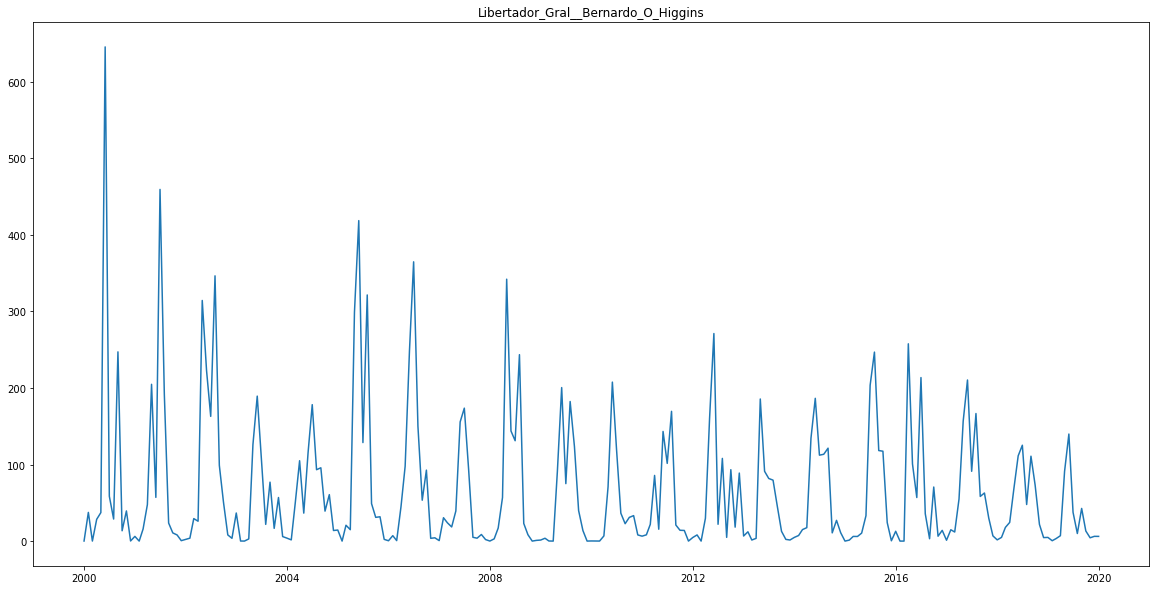

In [19]:
#Libertador General Bernardo O'Higgins
plot_precip_hist('Libertador_Gral__Bernardo_O_Higgins', '2000-01-01', '2020-01-01')

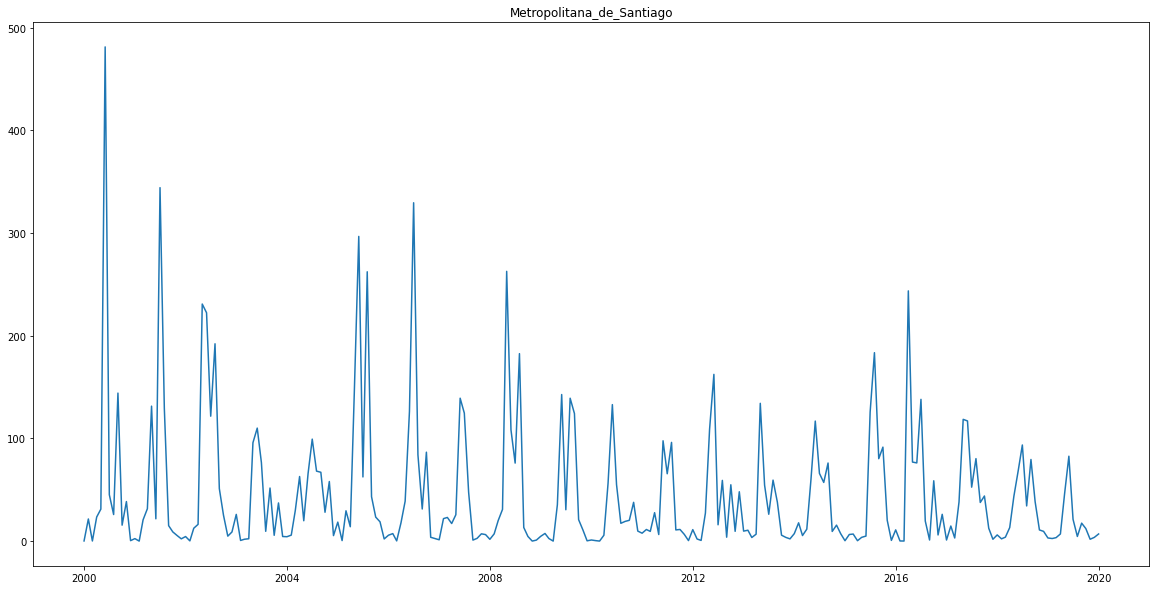

In [20]:
#Metropolitana
plot_precip_hist('Metropolitana_de_Santiago', '2000-01-01', '2020-01-01')

En ambas se aprecia un claro aumento en la cantidad de lluvia caída durante invierno (estacionalidad), pero vemos que estos peaks han ido dreciendo en el tiempo para ambos casos (tendencia a la baja). Esto hace sentido, considerando que se habla del avance del calentamiento global y la sequía del país, donde la cantidad de precipitaciones disminuye a lo largo del tiempo.

In [21]:
#this function only consideres values that are contained in the dataframe
def plot_precip_region(region, lista_years):
    df = df_prec[[region]]
    df.reset_index(inplace=True)
    
    #get the selected years
    df = df[df['date'].dt.year.isin(lista_years)]
    
    #create month variables
    df['month'] = df.date.dt.month
    dic = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
    df['month_name'] = df['month'].map(dic)
    
    #plot
    fig, ax = plt.subplots(figsize=(20, 10))
    for year in lista_years:
        ax.plot(df[df.date.dt.year==int(year)]['month_name'], df[df.date.dt.year==int(year)][region], label=year)
        ax.legend()
    plt.title(region)
    plt.show()

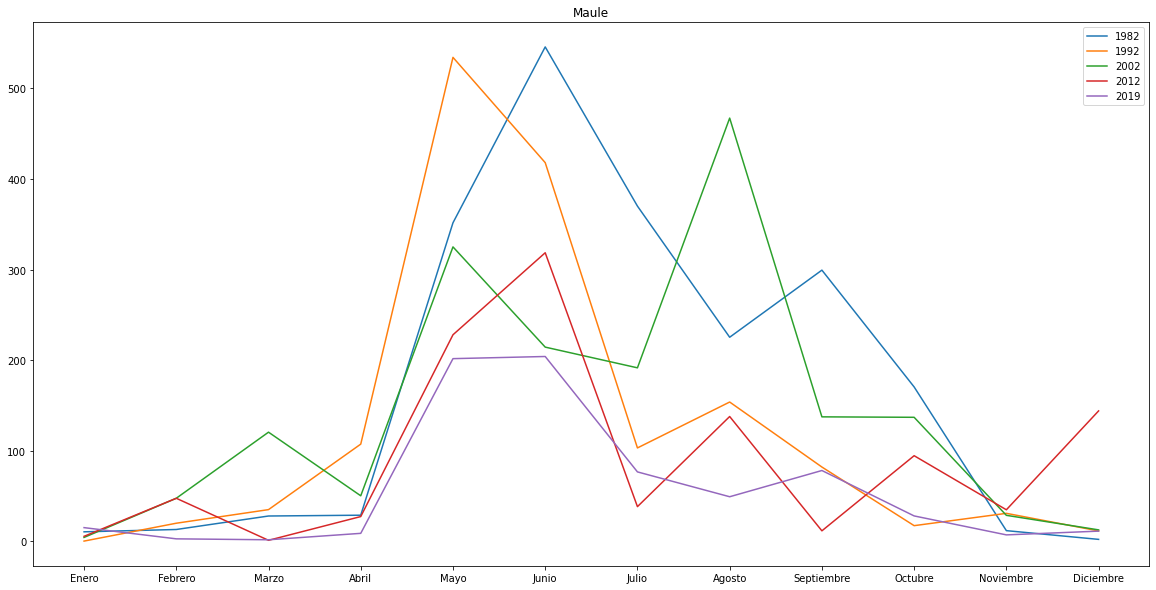

In [22]:
plot_precip_region('Maule', ['1982', '1992', '2002', '2012', '2019'])

Para la region del Maule, vemos algo similar a la conclusión anterior: peak de precipitaciones en inviernos (meses entre abril y Julio) con una tendencia a la baja a lo largo de los años (peaks más bajos). <br><br>

Un punto interesante, es que en 1992, 2002 y 2012 parece existir un segundo peak de precipitaciones en agosto, pero que se ha pérdido en 2019 (y que fue más tarde para 1982). Esta disminución podría ser producto de la disminución progresiva de las precipitaciones (para verificar convendría graficar las series desde 2012 en adelante) para ver si es tendencia o justo en los años graficados ocurrio el fenómeno.

In [23]:
def plot_pib_hist(serie_1, serie_2, start_date, end_date=None):
    df = df_bc[[serie_1, serie_2]]
    
    if end_date==None:
        df = df[df.index>=start_date]
    else:
        df = df[(df.index>=start_date) & (df.index<=end_date)]
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index, df[serie_1], label=serie_1)
    ax.plot(df.index, df[serie_2], label=serie_2)
    ax.legend()
    plt.show()

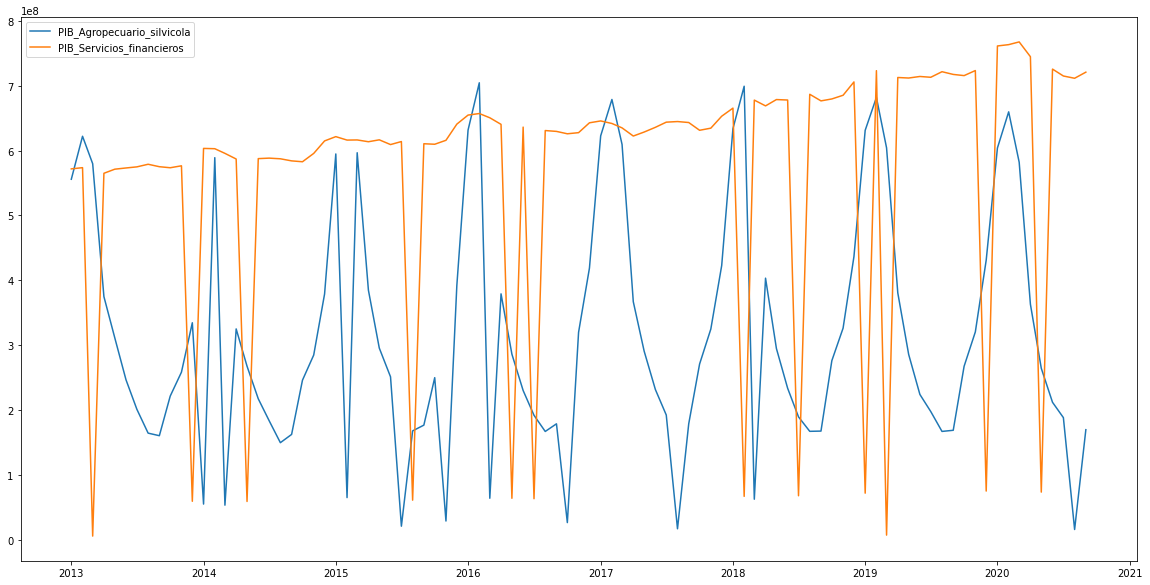

In [24]:
#plot pib comparison
plot_pib_hist('PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros', '2013-01-01')

Primero que todo, al no estar corregida la serie de serivicios financieros hace más difícil sacar conclusiones, pero podemos asumir que los valles hubieran seguido la tendencia general. <br><br>

En este sentido, vemos dos fenómenos: la serie de agropecuario y silvicola es estacional a lo largo del año, lo que hace sentido con las características del sector (cosecha, luego cultivo y luego venta), además los valores se han matenido constantes a los largos de los años. Por otra parte, la serie de servicios financieros es bastante más "suave" a lo largo del año y muestra un crecimiento sostenido en el tiempo.<br><br>

No obstante, se alcanza a apreciar una leve relación entre ambas: los servicios financieros presentan pequeños peaks en el año que coinciden con los peaks de la serie de agropecuario y silvicola. Una explicación posible, es que las empresas dedicadas a agropecuario y silvocla, usan estos servicios, dandoles un impulso y contribuyendo al aumento del valor del PIB en estos meses de "auge".

<h1>Pregunta 4</h1>

**Correlación**<br><br>
Para evaluar la correlación entre las diferentes series de tiempo podemos usar la clásica correlación pearson, con valores entre +1 y -1. Con esto podemos medir la dependencia lineal entre dos series de tiempo considerando la totalidad del intervalo (totalidad de puntos de datos).
<br><br>
En este sentido las series son más parecidas entre si, si la correlación es más cercana a +1 (dependencia lineal) o son contracíclicas si la correlación es cercana a -1 (una de las series sería el inverso aditivo de la otra). Con esto, buscamos no tener variables muy correlacionadas entre si, porque podrían generar problemas de identificación en el modelo (colinealidad) además de que dos series muy correlacionadas entregan potencialmente la misma información con respecto a la variable que se quiere predecir (correlación +1 nos diría que las dos series son básicamente las mismas).
<br><br>
Así, nos gustaría tener en nuestro modelo variables que tengan correlación alta (en valor absoluto) con la variable que deseamos predecir y con correlación baja entre los predictores (en valor absoluto). El criterio para correlación alta es subjetivo, pero podemos considerar alto un valor absoluto entre series y entre serie y predictor de 0.8.
<br><br>
Pese a lo anterior, esta correlación solo mide la dependencia linear entre variables y podríamos perder información valiosa si no consideramos otro tipo de dependencia (seleccionando a través de otros criterios como wrappers o mutual information); si hacemos un modelo lineal nos basta con la correlación de pearson ya que este solo toma la relación lineal entre las variables (por construcción).

Ahora partiremos abriendo la base de precio_leche, construiremos la variable de fecha y la uniremos con la base de precipitaciones - no consideramos la base del banco central por no haberla logrado corregir de manera razonable.

In [25]:
#open precio_leche dataset
df_leche = pd.read_csv('precio_leche.csv')
df_leche.head(12)

Anio  Mes  Precio_leche
0   1979  Ene          3.85
1   1979  Feb          4.58
2   1979  Mar          5.18
3   1979  Abr          6.06
4   1979  May          7.25
5   1979  Jun          7.71
6   1979  Jul          8.10
7   1979  Ago          7.65
8   1979  Sep          6.96
9   1979  Oct          5.79
10  1979  Nov          5.29
11  1979  Dic          5.20

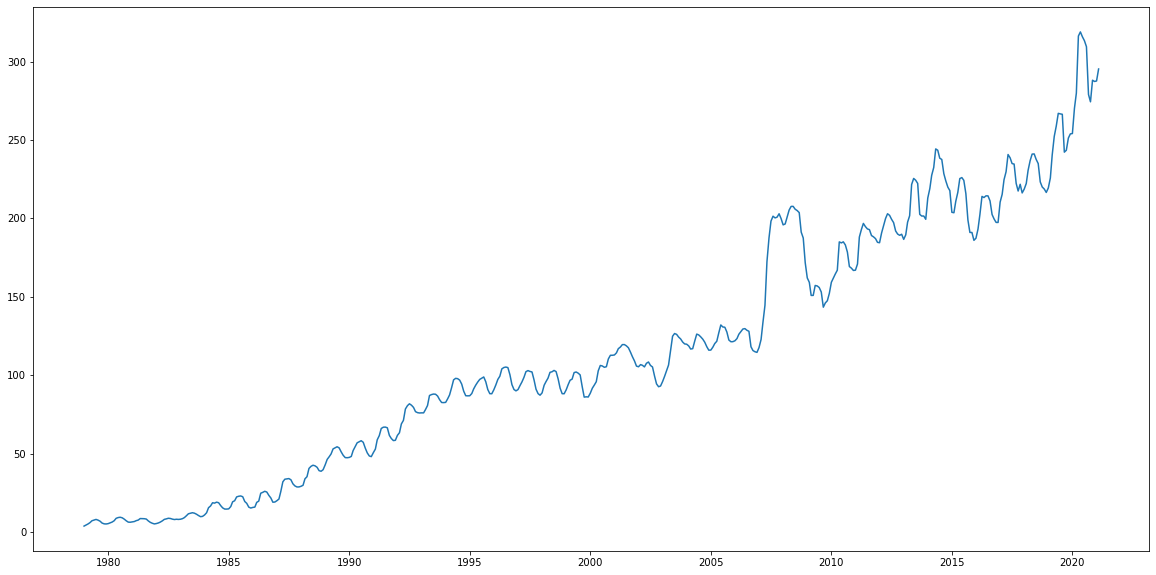

In [26]:
#create date column
dic = {'Ene':1, 'Feb':2, 'Mar':3, 'Abr':4, 'May':5, 'Jun':6, 'Jul':7, 'Ago':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dic':12}
df_leche['month_num'] = df_leche['Mes'].map(dic)

df_leche['date'] = pd.to_datetime(df_leche['Anio'].apply(str) + '-' + df_leche['month_num'].apply(str) + '-01')

#create quarter variable
df_leche['quarter'] = df_leche['date'].dt.quarter
#set as index and plot data
df_leche.set_index('date', drop=True, inplace=True)

fig, ax= plt.subplots(figsize=(20, 10))
ax.plot(df_leche.index, df_leche['Precio_leche'])

Antes de hacer el merge, eliminaremos variables redudantes (solo mes), y veremos si las series son estacionarias para corregirlas de no ser así (diferenciándolas las veces que sean necesarias). Lo anterior, ya que queremos proponer un modelo lineal simple para nuestro modelo. Para verificar estacionariedad, utilizaremos el test de dickey-fuller aumentado, para verificar si existe raíz unitaria (p_valor > 0.5).<br><br>

Además, para la creación de variables, corremos un análisis de autocorrelación para elegir potencial lag del precio de la leche (considerando una significancia de 0.01).

In [27]:
#drop some variables
df_leche.drop('Mes', axis=1, inplace=True)

#lets start by testing if the series is stationary with d-fuller test - we need p-value less than 5% for the series not to have unit root
print(adf(df_leche['Precio_leche'])[1])

#since there is a unit root, we differentiate the series
df_leche['Precio_leche_diff'] = df_leche['Precio_leche'].diff()
df_leche.head(10)

0.9949103044105466


Anio  Precio_leche  month_num  quarter  Precio_leche_diff
date                                                                 
1979-01-01  1979          3.85          1        1                NaN
1979-02-01  1979          4.58          2        1               0.73
1979-03-01  1979          5.18          3        1               0.60
1979-04-01  1979          6.06          4        2               0.88
1979-05-01  1979          7.25          5        2               1.19
1979-06-01  1979          7.71          6        2               0.46
1979-07-01  1979          8.10          7        3               0.39
1979-08-01  1979          7.65          8        3              -0.45
1979-09-01  1979          6.96          9        3              -0.69
1979-10-01  1979          5.79         10        4              -1.17

2.1597085277277414e-13


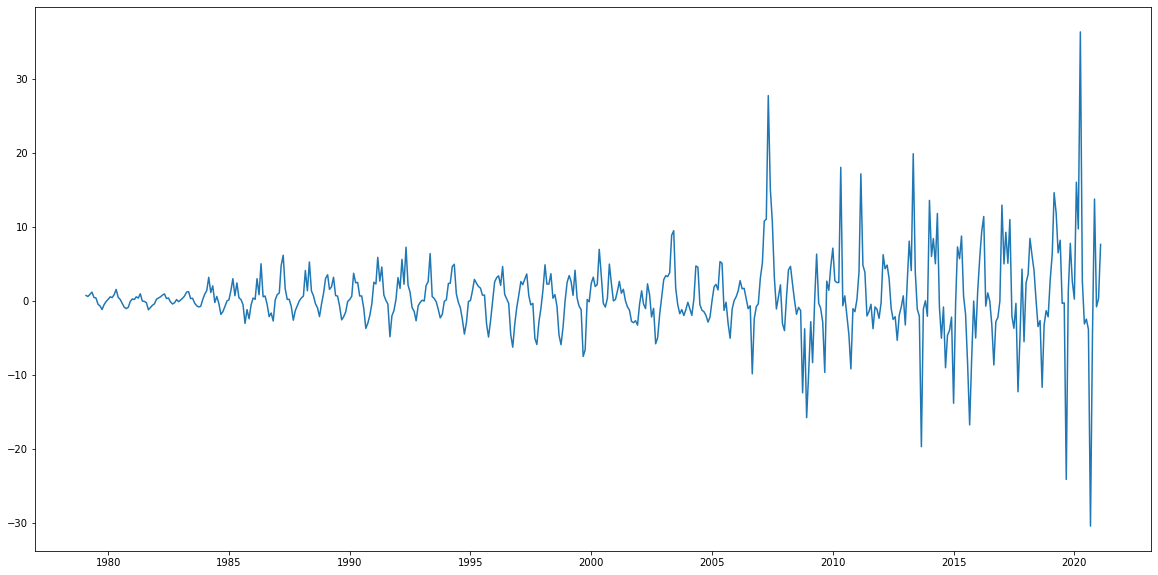

In [28]:
#we test again to check if the series is stationary
print(adf(df_leche['Precio_leche_diff'].dropna())[1]) #--> stationary

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_leche.index, df_leche['Precio_leche_diff'])

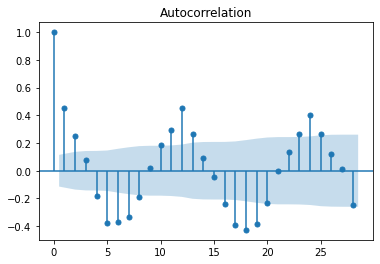

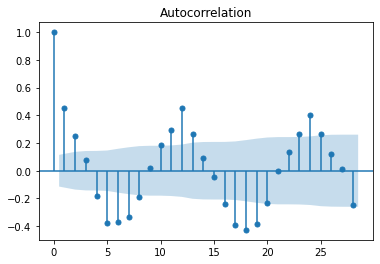

In [29]:
#lets use autocorrelation to see what possible lags we can use
plot_acf(df_leche['Precio_leche_diff'].dropna(), alpha=0.01)

#the only lags that are significant are -1, -2 and -11, -12, and -13, for more than a year - lets create those variables

In [30]:
#create lagged variables
df_leche['Precio_lag1'] = df_leche['Precio_leche_diff'].shift(1)
df_leche['Precio_lag2'] = df_leche['Precio_leche_diff'].shift(2)
df_leche['Precio_lag11'] = df_leche['Precio_leche_diff'].shift(11)
df_leche['Precio_lag12'] = df_leche['Precio_leche_diff'].shift(12)
df_leche['Precio_lag13'] = df_leche['Precio_leche_diff'].shift(13)
df_leche.head(20)

Anio  Precio_leche  month_num  quarter  Precio_leche_diff  \
date                                                                    
1979-01-01  1979          3.85          1        1                NaN   
1979-02-01  1979          4.58          2        1               0.73   
1979-03-01  1979          5.18          3        1               0.60   
1979-04-01  1979          6.06          4        2               0.88   
1979-05-01  1979          7.25          5        2               1.19   
1979-06-01  1979          7.71          6        2               0.46   
1979-07-01  1979          8.10          7        3               0.39   
1979-08-01  1979          7.65          8        3              -0.45   
1979-09-01  1979          6.96          9        3              -0.69   
1979-10-01  1979          5.79         10        4              -1.17   
1979-11-01  1979          5.29         11        4              -0.50   
1979-12-01  1979          5.20         12        4              -0.09   
1980-01-01  1980          5.41          1        1               0.21   
1980-02-01  1980          5.96          2        1               0.55   
1980-03-01  1980          6.41          3        1               0.45   
1980-04-01  1980          7.25          4        2               0.84   
1980-05-01  1980          8.80          5        2               1.55   
1980-06-01  1980          9.28          6        2               0.48   
1980-07-01  1980          9.48          7        3               0.20   
1980-08-01  1980          9.14          8        3              -0.34   

            Precio_lag1  Precio_lag2  Precio_lag11  Precio_lag12  Precio_lag13  
date                                                                            
1979-01-01          NaN          NaN           NaN           NaN           NaN  
1979-02-01          NaN          NaN           NaN           NaN           NaN  
1979-03-01         0.73          NaN           NaN           NaN           NaN  
1979-04-01         0.60         0.73           NaN           NaN           NaN  
1979-05-01         0.88         0.60           NaN           NaN           NaN  
1979-06-01         1.19         0.88           NaN           NaN           NaN  
1979-07-01         0.46         1.19           NaN           NaN           NaN  
1979-08-01         0.39         0.46           NaN           NaN           NaN  
1979-09-01        -0.45         0.39           NaN           NaN           NaN  
1979-10-01        -0.69        -0.45           NaN           NaN           NaN  
1979-11-01        -1.17        -0.69           NaN           NaN           NaN  
1979-12-01        -0.50        -1.17           NaN           NaN           NaN  
1980-01-01        -0.09        -0.50          0.73           NaN           NaN  
1980-02-01         0.21        -0.09          0.60          0.73           NaN  
1980-03-01         0.55         0.21          0.88          0.60          0.73  
1980-04-01         0.45         0.55          1.19          0.88          0.60  
1980-05-01         0.84         0.45          0.46          1.19          0.88  
1980-06-01         1.55         0.84          0.39          0.46          1.19  
1980-07-01         0.48         1.55         -0.45          0.39          0.46  
1980-08-01         0.20         0.48         -0.69         -0.45          0.39

In [31]:
#now we will merge with precipitaciones data set, but first lets check if precipitaciones data is stationary
for column in df_prec.columns:
    print(column, adf(df_prec[column])[1])
    
#since the p-values are small (<0.05) we can conclude that there is no unit root - we continue to merge

Coquimbo 1.7061807067374175e-06
Valparaiso 1.2465362656869615e-06
Metropolitana_de_Santiago 1.3374350973572034e-06
Libertador_Gral__Bernardo_O_Higgins 1.7193931887286564e-06
Maule 4.308371215167689e-06
Biobio 3.017103375442931e-07
La_Araucania 9.277747656951208e-08
Los_Rios 6.619931070619771e-08


In [32]:
df_final = df_leche.merge(df_prec, how='left', left_index=True, right_index=True)

df_final.head(20)

Anio  Precio_leche  month_num  quarter  Precio_leche_diff  \
date                                                                    
1979-01-01  1979          3.85          1        1                NaN   
1979-02-01  1979          4.58          2        1               0.73   
1979-03-01  1979          5.18          3        1               0.60   
1979-04-01  1979          6.06          4        2               0.88   
1979-05-01  1979          7.25          5        2               1.19   
1979-06-01  1979          7.71          6        2               0.46   
1979-07-01  1979          8.10          7        3               0.39   
1979-08-01  1979          7.65          8        3              -0.45   
1979-09-01  1979          6.96          9        3              -0.69   
1979-10-01  1979          5.79         10        4              -1.17   
1979-11-01  1979          5.29         11        4              -0.50   
1979-12-01  1979          5.20         12        4              -0.09   
1980-01-01  1980          5.41          1        1               0.21   
1980-02-01  1980          5.96          2        1               0.55   
1980-03-01  1980          6.41          3        1               0.45   
1980-04-01  1980          7.25          4        2               0.84   
1980-05-01  1980          8.80          5        2               1.55   
1980-06-01  1980          9.28          6        2               0.48   
1980-07-01  1980          9.48          7        3               0.20   
1980-08-01  1980          9.14          8        3              -0.34   

            Precio_lag1  Precio_lag2  Precio_lag11  Precio_lag12  \
date                                                               
1979-01-01          NaN          NaN           NaN           NaN   
1979-02-01          NaN          NaN           NaN           NaN   
1979-03-01         0.73          NaN           NaN           NaN   
1979-04-01         0.60         0.73           NaN           NaN   
1979-05-01         0.88         0.60           NaN           NaN   
1979-06-01         1.19         0.88           NaN           NaN   
1979-07-01         0.46         1.19           NaN           NaN   
1979-08-01         0.39         0.46           NaN           NaN   
1979-09-01        -0.45         0.39           NaN           NaN   
1979-10-01        -0.69        -0.45           NaN           NaN   
1979-11-01        -1.17        -0.69           NaN           NaN   
1979-12-01        -0.50        -1.17           NaN           NaN   
1980-01-01        -0.09        -0.50          0.73           NaN   
1980-02-01         0.21        -0.09          0.60          0.73   
1980-03-01         0.55         0.21          0.88          0.60   
1980-04-01         0.45         0.55          1.19          0.88   
1980-05-01         0.84         0.45          0.46          1.19   
1980-06-01         1.55         0.84          0.39          0.46   
1980-07-01         0.48         1.55         -0.45          0.39   
1980-08-01         0.20         0.48         -0.69         -0.45   

            Precio_lag13   Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
date                                                                         
1979-01-01           NaN   2.641948    0.587062                   2.447114   
1979-02-01           NaN   1.179804    2.432192                   3.997852   
1979-03-01           NaN   0.255490    0.020601                   0.000000   
1979-04-01           NaN  10.173699   11.745779                  13.722349   
1979-05-01           NaN   1.039098   18.609286                  50.187148   
1979-06-01           NaN   0.141157    0.000000                   1.397164   
1979-07-01           NaN  34.630791  118.340422                 170.614262   
1979-08-01           NaN   9.073373   49.270309                 130.503624   
1979-09-01           NaN  12.041765   33.970292                  77.705101   
1979-10-01           NaN   0.018634    0.558101   

In [33]:
#no we will create some lags for the precipiciones data
#we will use as a first approach the 3 previous months, -6 months and -11 month (this one to get the same month
#from the previous year, since we now there is stationality
for column in df_prec.columns:
    df_final[column + '_lag1'] = df_final[column].shift(1)
    df_final[column + '_lag2'] = df_final[column].shift(2)
    df_final[column + '_lag3'] = df_final[column].shift(3)
    df_final[column + '_lag6'] = df_final[column].shift(6)
    df_final[column + '_lag11'] = df_final[column].shift(12)
    
df_final.head(20)

Anio  Precio_leche  month_num  quarter  Precio_leche_diff  \
date                                                                    
1979-01-01  1979          3.85          1        1                NaN   
1979-02-01  1979          4.58          2        1               0.73   
1979-03-01  1979          5.18          3        1               0.60   
1979-04-01  1979          6.06          4        2               0.88   
1979-05-01  1979          7.25          5        2               1.19   
1979-06-01  1979          7.71          6        2               0.46   
1979-07-01  1979          8.10          7        3               0.39   
1979-08-01  1979          7.65          8        3              -0.45   
1979-09-01  1979          6.96          9        3              -0.69   
1979-10-01  1979          5.79         10        4              -1.17   
1979-11-01  1979          5.29         11        4              -0.50   
1979-12-01  1979          5.20         12        4              -0.09   
1980-01-01  1980          5.41          1        1               0.21   
1980-02-01  1980          5.96          2        1               0.55   
1980-03-01  1980          6.41          3        1               0.45   
1980-04-01  1980          7.25          4        2               0.84   
1980-05-01  1980          8.80          5        2               1.55   
1980-06-01  1980          9.28          6        2               0.48   
1980-07-01  1980          9.48          7        3               0.20   
1980-08-01  1980          9.14          8        3              -0.34   

            Precio_lag1  Precio_lag2  Precio_lag11  Precio_lag12  \
date                                                               
1979-01-01          NaN          NaN           NaN           NaN   
1979-02-01          NaN          NaN           NaN           NaN   
1979-03-01         0.73          NaN           NaN           NaN   
1979-04-01         0.60         0.73           NaN           NaN   
1979-05-01         0.88         0.60           NaN           NaN   
1979-06-01         1.19         0.88           NaN           NaN   
1979-07-01         0.46         1.19           NaN           NaN   
1979-08-01         0.39         0.46           NaN           NaN   
1979-09-01        -0.45         0.39           NaN           NaN   
1979-10-01        -0.69        -0.45           NaN           NaN   
1979-11-01        -1.17        -0.69           NaN           NaN   
1979-12-01        -0.50        -1.17           NaN           NaN   
1980-01-01        -0.09        -0.50          0.73           NaN   
1980-02-01         0.21        -0.09          0.60          0.73   
1980-03-01         0.55         0.21          0.88          0.60   
1980-04-01         0.45         0.55          1.19          0.88   
1980-05-01         0.84         0.45          0.46          1.19   
1980-06-01         1.55         0.84          0.39          0.46   
1980-07-01         0.48         1.55         -0.45          0.39   
1980-08-01         0.20         0.48         -0.69         -0.45   

            Precio_lag13  ...  La_Araucania_lag1  La_Araucania_lag2  \
date                      ...                                         
1979-01-01           NaN  ...                NaN                NaN   
1979-02-01           NaN  ...          25.212940                NaN   
1979-03-01           NaN  ...          18.085072          25.212940   
1979-04-01           NaN  ...          28.696504          18.085072   
1979-05-01           NaN  ...          43.617921          28.696504   
1979-06-01           NaN  ...         279.409718          43.617921   
1979-07-01           NaN  ...         113.488705         279.409718   
1979-08-01           NaN  ...         356.070480         113.488705   
1979-09-01           NaN  ...         458.753077         356.070480   
1979-10-01           NaN  ...         203.191759         458.753077   
1979-11-01           NaN  ...         121.420487        

In [34]:
#finally we create the variable that we want to predict
df_final['Y'] = df_final['Precio_leche_diff'].shift(-1)


df_final.tail(10)

Anio  Precio_leche  month_num  quarter  Precio_leche_diff  \
date                                                                    
2020-05-01  2020        318.88          5        2               2.63   
2020-06-01  2020        315.76          6        2              -3.12   
2020-07-01  2020        313.30          7        3              -2.46   
2020-08-01  2020        309.44          8        3              -3.86   
2020-09-01  2020        278.99          9        3             -30.45   
2020-10-01  2020        274.32         10        4              -4.67   
2020-11-01  2020        288.09         11        4              13.77   
2020-12-01  2020        287.29         12        4              -0.80   
2021-01-01  2021        287.60          1        1               0.31   
2021-02-01  2021        295.24          2        1               7.64   

            Precio_lag1  Precio_lag2  Precio_lag11  Precio_lag12  \
date                                                               
2020-05-01        36.37         9.73          8.20          6.50   
2020-06-01         2.63        36.37         -0.33          8.20   
2020-07-01        -3.12         2.63         -0.26         -0.33   
2020-08-01        -2.46        -3.12        -24.14         -0.26   
2020-09-01        -3.86        -2.46          1.21        -24.14   
2020-10-01       -30.45        -3.86          7.78          1.21   
2020-11-01        -4.67       -30.45          2.64          7.78   
2020-12-01        13.77        -4.67          0.24          2.64   
2021-01-01        -0.80        13.77         16.05          0.24   
2021-02-01         0.31        -0.80          9.73         16.05   

            Precio_lag13  ...  La_Araucania_lag2  La_Araucania_lag3  \
date                      ...                                         
2020-05-01         11.87  ...          28.310937          29.001988   
2020-06-01          6.50  ...          73.813290          28.310937   
2020-07-01          8.20  ...                NaN          73.813290   
2020-08-01         -0.33  ...                NaN                NaN   
2020-09-01         -0.26  ...                NaN                NaN   
2020-10-01        -24.14  ...                NaN                NaN   
2020-11-01          1.21  ...                NaN                NaN   
2020-12-01          7.78  ...                NaN                NaN   
2021-01-01          2.64  ...                NaN                NaN   
2021-02-01          0.24  ...                NaN                NaN   

            La_Araucania_lag6  La_Araucania_lag11  Los_Rios_lag1  \
date                                                               
2020-05-01          66.545126          252.163983     140.076757   
2020-06-01          27.321858          386.013137            NaN   
2020-07-01          35.916618          345.452879            NaN   
2020-08-01          29.001988          155.448370            NaN   
2020-09-01          28.310937          100.461828            NaN   
2020-10-01          73.813290           94.371158            NaN   
2020-11-01                NaN           66.545126            NaN   
2020-12-01                NaN           27.321858            NaN   
2021-01-01                NaN           35.916618            NaN   
2021-02-01                NaN           29.001988            NaN   

            Los_Rios_lag2  Los_Rios_lag3  Los_Rios_lag6  Los_Rios_lag11      Y  
date                                                                            
2020-05-01      73.640866      55.838889     133.271809      298.521356  -3.12  
2020-06-01     140.076757      73.640866      62.170090      418.001731  -2.46  
2020-07-01            NaN     140.076757      63.389625      461.961202  -3.86  
2020-08-01            NaN            NaN      55.838889      233.621020 -30.45  
2020-09-01            NaN            NaN      73.640866      128.256227  -4.67  
2020-10-01            NaN            NaN     140.076757      135.689393  13.77  


In [35]:
#finally we will drop the rows that have Na - with this the last date will be 2020-04-01
df_final.dropna(inplace=True)
print('Filas: ', df_final.shape[0])
print('Columnas: ', df_final.shape[1])
df_final.tail()

Filas:  482
Columnas:  59


Anio  Precio_leche  month_num  quarter  Precio_leche_diff  \
date                                                                    
2019-12-01  2019        253.86         12        4               2.64   
2020-01-01  2020        254.10          1        1               0.24   
2020-02-01  2020        270.15          2        1              16.05   
2020-03-01  2020        279.88          3        1               9.73   
2020-04-01  2020        316.25          4        2              36.37   

            Precio_lag1  Precio_lag2  Precio_lag11  Precio_lag12  \
date                                                               
2019-12-01         7.78         1.21          2.83         -2.15   
2020-01-01         2.64         7.78          6.38          2.83   
2020-02-01         0.24         2.64         14.63          6.38   
2020-03-01        16.05         0.24         11.87         14.63   
2020-04-01         9.73        16.05          6.50         11.87   

            Precio_lag13  ...  La_Araucania_lag2  La_Araucania_lag3  \
date                      ...                                         
2019-12-01         -1.32  ...          94.371158         100.461828   
2020-01-01         -2.15  ...          66.545126          94.371158   
2020-02-01          2.83  ...          27.321858          66.545126   
2020-03-01          6.38  ...          35.916618          27.321858   
2020-04-01         14.63  ...          29.001988          35.916618   

            La_Araucania_lag6  La_Araucania_lag11  Los_Rios_lag1  \
date                                                               
2019-12-01         386.013137           53.897685     133.271809   
2020-01-01         345.452879           41.381386      62.170090   
2020-02-01         155.448370           20.829368      63.389625   
2020-03-01         100.461828           37.669307      55.838889   
2020-04-01          94.371158           46.483976      73.640866   

            Los_Rios_lag2  Los_Rios_lag3  Los_Rios_lag6  Los_Rios_lag11      Y  
date                                                                            
2019-12-01     135.689393     128.256227     418.001731       86.954264   0.24  
2020-01-01     133.271809     135.689393     461.961202       37.415220  16.05  
2020-02-01      62.170090     133.271809     233.621020       31.649173   9.73  
2020-03-01      63.389625      62.170090     128.256227       62.075736  36.37  
2020-04-01      55.838889      63.389625     135.689393      106.383876   2.63  

[5 rows x 59 columns]

<h1>Pregunta 5</h1><br><br>

Construiremos un modelo simple (linear), para lo cual consideraremos la base de datos antes creada.<br><br>

Para entrenar el modelo consideraremos los últimos 2 años disponibles como test set y el resto para entrenar. Lo anterior, principalmente porque no tenemos demasiadas observaciones (solamente 482) y así consideramos la gran parte para entrenar y solo el 5% para testear (el número de datos también es razón de porque elegimos un modelo simple). <br><br>

Adicionalmente, hacemos un filtro de las variables a utilizar mediante correlación para solo incorporar aquellas con potencial de ser buenos predictores (colocamos el threshold en 0.4 valor absoluto para no ser tan exigentes con los predictores). Luego de seleccionarlos, verificamos que los predictores no estén demasiado correlacionados entre ellos para evitar errores de identificación.

In [36]:
#first we will divide the dataset between training and test set
#for training we will use the entire dataset minus the last 2 years
X_train = df_final.iloc[:-24, 1:-1]
Y_train = df_final.iloc[:-24, [-1]]

X_test = df_final.iloc[-24:, 1:-1]
Y_test = df_final.iloc[-24:, [-1]]

In [37]:
#we will compute the correlation between the predictos and the variable that we want to predict
#we will eliminate all the variables that has a correlation below 0.4 in abs value

#correlation filter
for column in X_train.columns:
    if abs(np.corrcoef(Y_train['Y'], X_train[column])[0][1]) < 0.4:
        X_train.drop(column, axis=1, inplace=True)
        X_test.drop(column, axis=1, inplace=True)

#we can see that only 4 variables remain
X_train.head()

month_num  Precio_leche_diff  Precio_lag11  Los_Rios_lag3
date                                                                 
1980-03-01          3               0.45          0.88     200.633579
1980-04-01          4               0.84          1.19      65.338475
1980-05-01          5               1.55          0.46     229.069832
1980-06-01          6               0.48          0.39     124.323902
1980-07-01          7               0.20         -0.45     347.281550

In [38]:
#lets check correlation matrix
X_train.corr() #we see no high corr between predictors

month_num  Precio_leche_diff  Precio_lag11  Los_Rios_lag3
month_num           1.000000          -0.437923     -0.406547       0.504883
Precio_leche_diff  -0.437923           1.000000      0.331292      -0.398447
Precio_lag11       -0.406547           0.331292      1.000000      -0.373695
Los_Rios_lag3       0.504883          -0.398447     -0.373695       1.000000

In [39]:
#we train a simple regression model
from sklearn.linear_model import LinearRegression as LR
model_1 = LR(fit_intercept=True)
model_1.fit(X_train, Y_train)
print(model_1.intercept_, model_1.coef_)

[1.88554896] [[-0.12529739  0.36338792  0.21147223 -0.00426605]]


In [40]:
#lets make predictions
Y_test['Y_pred'] = model_1.predict(X_test)
Y_test['Precio_leche_original'] = df_final[(df_final.index>=Y_test.index[0]) &(df_final.index<=Y_test.index[-1])]['Precio_leche']
#recover the original data --> prices
Y_test['Y_original'] = Y_test['Y'] + Y_test['Precio_leche_original']
Y_test['Y_pred_original'] = Y_test['Y_pred'] + Y_test['Precio_leche_original']
Y_test['dummy_model'] = df_final[(df_final.index>=Y_test.index[0]) &(df_final.index<=Y_test.index[-1])]['Precio_leche_diff']

Y_test.tail()

Y     Y_pred  Precio_leche_original  Y_original  \
date                                                              
2019-12-01   0.24   1.392644                 253.86      254.10   
2020-01-01  16.05   2.617800                 254.10      270.15   
2020-02-01   9.73   9.992625                 270.15      279.88   
2020-03-01  36.37   7.290376                 279.88      316.25   
2020-04-01   2.63  15.704924                 316.25      318.88   

            Y_pred_original  dummy_model  
date                                      
2019-12-01       255.252644         2.64  
2020-01-01       256.717800         0.24  
2020-02-01       280.142625        16.05  
2020-03-01       287.170376         9.73  
2020-04-01       331.954924        36.37

Model:

R2:  0.2313170243895114
MAE: 6.150856634351821
RMSE:  9.413888674846053


Dummy:

R2:  -0.38441626472725443
MAE: 8.737083333333327
RMSE:  12.633648028182519


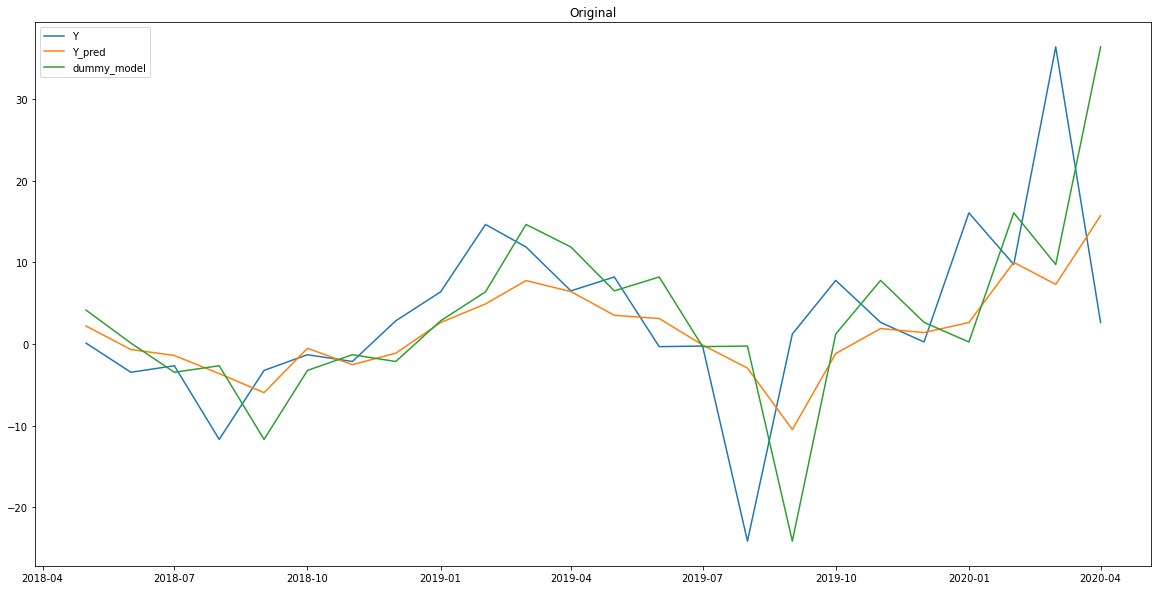

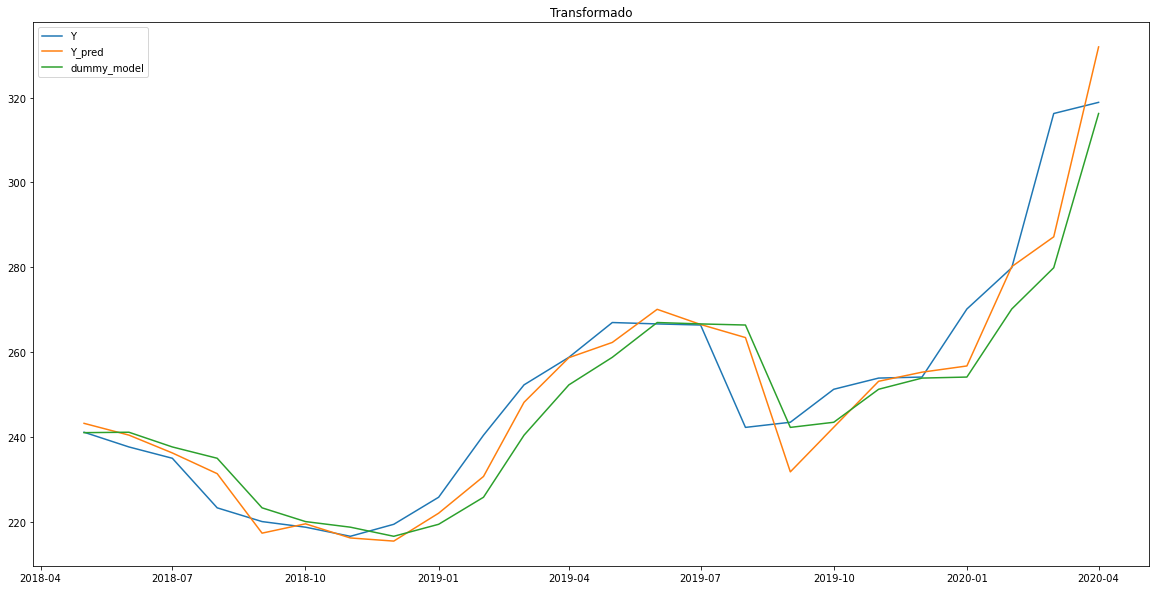

In [42]:
#compute metrics and plot
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
print('Model:\n')
print('R2: ', r2_score(Y_test['Y'], Y_test['Y_pred']))
print('MAE:', mae(Y_test['Y'], Y_test['Y_pred']))
print('RMSE: ', mse(Y_test['Y'], Y_test['Y_pred'], squared=False))

print('\n\nDummy:\n')
print('R2: ', r2_score(Y_test['Y'], Y_test['dummy_model']))
print('MAE:', mae(Y_test['Y'], Y_test['dummy_model']))
print('RMSE: ', mse(Y_test['Y'], Y_test['dummy_model'], squared=False))


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Y_test.index, Y_test['Y'], label='Y')
ax.plot(Y_test.index, Y_test['Y_pred'], label='Y_pred')
ax.plot(Y_test.index, Y_test['dummy_model'], label='dummy_model')
ax.legend()
plt.title('Original')
plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Y_test.index, Y_test['Y_original'], label='Y')
ax.plot(Y_test.index, Y_test['Y_pred_original'], label='Y_pred')
ax.plot(Y_test.index, Y_test['Precio_leche_original'], label='dummy_model')
ax.legend()
plt.title('Transformado')
plt.show()

**Evaluación del Modelo** <br><br>
Para evaluar el modelo conviene utilizar métricas de regresión, siendo las más cómunes: R2, MAE y RMSE. Sabemos por teoría que mientras R2 más cercano a 1 es mejor y que para los otros dos mientras más cercano a 0 mejor. De todas formas, las medidas por si solas no sirven ya que conviene tener puntos de comparación, por lo mismo utilizamos un modelo dummy como comparación (simplemente predecir el valor anterior).<br><br>
Por otro lado, también se deben evaluar fuera de la muestra para no considerar modelos que hacen overfitting a la data; buscamos el modelo que mejor generalice para que funcione en la práctica.<br><br>

Así, nuestro modelo es mejor que un modelo dummy, presenta un R2 "decente", pero tiene errores de bastante magnitud con respecto a la predicción (6 puntos en promedio de desviación con respecto al valor real). Esto implicaca, que es perfectible por lo que se podrían probar otro tipo de modelos y/o variables para revisar.<br><br>

Como adicional, otros criterios de evaluación del modelo es también estimando si es que nuestro modelo tiende a subestimar o sobreestimar el valor que se busca a predecir, para entender su tendencia y tenerla presente en cuando sea utilizado en productivo. Así mismo, si predecimos variables que puedan ser positivas o negativas, podemos revisar el accuracy sobre los signos de predicción para entender aún más su comportamiento.

**Datos Adicionales y Mejoras de Modelo**<br><br>
**Datos:** incorporar mejores predictores nos ayudaría a mejor nuestro modelo inicial<br>
1. Evidentemente incorporar alguno de los datos macro podría mejorar aún más la predicción de nuestro modelos, por lo que que se deben considerar una segunda iteración con ellos
2. Otros datos interesantes a considerar: demanda por productos sustitutos (como leches veganas o de almendras, de no estar incluídos), venta neta de unidades global y por zona(estamos estimando precio, pero el volumen debería poder ser buen predictor), costo de insumos para producción de leche (afectarían margen; potencialmente puede que estén incluidos en algún pib), cantidad de ganado productor de leche (por oferta, si hay mucho, podría disminuir el precio), elasticidades de consumidores (podría ser factor para los modelos de pricing), datos de políticas o subsidios (si es que existen podrían bajar los precios), campañas gubernamentales (como la de "yo tomo leche" - podría ser una dummy), entre muchas<br><br>
3. Incluir otras medidas de las variables actuales: como por ejemplo máximo móvil o promedio móvil, ponderación entre variables, etc.
**Otros Modelos:** aquí utilizamos un modelo simple y de fácil implementación, pero efectivamente la predicción debería mejorar si se consideran otros modelos que permitan capturar relaciones no lineas (como un random forest), o hacer un mejor trabajo modelando estacionalidad, efecto de feriados, tendencias (como fb prophet).<br><br>
**Adicionales:** considerar otra forma de entrenamiento ya que aquí entranamos el modelo con todos los datos menos los últimos dos años. Tener un modelo que se entrene cada cierto tiempo (digamos una vez al año) permitiría capturar de mejor manera los cambios en las tendencias y relaciones de la data, mejorando la predicción del modelo. Un ejemplo, es que en el gráfico de la diferencia de precios, vemos que las diferencias aumentan en el tiempo (peaks mayores).

**Aplicaciones**<br><br>
1. Las proyecciones de precios tienen bastantes usos: construcción de presupuesto de ventas y definición de metas, estimación de ingresos futuros y márgenes, presupuesto de inversiones (una alza de precio hace actractiva aumentar la capacidad, o en caso contrario desinvertir, negociación de contratos a largo plazo (que incluyan precios, sirven para garantizar precios en el largo plazo)
2. Entender factores que afectan el consumo y los precios: identificando variables que afectan el precio se pueden crear políticas o inciativas que busquen disminuirlos (o aumentarlos en según sea el objetivos), entender elasticidades futuras del consumidor para mejorar estrategias de pricing, entre otros.

**Cambio Climático**<br><br>
1. Impacto de variables: entender cuáles son las principales causas del cambio climático y generar políticas para prevenirlas o disminuir su efecto. Por ejemplo (burdo), si el uso de chimeneas es un predictor de la escaces de precipitaciones, se pueden generar políticas que prohíban o limiten su uso. Aquí, nos apoyaríamos con un modelo que sea interpreatable, para entender el peso de cada uno de los predictores sobre el efecto que queremos medir.
2. Identificación de zonas en riesgo: un modelo de buena precisión podría ayudar a determinar las zonas donde existe mayor riesgo de que el cambio climático genere efecto negativos. Así, existe el potencial de prepararse y controlar a tiempo los efectos negativos sobre ese lugar.
3. Finalmente una combinación de las dos anteriores nos permitiría priorizar (modelo 2) que zonas deberían ser intervenidas primero y entender que políticas/iniciativas se deben considerar (modelo 1) para acelerar/mejorar el éxito.
